# Risk factor extraction for Chronic Kidney Disease 



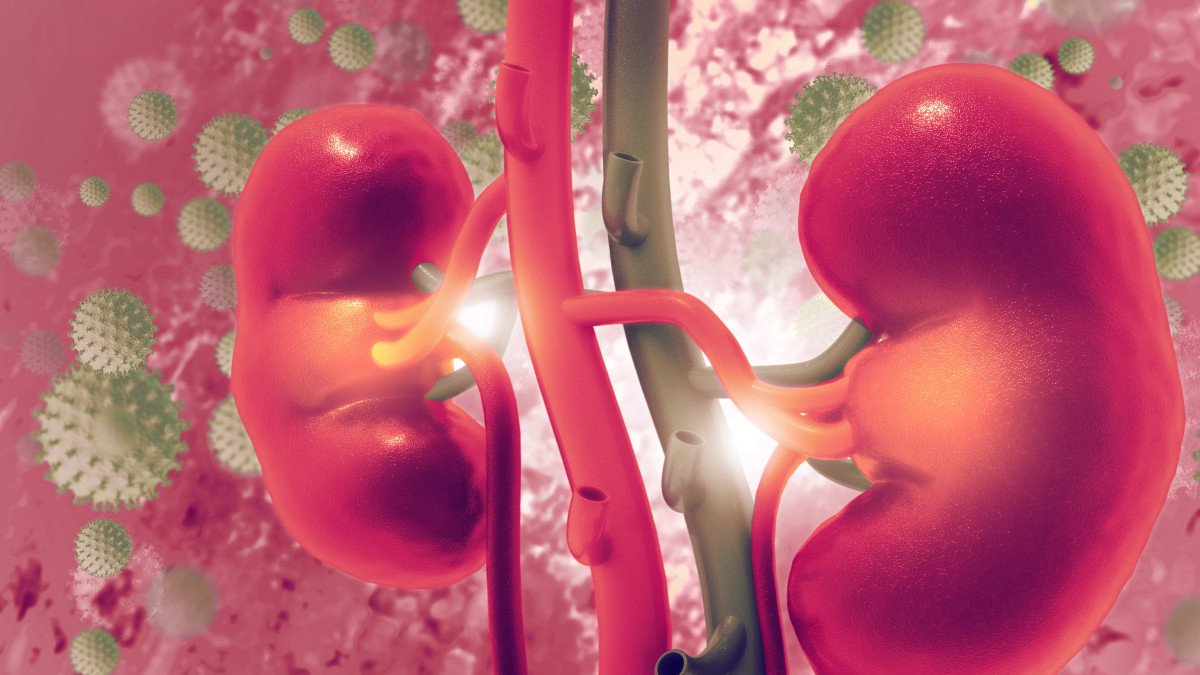

The process of analysing the data in this notebook is performed as follows :

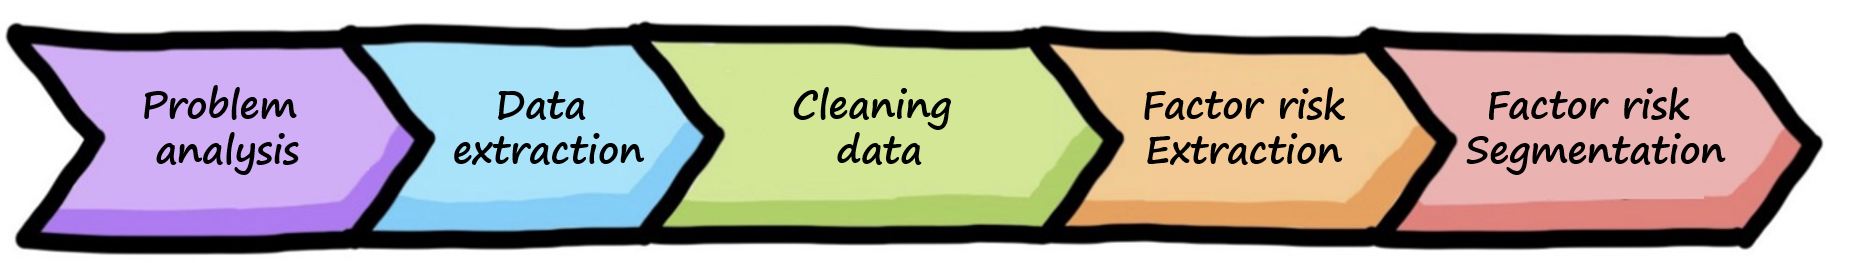

# Code importation

The code to execute this jupyter notebook is in a github repository, the first thing to do is to synchronize the environements

Credentials for the github are provided here : 
▶ if the token expires, please let me know so I could provide you with a new one. 

In [ ]:
!git config --global user.email "benraisdotlamine@gmail.com"
Token='KeyTokenFoundInTheEmail'

Connecting to my google drive ...

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This jupyter notebook have been developped in google colab, the folder paths are then set up accordingly. 
▶ If you wanna run it under another environement, please let me know so I could adapt it.

In [45]:
%cd /content/drive/MyDrive/Wema_CodeChallenge/
!git init
!git remote remove origin
!git remote add origin https://{Token}@github.com/benraisdotlamine/Wema_CodeChallenge.git
!git pull origin master
%cd /content/drive/MyDrive/Wema_CodeChallenge/PythonPart

/content/drive/MyDrive/Wema_CodeChallenge
Reinitialized existing Git repository in /content/drive/MyDrive/Wema_CodeChallenge/.git/
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/benraisdotlamine/Wema_CodeChallenge
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
Updating 80bdab3..27d6b48
Fast-forward
 PythonPart/AnalyseFunctions.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
/content/drive/MyDrive/Wema_CodeChallenge/PythonPart


Import necessary packages for the rest of this jupyter Notebook

In [11]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [12]:
from numpy import nan 
from pandas import to_numeric
import math
import scipy.stats 

Import of developped modules

In [46]:
import imp

import PlottingFunctions
imp.reload(PlottingFunctions)

import AnalyseFunctions
imp.reload(AnalyseFunctions)

import UtilityModule
imp.reload(UtilityModule)

<module 'UtilityModule' from '/content/drive/MyDrive/Wema_CodeChallenge/PythonPart/UtilityModule.py'>

The aim of this jupyter notebook is to deal with "Chronic Kidney Desease patients" (CKD) and put in place an approach that would provide us with more information about:
- The risk factor of CKD
- CKD subtypes based on risque factors



> Details on wikipedia over the CKD


*There are risk factors, first of all there is the sharp increase in **proteinuria**, in glomerular damage (**high concentration of protein in the urine**). There is also **high blood pressure**, which significantly reduces life expectancy if it is not treated, and at the same time is the consequence of kidney disease itself (80% of hypertension appear with kidney damage, and disappear almost completely two to three months after the start of extra-renal purification, being a volemic component [What?]). Finally, it has been found that **smoking** promotes the progression of kidney disease, and that quitting smoking slows down that of CKD. At the terminal stage, the absorption of liquids can prove to be dangerous, since there is a risk of acute edema of the lung, especially in the case where the diuresis is reduced, or even zero, due to certain damage to the kidney, in particular damage to the kidneys. glomerular, followed by vascular damage, and to a very lesser degree by interstitial and parenchymal damage. Patients should therefore strongly limit drinks. Without forgetting another side of the food danger in chronic renal failure on dialysis, that of **foods rich in potassium**, which is dangerous for the heart, because it causes an electrical disorder at the slightest elevation of its values ​​(for example : bananas, dried fruits including cocoa, therefore chocolate, dates, concentrated fruit juices).*


The starting hypothesis as risk factors over the CKD are :

1.   Urea protein concentration 
2.   high blood pressure
3.   Smoking
4.   consumption of potassium-rich foods

Let see what the Dataset has to offer




---



Data Extraction


Dataset download has been done over this [link](https://archive.ics.uci.edu/ml/datasets/Risk+Factor+prediction+of+Chronic+Kidney+Disease)

The file chronic_kidney_disease.arff has been used

Remarque : avant importation, ces modifications ont été apporté au fichier:

> Observation : Before importing the file, those modification were done :
- space in line 60 has been removed
- comma in line 399 has been removed


In [14]:
CKD_dataframe=UtilityModule.LoadDataFrame('/content/drive/MyDrive/Wema_CodeChallenge/Data/chronic_kidney_disease.arff')

Check few values ...


In [16]:
CKD_dataframe.head()

age    bp        sg    al    su        rbc           pc            pcc  \
0  48.0  80.0  b'1.020'  b'1'  b'0'       b'?'    b'normal'  b'notpresent'   
1   7.0  50.0  b'1.020'  b'4'  b'0'       b'?'    b'normal'  b'notpresent'   
2  62.0  80.0  b'1.010'  b'2'  b'3'  b'normal'    b'normal'  b'notpresent'   
3  48.0  70.0  b'1.005'  b'4'  b'0'  b'normal'  b'abnormal'     b'present'   
4  51.0  80.0  b'1.010'  b'2'  b'0'  b'normal'    b'normal'  b'notpresent'   

              ba    bgr  ...   pcv    wbcc  rbcc     htn      dm    cad  \
0  b'notpresent'  121.0  ...  44.0  7800.0   5.2  b'yes'  b'yes'  b'no'   
1  b'notpresent'    NaN  ...  38.0  6000.0   NaN   b'no'   b'no'  b'no'   
2  b'notpresent'  423.0  ...  31.0  7500.0   NaN   b'no'  b'yes'  b'no'   
3  b'notpresent'  117.0  ...  32.0  6700.0   3.9  b'yes'   b'no'  b'no'   
4  b'notpresent'  106.0  ...  35.0  7300.0   4.6   b'no'   b'no'  b'no'   

     appet      pe     ane   class  
0  b'good'   b'no'   b'no'  b'ckd'  
1  b'good'   b'no'   b'no'  b'ckd'  
2  b'poor'   b'no'  b'yes'  b'ckd'  
3  b'poor'  b'yes'  b'yes'  b'ckd'  
4  b'good'   b'no'   b'no'  b'ckd'  

[5 rows x 25 columns]

We can observe the "b'" prefix over some variables values. The "byte type" is nor recommanded and casts are necessary to turn them into their proper types.

Exemple : The attribute "sg" is a value that should be a float, however it is right now a byte type.

In [17]:
CKD_dataframe[['sg','class']]

sg      class
0    b'1.020'     b'ckd'
1    b'1.020'     b'ckd'
2    b'1.010'     b'ckd'
3    b'1.005'     b'ckd'
4    b'1.010'     b'ckd'
..        ...        ...
395  b'1.020'  b'notckd'
396  b'1.025'  b'notckd'
397  b'1.020'  b'notckd'
398  b'1.025'  b'notckd'
399  b'1.025'  b'notckd'

[400 rows x 2 columns]

In [18]:
type(CKD_dataframe['sg'][0])

bytes

To convert everything to its respectif type, this code has been developped

In [19]:
def CastDataframe():
  CKD_dataframe['sg']=CKD_dataframe['sg'].str.decode('utf-8')
  CKD_dataframe['sg']=CKD_dataframe['sg'].replace('?',nan).astype('float64')

  CKD_dataframe['al']=CKD_dataframe['al'].str.decode('utf-8')
  CKD_dataframe['al']=to_numeric(CKD_dataframe['al'].replace('?',nan), errors='coerce')

  CKD_dataframe['su']=CKD_dataframe['su'].str.decode('utf-8')
  CKD_dataframe['su']=to_numeric(CKD_dataframe['su'].replace('?',nan), errors='coerce')

  CKD_dataframe['rbc']=CKD_dataframe['rbc'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['pc']=CKD_dataframe['pc'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['pcc']=CKD_dataframe['pcc'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['ba']=CKD_dataframe['ba'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['htn']=CKD_dataframe['htn'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['dm']=CKD_dataframe['dm'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['cad']=CKD_dataframe['cad'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['appet']=CKD_dataframe['appet'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['pe']=CKD_dataframe['pe'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['ane']=CKD_dataframe['ane'].str.decode('utf-8').replace('?',nan)

  CKD_dataframe['class']=CKD_dataframe['class'].str.decode('utf-8').replace('?',nan)

CastDataframe()

This time, values are in fact cast to their proper values and the prefix "b'" is not there anymore.

In [20]:
CKD_dataframe.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]

In order to know better the attributes type that we have in this dataset, we can run the following code to shows them all.

In [21]:
for col in list(CKD_dataframe.columns):
  print(col,'\t',type(list(CKD_dataframe[col].dropna().sample(1))[0]))

age 	 <class 'float'>
bp 	 <class 'float'>
sg 	 <class 'float'>
al 	 <class 'float'>
su 	 <class 'float'>
rbc 	 <class 'str'>
pc 	 <class 'str'>
pcc 	 <class 'str'>
ba 	 <class 'str'>
bgr 	 <class 'float'>
bu 	 <class 'float'>
sc 	 <class 'float'>
sod 	 <class 'float'>
pot 	 <class 'float'>
hemo 	 <class 'float'>
pcv 	 <class 'float'>
wbcc 	 <class 'float'>
rbcc 	 <class 'float'>
htn 	 <class 'str'>
dm 	 <class 'str'>
cad 	 <class 'str'>
appet 	 <class 'str'>
pe 	 <class 'str'>
ane 	 <class 'str'>
class 	 <class 'str'>


# Dealing with missing data 

How many lines are there in the dataframe ? 

In [24]:
CKD_dataframe['class'].count()

400

Among these values, how many are missing?
Use the isna() function to extract missing values for each attribute like this:


In [25]:
CKD_dataframe.isna().sum().sort_values(ascending=False)

rbc      152
rbcc     131
wbcc     106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

For a better estimation, we can turn the values as percentages. So we would have a better idea of how much data is missing compared to what is available.

In [26]:
CKD_dataframe.isna().sum().sort_values(ascending=False)/CKD_dataframe['class'].count()*100

rbc      38.00
rbcc     32.75
wbcc     26.50
pot      22.00
sod      21.75
pcv      17.75
pc       16.25
hemo     13.00
su       12.25
sg       11.75
al       11.50
bgr      11.00
bu        4.75
sc        4.25
bp        3.00
age       2.25
ba        1.00
pcc       1.00
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
class     0.00
dtype: float64

In order to get the available data for each column, we can use the function dropna() like this :

In [27]:
CKD_dataframe['rbc'].dropna()

2      normal
3      normal
4      normal
7      normal
8      normal
        ...  
395    normal
396    normal
397    normal
398    normal
399    normal
Name: rbc, Length: 248, dtype: object

In order to fill in the missing values, we will set up a random system based on the class. In other words, a null value will be replaced by a random value knowing that they belong to the same class.

This would bring an additional degree of challenge because attributes have a large percentage of missing values, for example:

rbc      38.00%
rbcc     32.75%
wbcc     26.50%
pot      22.00%
sod      21.75%
pcv      17.75%
pc       16.25%


**Dealing with missing values is very important and should not be taken as easily as this in a production enviroenemnt. More discussion about is should be done and best would be to ignore them if the dateset is big enough.**

However, since our case is just an experimental work, we will replace the missed values as explained.


For example, the first line of the attribute "rbc" is not available, as it is shown :

In [28]:
CKD_dataframe.at[1,'rbc']

nan

In this specific line, the classification is "CKD", as you can see :

In [29]:
CKD_dataframe.at[1,'class']

'ckd'

Therefore, we will take a random value from the subset of data whose class is ckd to replace the missing value, as follows:


In [30]:
TmpDF=CKD_dataframe[CKD_dataframe['class']=='ckd'].dropna().sample(1)['rbc']
CKD_dataframe.at[1,'rbc']=TmpDF.to_numpy()[0]
CKD_dataframe.at[1,'rbc']

'abnormal'

We will now generalize this process to all the dataframe using the code below : 

In [31]:
ColName = CKD_dataframe.columns.values.tolist()

In [47]:
AnalyseFunctions.FillMissingValues(CKD_dataframe,True)


age
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu
sc
sod
pot
hemo
pcv
wbcc
rbcc
htn
dm
cad
appet
pe
ane
class


Check some random results and see if there are still missing values 

In [48]:
CKD_dataframe.sample(10)

age     bp     sg   al   su       rbc        pc         pcc          ba  \
69   26.0   70.0  1.015  0.0  4.0    normal    normal  notpresent  notpresent   
325  58.0   80.0  1.020  0.0  0.0    normal    normal  notpresent  notpresent   
124  65.0  100.0  1.015  0.0  0.0    normal    normal  notpresent  notpresent   
138  73.0  100.0  1.010  1.0  0.0    normal    normal  notpresent  notpresent   
241  57.0   70.0  1.015  1.0  0.0    normal  abnormal  notpresent  notpresent   
148  69.0   60.0  1.010  3.0  0.0    normal    normal  notpresent  notpresent   
50   53.0   60.0  1.020  2.0  1.0    normal    normal  notpresent  notpresent   
213  55.0   80.0  1.010  3.0  1.0    normal  abnormal     present     present   
194  80.0   70.0  1.010  2.0  3.0  abnormal  abnormal  notpresent  notpresent   
46   48.0   70.0  1.015  0.0  0.0    normal    normal  notpresent  notpresent   

       bgr  ...   pcv     wbcc  rbcc  htn   dm  cad  appet   pe  ane   class  
69   250.0  ...  52.0   6900.0   6.0   no  yes   no   good   no   no     ckd  
325  100.0  ...  50.0   6700.0   6.5   no   no   no   good   no   no  notckd  
124   90.0  ...  28.0   5500.0   3.6  yes   no   no   good   no   no     ckd  
138   95.0  ...  33.0   6900.0   3.9   no   no   no   good   no   no     ckd  
241  165.0  ...  31.0   4200.0   3.9   no   no   no   good   no   no     ckd  
148  171.0  ...  24.0  14600.0   3.7  yes   no   no   poor   no   no     ckd  
50    91.0  ...  28.0  11000.0   3.8  yes  yes   no   poor  yes  yes     ckd  
213  214.0  ...  34.0   7400.0   3.7  yes  yes   no   good  yes   no     ckd  
194  253.0  ...  40.0   8400.0   5.2  yes  yes   no   good   no   no     ckd  
46   124.0  ...  37.0   6400.0   4.7   no  yes   no   good   no   no     ckd  

[10 rows x 25 columns]

In [50]:
CKD_dataframe.head()

age    bp     sg   al   su       rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0    normal    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0  abnormal    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1  490.0  ...  38.0  6000.0   3.7   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   3.9   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]

Check if there are still missing values in all dataframe 

In [51]:
CKD_dataframe.isna().sum().sort_values(ascending=False)/CKD_dataframe['class'].count()*100

age      0.0
pot      0.0
ane      0.0
pe       0.0
appet    0.0
cad      0.0
dm       0.0
htn      0.0
rbcc     0.0
wbcc     0.0
pcv      0.0
hemo     0.0
sod      0.0
bp       0.0
sc       0.0
bu       0.0
bgr      0.0
ba       0.0
pcc      0.0
pc       0.0
rbc      0.0
su       0.0
al       0.0
sg       0.0
class    0.0
dtype: float64

Since we have now treated all the missing values, we move on to the second step which consists of a visualization of the data.

# Visualisation des données

In order to better know the distribution of the CKD dataset, we will, in this section, visualize the distribution of attributes and their types. 

Visualisation of the overall distribution

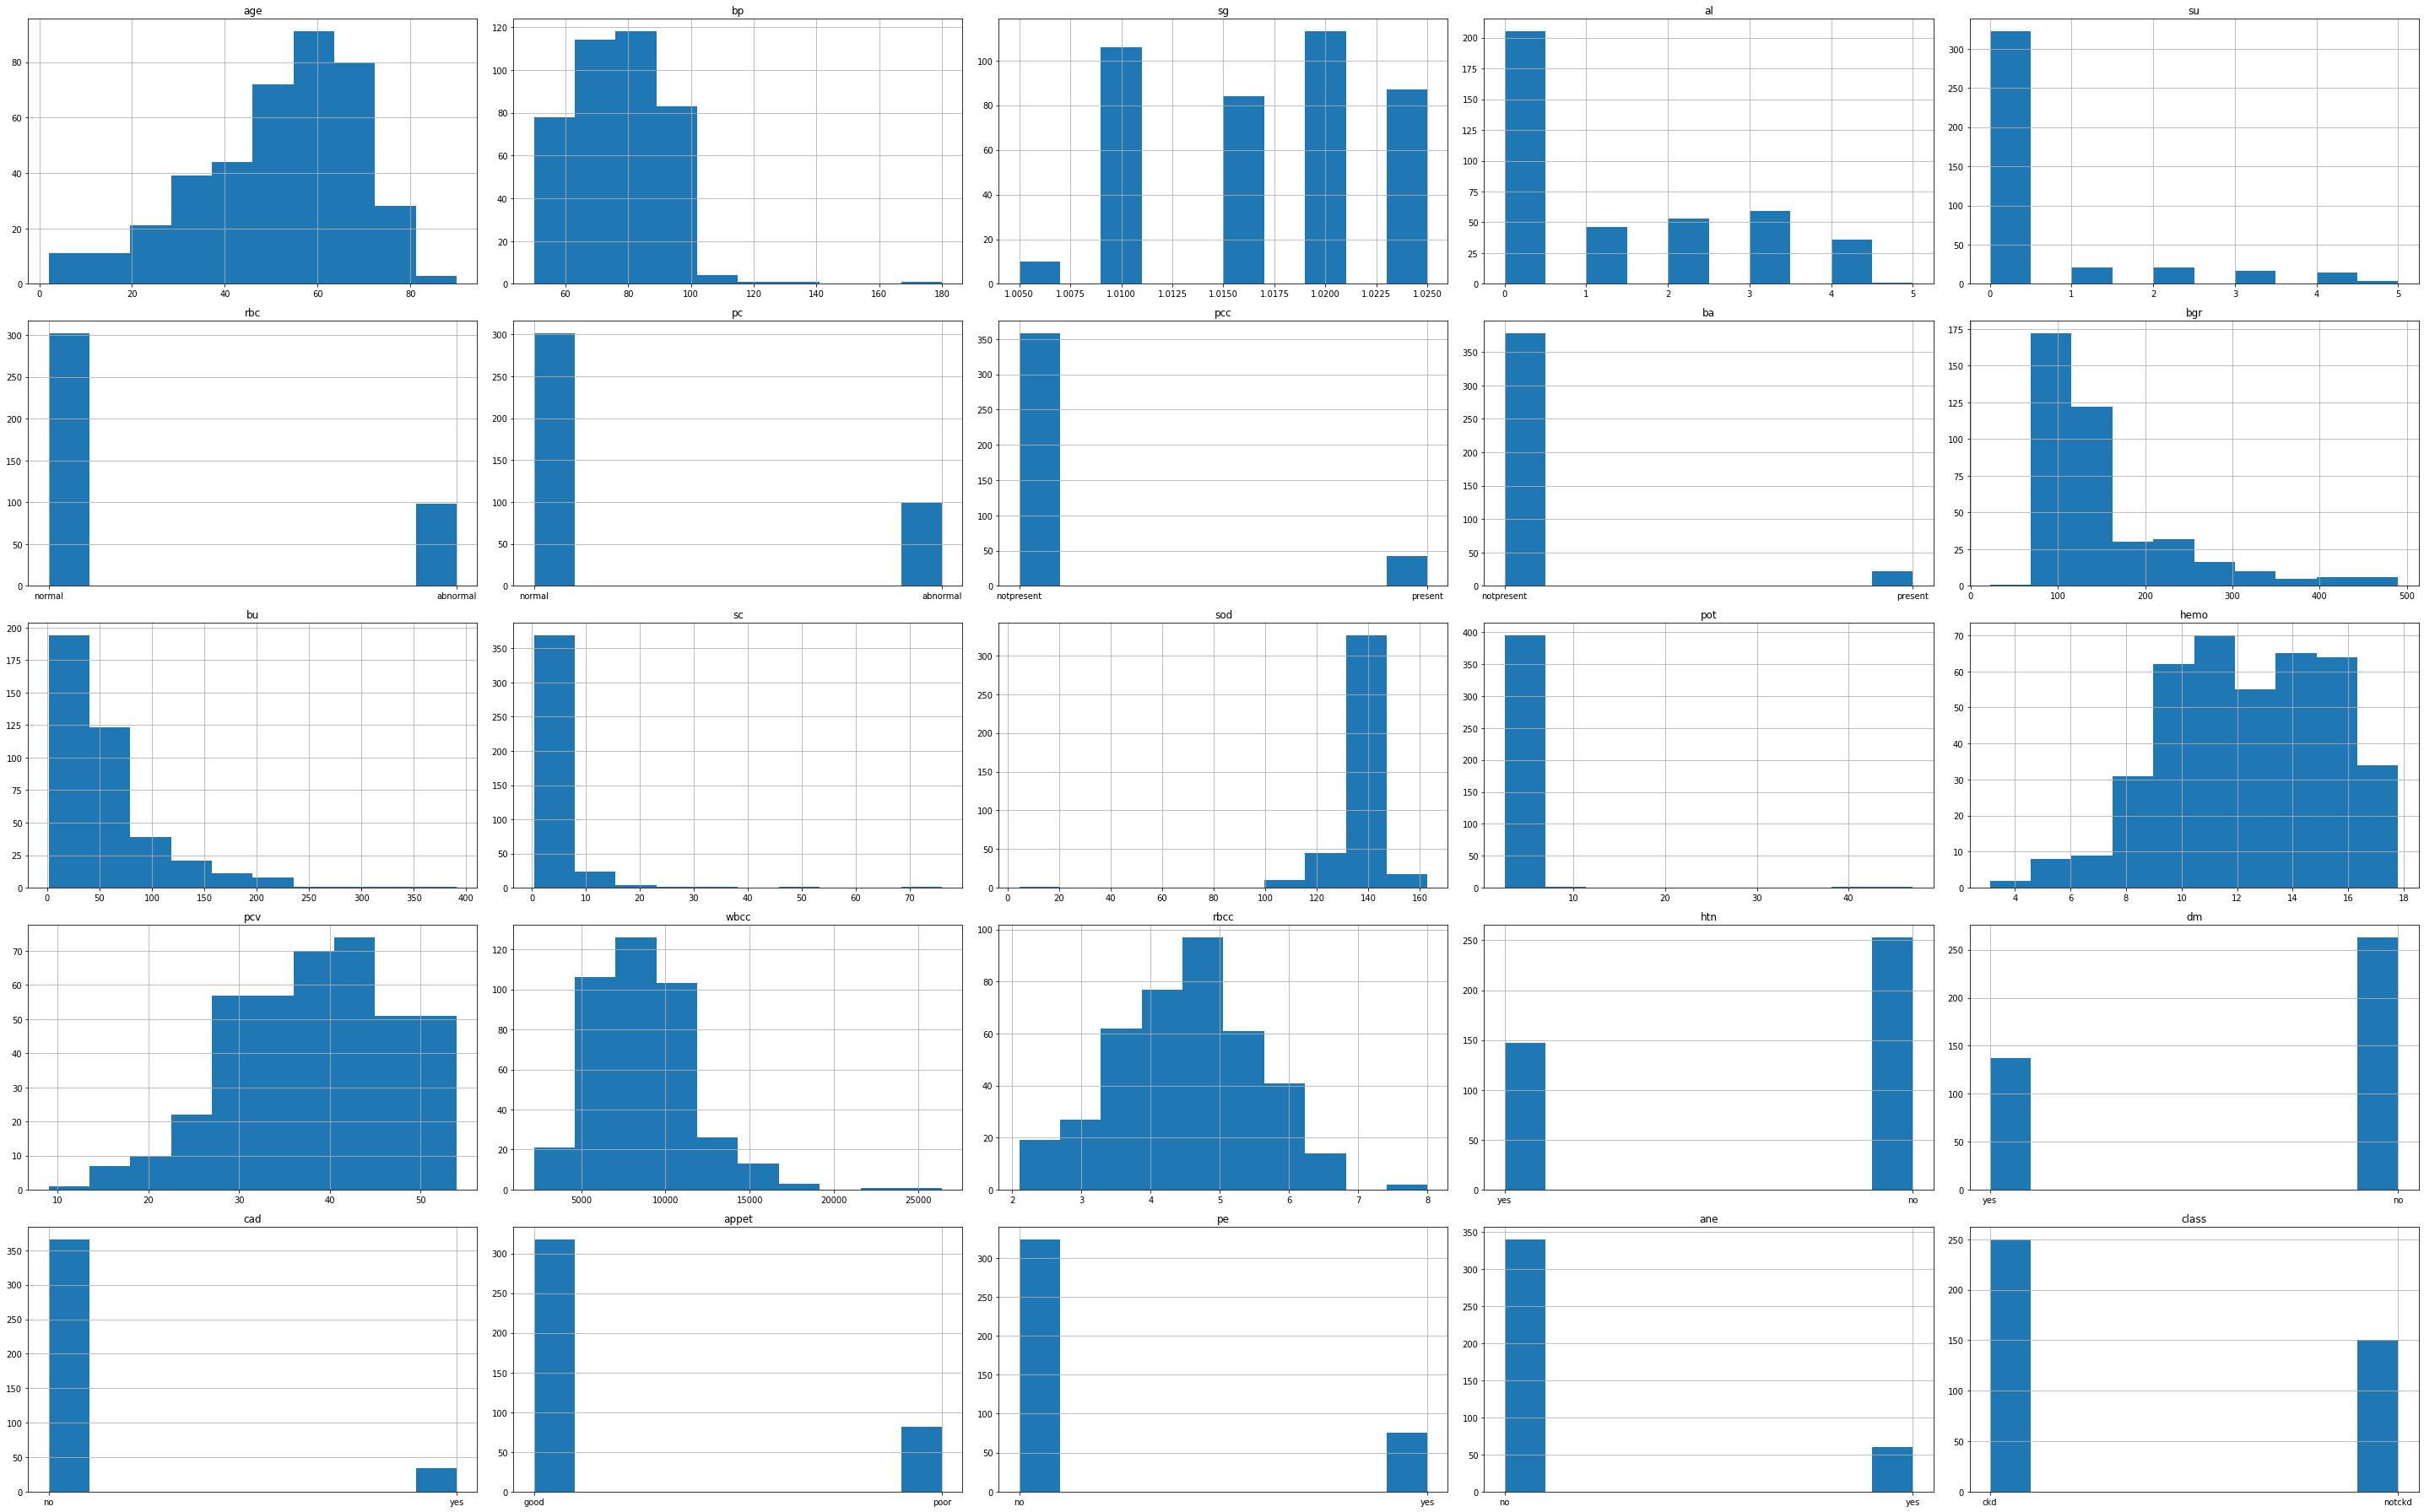

In [52]:
PlottingFunctions.PlottingAllColumns(CKD_dataframe,ColName)

To visualize a single attribute with another type of graph

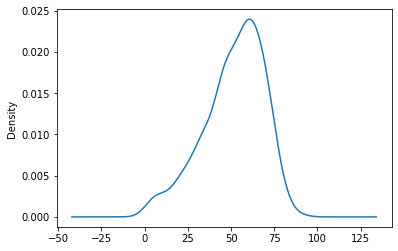

In [53]:
PlottingFunctions.plotColumn(CKD_dataframe,'age','kde')

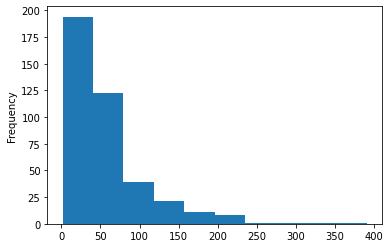

In [54]:
PlottingFunctions.plotColumn(CKD_dataframe,'bu')

For better visualization, we can divide the columns into two categories: Numerical Columns and Ordinal Columns as follows:

In [55]:
NumericalCol=UtilityModule.getAllNumericCol(CKD_dataframe)

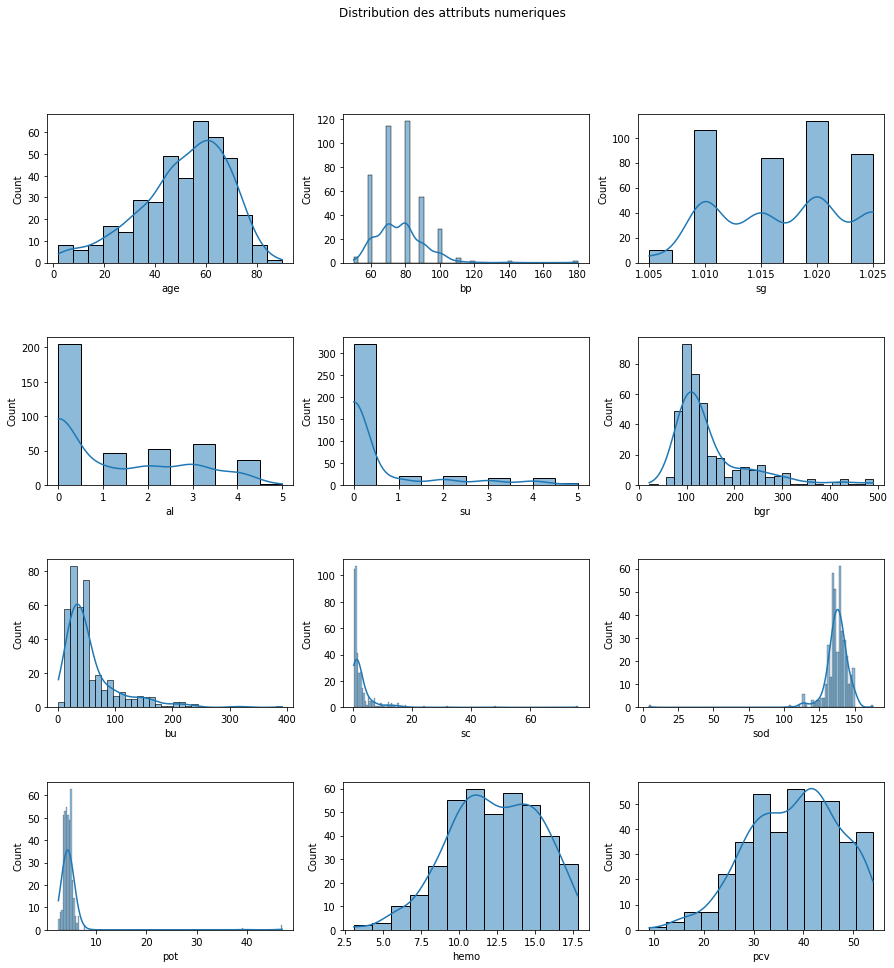

In [56]:
PlottingFunctions.NumericalValueDistribution(CKD_dataframe,NumericalCol)

In [57]:
NominalCol=[col for col in CKD_dataframe.columns if col not in NumericalCol]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

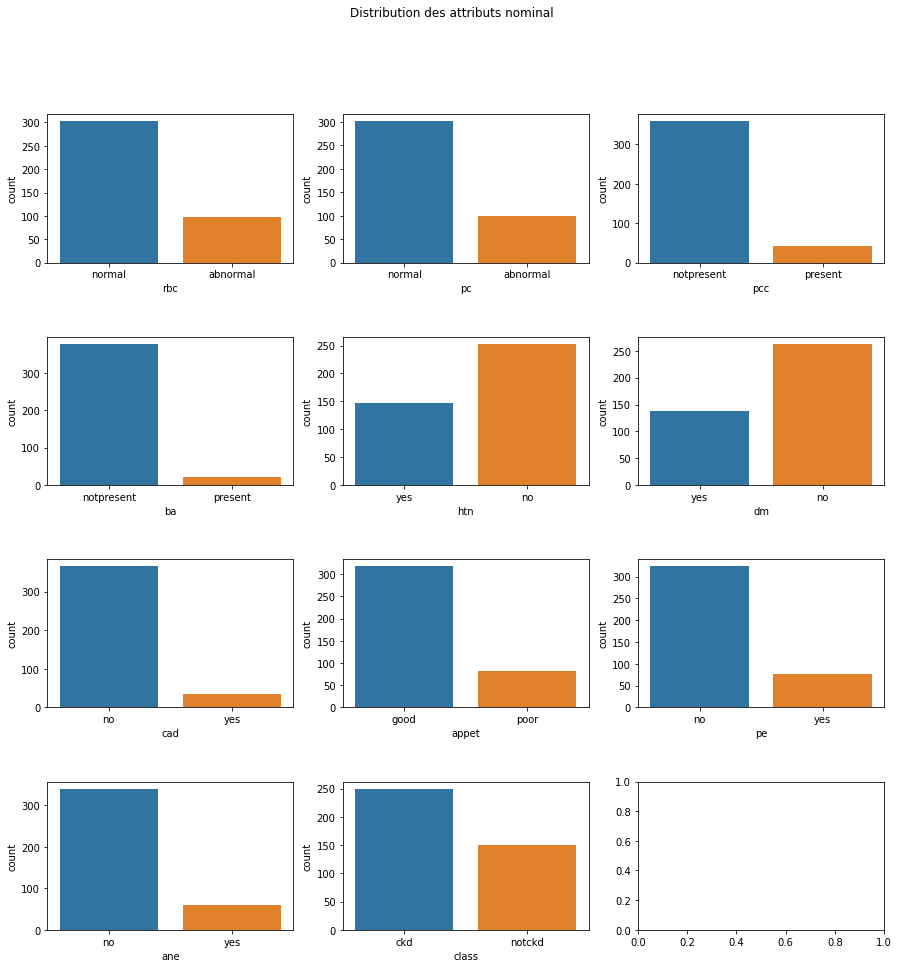

In [58]:
PlottingFunctions.NominalValueDistribution(CKD_dataframe,NominalCol)

The distributions do not seem uniform (they are skewed) , we must consider in future analyzes normalization procedures.

The visualization part finished, we go now to the analysis part of this notebook

# Data analysis

In this section, we will set up different approaches to analyze data, starting with simplistic examples to more rigid methods.

# Risk factor extraction : Method 1 

In this first approach, we will extract the risk factors of the CKD by analyzing the average difference for the numerical values ​​and a delta count for the non-numerical values ​​of each attribute according to a final class (CKD, notCKD). 

To do so, we will mainly use the `RelationshipInNumbers` function present in the `AnalyseFunctions` module.


Let's see the relationship of the attribute "Age" to the class (CKD notCKD) with the following code :

In [59]:
AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class','age')

count    mean   min   max         var
class                                        
ckd       250  54.596   2.0  90.0  306.153398
notckd    150  46.340  12.0  80.0  247.380268

This function returns a lot of good information about the relationship between the two variables. Values ​​like *count*, *average*, *minimum*, *maximum* and *variance* are presented.

We notice in this small example that the average age between CKD patients and Non_CKD people is almost similar.
In other words, for a distribution ranging from *2* to *90*. The average age of CKD patients is *54* years and for people without CKD is *46* years.


An insignificant difference. Especially since the maximum and minimum values ​​are almost similar with a homogeneous data distribution represented by the variance


In this second example, we perform the same operation for another variable "su" (Sugar) in relation to the final class (CKD, notCKD)

In [60]:
AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class','su')

count   mean  min  max       var
class                                   
ckd       250  0.776  0.0  5.0  1.797012
notckd    150  0.000  0.0  0.0  0.000000

We notice that there are **no** non-CKD patients who have a diabetes (sugar) problem. However, for a distribution between 0 and 5, the average CKD patient has a sugar level of 0.7 with a variance of 1.8.
We can conclude that there is a correlation between these two variables. 

However, the dataset is not representative enough since there are patient with diabete that do not have CKD !

Last variable we test is sodium (sod) with a similar approach

In [64]:
AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class','sod')

count     mean    min    max         var
class                                           
ckd       250  134.462    4.5  163.0  115.774655
notckd    150  141.700  135.0  150.0   22.882550

We note that the relationship between CKD patients and people without CKD with respect to the sodium level is negligible. The level of sodium does not affect the appearance of CKD.

We confirm this analysis by the values ​​of the average of this value for the two groups of people (CKD, NotCKD) which is respectively: 133.9 and 141.6.

The variance of the sodium level being more important for CKD patients, however, I think that this value is not very significant because there are simply more values ​​for this class ▶ more cases ▶ more distribution



---



En ce qui concerne les valeurs non numérique, cette même fonction s'adapte et nous retourne cette fois ci le nombre des patients CKD et non CKD par rapport a chaque valeur nominale de la variable comme le démontre l'exemple suivant avec la variable **pc** (pus cell*)

*:a collection of dead, white blood cells that accumulates when the body's immune system activates in response to an infection.


With regard to non-numeric values (ordinal values), this same function (`AnalyseFunctions.RelationshipInNumbers`) adapts and this time returns the number of CKD and non-CKD patients with respect to each nominal value of the variable as shown in the following example with the variable ** pc** (pus cell*)

*:a collection of dead, white blood cells that accumulate when the body's immune system activates in response to an infection.

In [65]:
AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class','pc')

0
(ckd, normal)       151
(ckd, abnormal)      99
(notckd, normal)    150
(notckd, abnormal)    0

We can see here that there is a correlation between the two variables, however too many patient with ckd have a normal puce cells. Is the data available enough to draw to the conclusion that a correlation between the two variable exists ? we can answer this question with more certitude in the coming methdos.

Now, we wanna run the process with all variables at the same time. 

Let's start with the numeric values. We will first normalize them. Several ways of doing it are available to us such as:
- Average normalization
- minmax normalization
- Normalization with Sklearn


## Average normalization

In [66]:
for col in NumericalCol:
  AnalyseFunctions.normalize_function_mean(CKD_dataframe,col)

In [67]:
TrackingDict1={}
for col in NumericalCol:
  Res=AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class',col)
  TrackingDict1[col]=abs(Res['mean'][0]-Res['mean'][1])

After that, we can display the dictionary in an inverted way to see the values ​​that affect most the CKD.

In [68]:
TrackingDict1=dict(sorted(TrackingDict1.items(), key=lambda item: item[1],reverse=True))

Avec ce type de normalisation, l'ordre ci-dessus a été retourné en ce qui concerne les facteurs risk pour les patient atteinte de CKD

With the mean normalization, the above order has been reversed with respect to risk factors for patients with CKD

In [ ]:
TrackingDict1

{'hemo': 1.5699871341173561,
 'pcv': 1.4994048204694532,
 'sg': 1.4909693847998775,
 'rbcc': 1.4077497488535224,
 'al': 1.3485803085511892,
 'bgr': 0.8335571800640572,
 'bu': 0.781919760846288,
 'sod': 0.7810736214404068,
 'su': 0.6728578843027673,
 'sc': 0.629994900909114,
 'bp': 0.5823569695203479,
 'wbcc': 0.48325754869280885,
 'age': 0.45025196507438614,
 'pot': 0.1338759002032525}

With this first average normalization approach, we notice that the attributes that inflence most the final class CKD are:
- hemo (hemoglobin concentration)
- pcv (packed cell volume)
- sg (specific gravity)
- rbcc (red blood cell count)
- al (albumin)

## Minmax normalization

Après cette première analyse, nous allons essayer maintenant de changer la fonction de normalisation et voir les résultats qui seront retournés. La normalisation utilisée cette fois ci est : la normalisation par min_max

Since the data have been normalized with the mean normalization, we would have to reload the original data with all pre-processings that we've previously done.  

In [69]:
CKD_dataframe=UtilityModule.LoadDataFrame('/content/drive/MyDrive/WemanityCodeChallenge/Data/chronic_kidney_disease.arff')
CastDataframe()
AnalyseFunctions.FillMissingValues(CKD_dataframe)

I could have saved the dataframe and work on a copy of it. But I wanted to know if the way we handled missing data was effective by running the notebook several times and see if there are situations where the analysis would completely change.

In [70]:
for col in NumericalCol:
  AnalyseFunctions.normalize_function_minmax(CKD_dataframe,col)

In [71]:
TrackingDict2={}
for col in NumericalCol:
  Res=AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class',col)
  TrackingDict2[col]=abs(Res['mean'][0]-Res['mean'][1])

In [72]:
TrackingDict2=dict(sorted(TrackingDict2.items(), key=lambda item: item[1],reverse=True))

In [73]:
TrackingDict2

{'sg': 0.4266666666666665,
 'al': 0.38880000000000003,
 'hemo': 0.3137233560090702,
 'pcv': 0.3118814814814814,
 'rbcc': 0.24811299435028256,
 'su': 0.15680000000000002,
 'bgr': 0.15004843304843304,
 'bu': 0.09754933675652548,
 'age': 0.09137878787878784,
 'bp': 0.06307692307692306,
 'wbcc': 0.051228650137741055,
 'sod': 0.04829863301787596,
 'sc': 0.04769223985890653,
 'pot': 0.009782771535580527}

With this second normalization based on the minmax, we notice that the most influential attributes for CKD patients are:
- sg (specific gravity)
- al (albumin)
- hemo (hemoglobin concentration)
- pcv (packed cell volume)
- rbcc (red blood cell count)

The same attributes with a different order.

## SKlearn normalization

The third normalization we are going to see is the sklearn.

As previously done, we reload the data. 

In [74]:
CKD_dataframe=UtilityModule.LoadDataFrame('/content/drive/MyDrive/WemanityCodeChallenge/Data/chronic_kidney_disease.arff')
CastDataframe()
AnalyseFunctions.FillMissingValues(CKD_dataframe)

In [75]:
AnalyseFunctions.Normalize_sklearn(CKD_dataframe,CKD_dataframe.columns)

In [76]:
TrackingDict3={}
for col in NumericalCol:
  Res=AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class',col)
  TrackingDict3[col]=abs(Res['mean'][0]-Res['mean'][1])

In [77]:
TrackingDict3=dict(sorted(TrackingDict3.items(), key=lambda item: item[1],reverse=True))

In [78]:
TrackingDict3

{'hemo': 44.19066666666667,
 'bgr': 34.54133333333334,
 'bu': 26.14666666666667,
 'sc': 21.766666666666666,
 'rbcc': 14.768,
 'pcv': 13.362666666666662,
 'wbcc': 9.685333333333332,
 'age': 8.209333333333333,
 'sod': 6.633333333333333,
 'al': 1.964,
 'sg': 1.7093333333333331,
 'su': 0.816,
 'bp': 0.8066666666666666,
 'pot': 0.4280000000000008}

With this third normalization based on sklearn, we notice that the most influential attributes for CKD patients are:

- hemo (Hemoglobin)
- bgr (blood glucose random)
- drunk (blood urea)
- rbcc (red blood cell count)
- pcv (packed cell volume)

We notice other variables that come into play at this stage of analysis. Therefore, it is necessary to rely on other more in-depth correlation tools.




## Summarize the three approaches

Concaténation des trois résultats :

In [80]:
Dict={'Norm1 Average':list(TrackingDict1.keys()),
      'Norm2 Minmax':list(TrackingDict2.keys()),
      'Norm3 Sklearn':list(TrackingDict3.keys())}

df = pd.DataFrame(Dict)

df

Norm1 Average Norm2 Minmax Norm3 Sklearn
0           hemo           sg          hemo
1             sg           al           bgr
2            pcv         hemo            bu
3           rbcc          pcv            sc
4             al         rbcc          rbcc
5            bgr           su           pcv
6             bu          bgr          wbcc
7            sod           bu           age
8             su          age           sod
9             sc           bp            al
10            bp         wbcc            sg
11          wbcc          sod            su
12           age           sc            bp
13           pot          pot           pot



---

Nous passons maintenant aux valeurs nominales

## Nominal Values

For non-numeric values, we perform the difference of the counts

Lets get first all non-numerical values 

In [81]:
NotNumericalCol=[Col for Col in CKD_dataframe if Col not in NumericalCol and Col!="class" ]

In [82]:
NotNumericalCol

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

We also need to relaod the dataset

In [83]:
CKD_dataframe=UtilityModule.LoadDataFrame('/content/drive/MyDrive/WemanityCodeChallenge/Data/chronic_kidney_disease.arff')
CastDataframe()
AnalyseFunctions.FillMissingValues(CKD_dataframe)

In [84]:
CKD_dataframe.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1  380.0  ...  38.0  6000.0   4.4   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   4.0   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]

In [85]:
R=AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class','rbc')

In [86]:
TrackingDict={}
for col in NotNumericalCol:
  Res=AnalyseFunctions.RelationshipInNumbers(CKD_dataframe,'class',col)
  TrackingDict[col]=abs(Res[0][0]-Res[0][1]+Res[0][2]-Res[0][3])

In [87]:
dict(sorted(TrackingDict.items(), key=lambda item: item[1],reverse=True))

{'ba': 356,
 'cad': 332,
 'pcc': 316,
 'ane': 280,
 'pe': 248,
 'appet': 236,
 'rbc': 200,
 'pc': 194,
 'dm': 126,
 'htn': 106}

We explain these results as follows: As much as the difference between positive and negative counts is large, s the correlation is important.

The nominal values ​​that interact the most with whether the person is CKD are:
- ba (bacteria)
- cad (coronary artery disease)
- pcc (pus cell clumps)
- donkey (Anemia)

After this first classic analysis, we move on to the second approach which uses tools more specialized in the extraction of correlations



---
Note ❗
Dataframe could slightly may change as we use random replacement of missing data.

# Risk factor extraction : Method 2 (Data correlation)

Afin de ne manipuler les données comme bloque unique et ne plus les séparer entre valeurs numériques et non numérique, nous allons élaborer une codification des valeurs non numérique de manière a ce que 
(normal, present,yes,good) reçoivent la valeur 1

(abnormal, notpresent,no,poor) reçoivent la valeur 1

 valeurs numérique comme suit : 


In order to not manipulate the data as a single block and avoid separating them between numeric and non-numeric values, we are going to develop a codification of the non-numeric values ​​so that
(normal, present, yes, good) receive the value 1

(abnormal, notpresent,no,poor) receive the value 1

 The following code provides what needed :

Relaoding data ...

In [105]:
CKD_dataframe=UtilityModule.LoadDataFrame('/content/drive/MyDrive/WemanityCodeChallenge/Data/chronic_kidney_disease.arff')
CastDataframe()
AnalyseFunctions.FillMissingValues(CKD_dataframe)

In [106]:
CKD_dataframe['rbc'] = CKD_dataframe.rbc.replace(['normal','abnormal'], ['1', '0'])
CKD_dataframe['pc'] = CKD_dataframe.pc.replace(['normal','abnormal'], ['1', '0'])
CKD_dataframe['pcc'] = CKD_dataframe.pcc.replace(['present','notpresent'], ['1', '0'])
CKD_dataframe['ba'] = CKD_dataframe.ba.replace(['present','notpresent'], ['1', '0'])
CKD_dataframe['htn'] = CKD_dataframe.htn.replace(['yes','no'], ['1', '0'])
CKD_dataframe['dm'] = CKD_dataframe.dm.replace(['yes','no'], ['1', '0'])
CKD_dataframe['cad'] = CKD_dataframe.cad.replace(['yes','no'], ['1', '0'])
CKD_dataframe['appet'] = CKD_dataframe.appet.replace(['good','poor'], ['1', '0'])
CKD_dataframe['pe'] = CKD_dataframe.pe.replace(['yes','no'], ['1', '0'])
CKD_dataframe['ane'] = CKD_dataframe.ane.replace(['yes','no'], ['1', '0'])


In [90]:
CKD_dataframe.head()

age    bp     sg   al   su rbc pc pcc ba    bgr  ...   pcv    wbcc  rbcc  \
0  48.0  80.0  1.020  1.0  0.0   1  1   0  0  121.0  ...  44.0  7800.0   5.2   
1   7.0  50.0  1.020  4.0  0.0   1  1   0  0  117.0  ...  38.0  6000.0   3.3   
2  62.0  80.0  1.010  2.0  3.0   1  1   0  0  423.0  ...  31.0  7500.0   3.8   
3  48.0  70.0  1.005  4.0  0.0   1  0   1  0  117.0  ...  32.0  6700.0   3.9   
4  51.0  80.0  1.010  2.0  0.0   1  1   0  0  106.0  ...  35.0  7300.0   4.6   

   htn  dm  cad  appet  pe ane class  
0    1   1    0      1   0   0   ckd  
1    0   0    0      1   0   0   ckd  
2    0   1    0      0   0   1   ckd  
3    1   0    0      0   1   1   ckd  
4    0   0    0      1   0   0   ckd  

[5 rows x 25 columns]

We will now illustrate the different correlations between the variables and the patient victim of CKD and those not victim of CKD
These first graphs give us a distribution of the different variables according to the health of the patients (Orange = Patient CKD, Blue = Patient Non CKD)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Data Distribution')

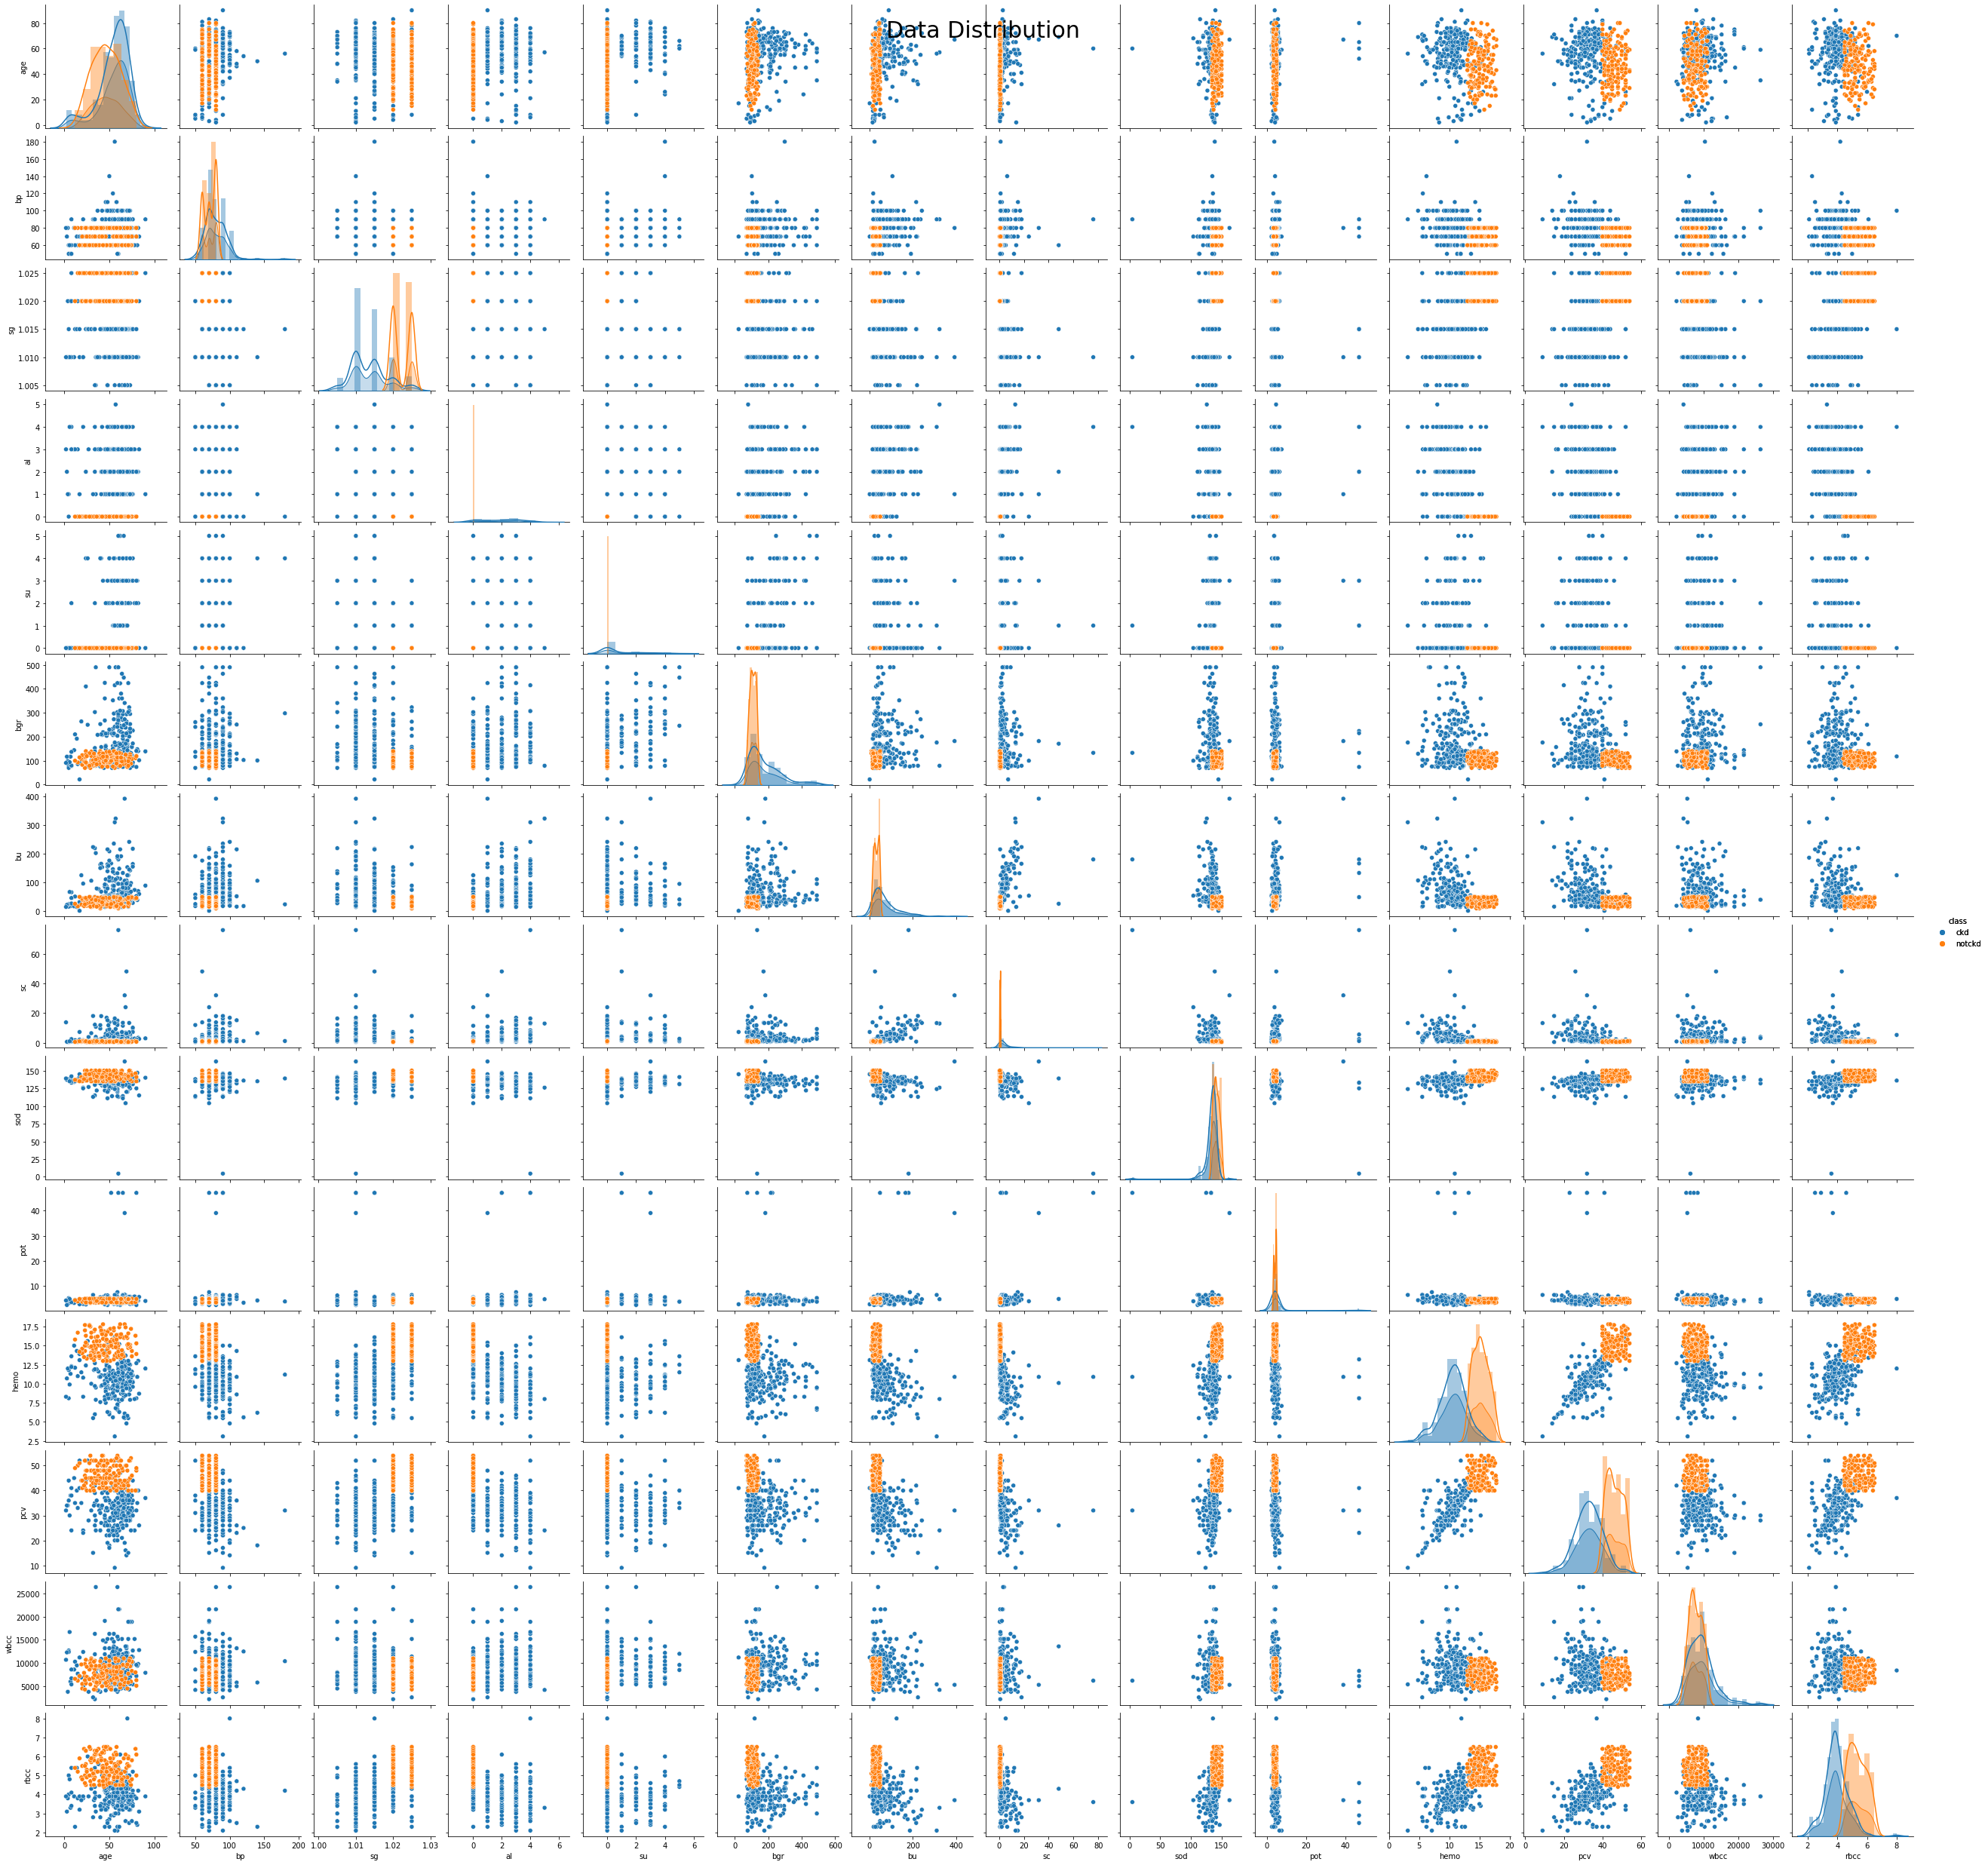

In [91]:
graph = sns.pairplot(CKD_dataframe,hue = 'class')

graph.map_diag(sns.distplot)
graph.add_legend()
graph.fig.suptitle('Data Distribution', fontsize = 30)


After having had this first global vision, we will now carry out more detailed analyses. first with this correlation matrix between the variables

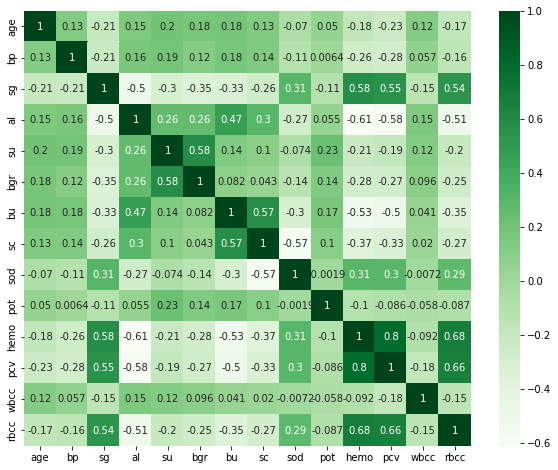

In [103]:
PlottingFunctions.plotHeatmap(CKD_dataframe)

Ces graphique nous montre qu'une corrélation entre les attributs listées, nous allons investiguer chaque attribut de manière plus profonde.

### Correlation between age and CKD patients (-)

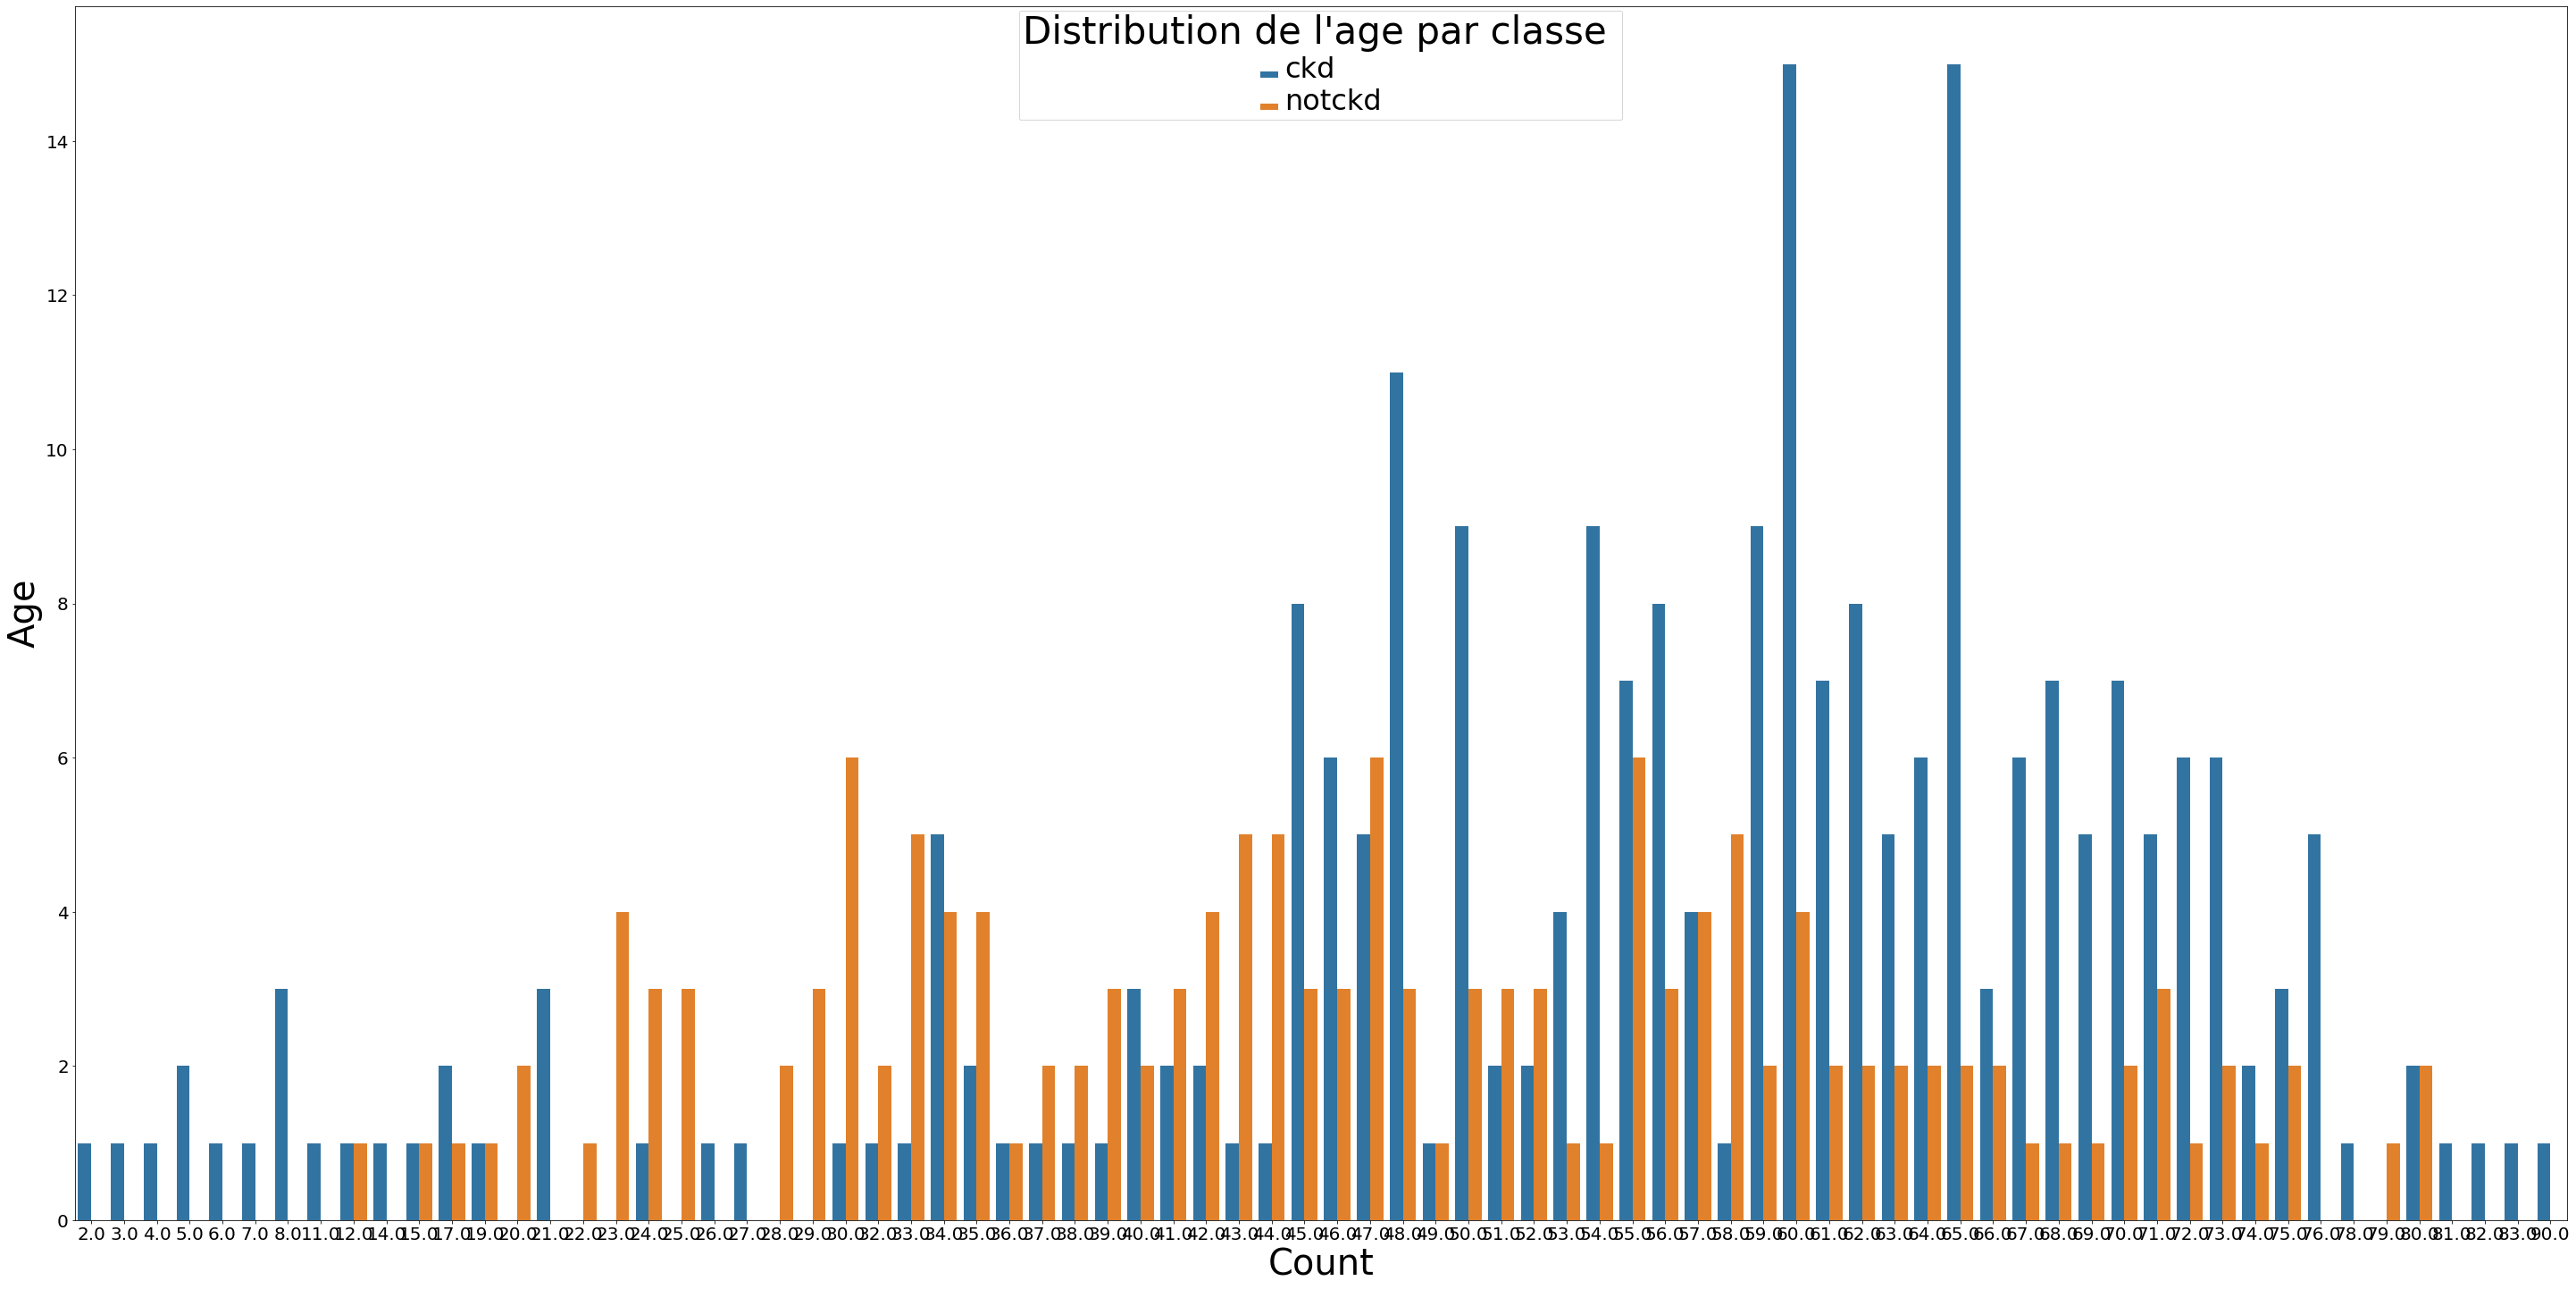

In [107]:
PlottingFunctions.PlotDistribution(CKD_dataframe,'age',"Distribution de l'age par classe ","Age")

Process the correlation using the function `CorrelationBetweenVariables`

In [109]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class','age')

age     count
age    1.000000  0.380974
count  0.380974  1.000000

We investigate more and provide a correlation between age and no CKD

In [111]:
age_corr = ['age', 'class']
age_corr1 = CKD_dataframe[age_corr]
age_corr_y = age_corr1[age_corr1['class'] == 'notckd'].groupby(['age']).size().reset_index(name = 'count')
age_corr_y.corr()

age     count
age    1.000000 -0.130333
count -0.130333  1.000000

We notice a correlation of 0.38 for CKD patients and -013 for non-ckd patients. We can conclude that the relationship between age and class is relatively weak.

> Conclusion : No Correlation 🔻

### Relation entre le Diastolic Blood Pressure (bp) et le fait d'avoir ou pas une insuffisance rénale (+)

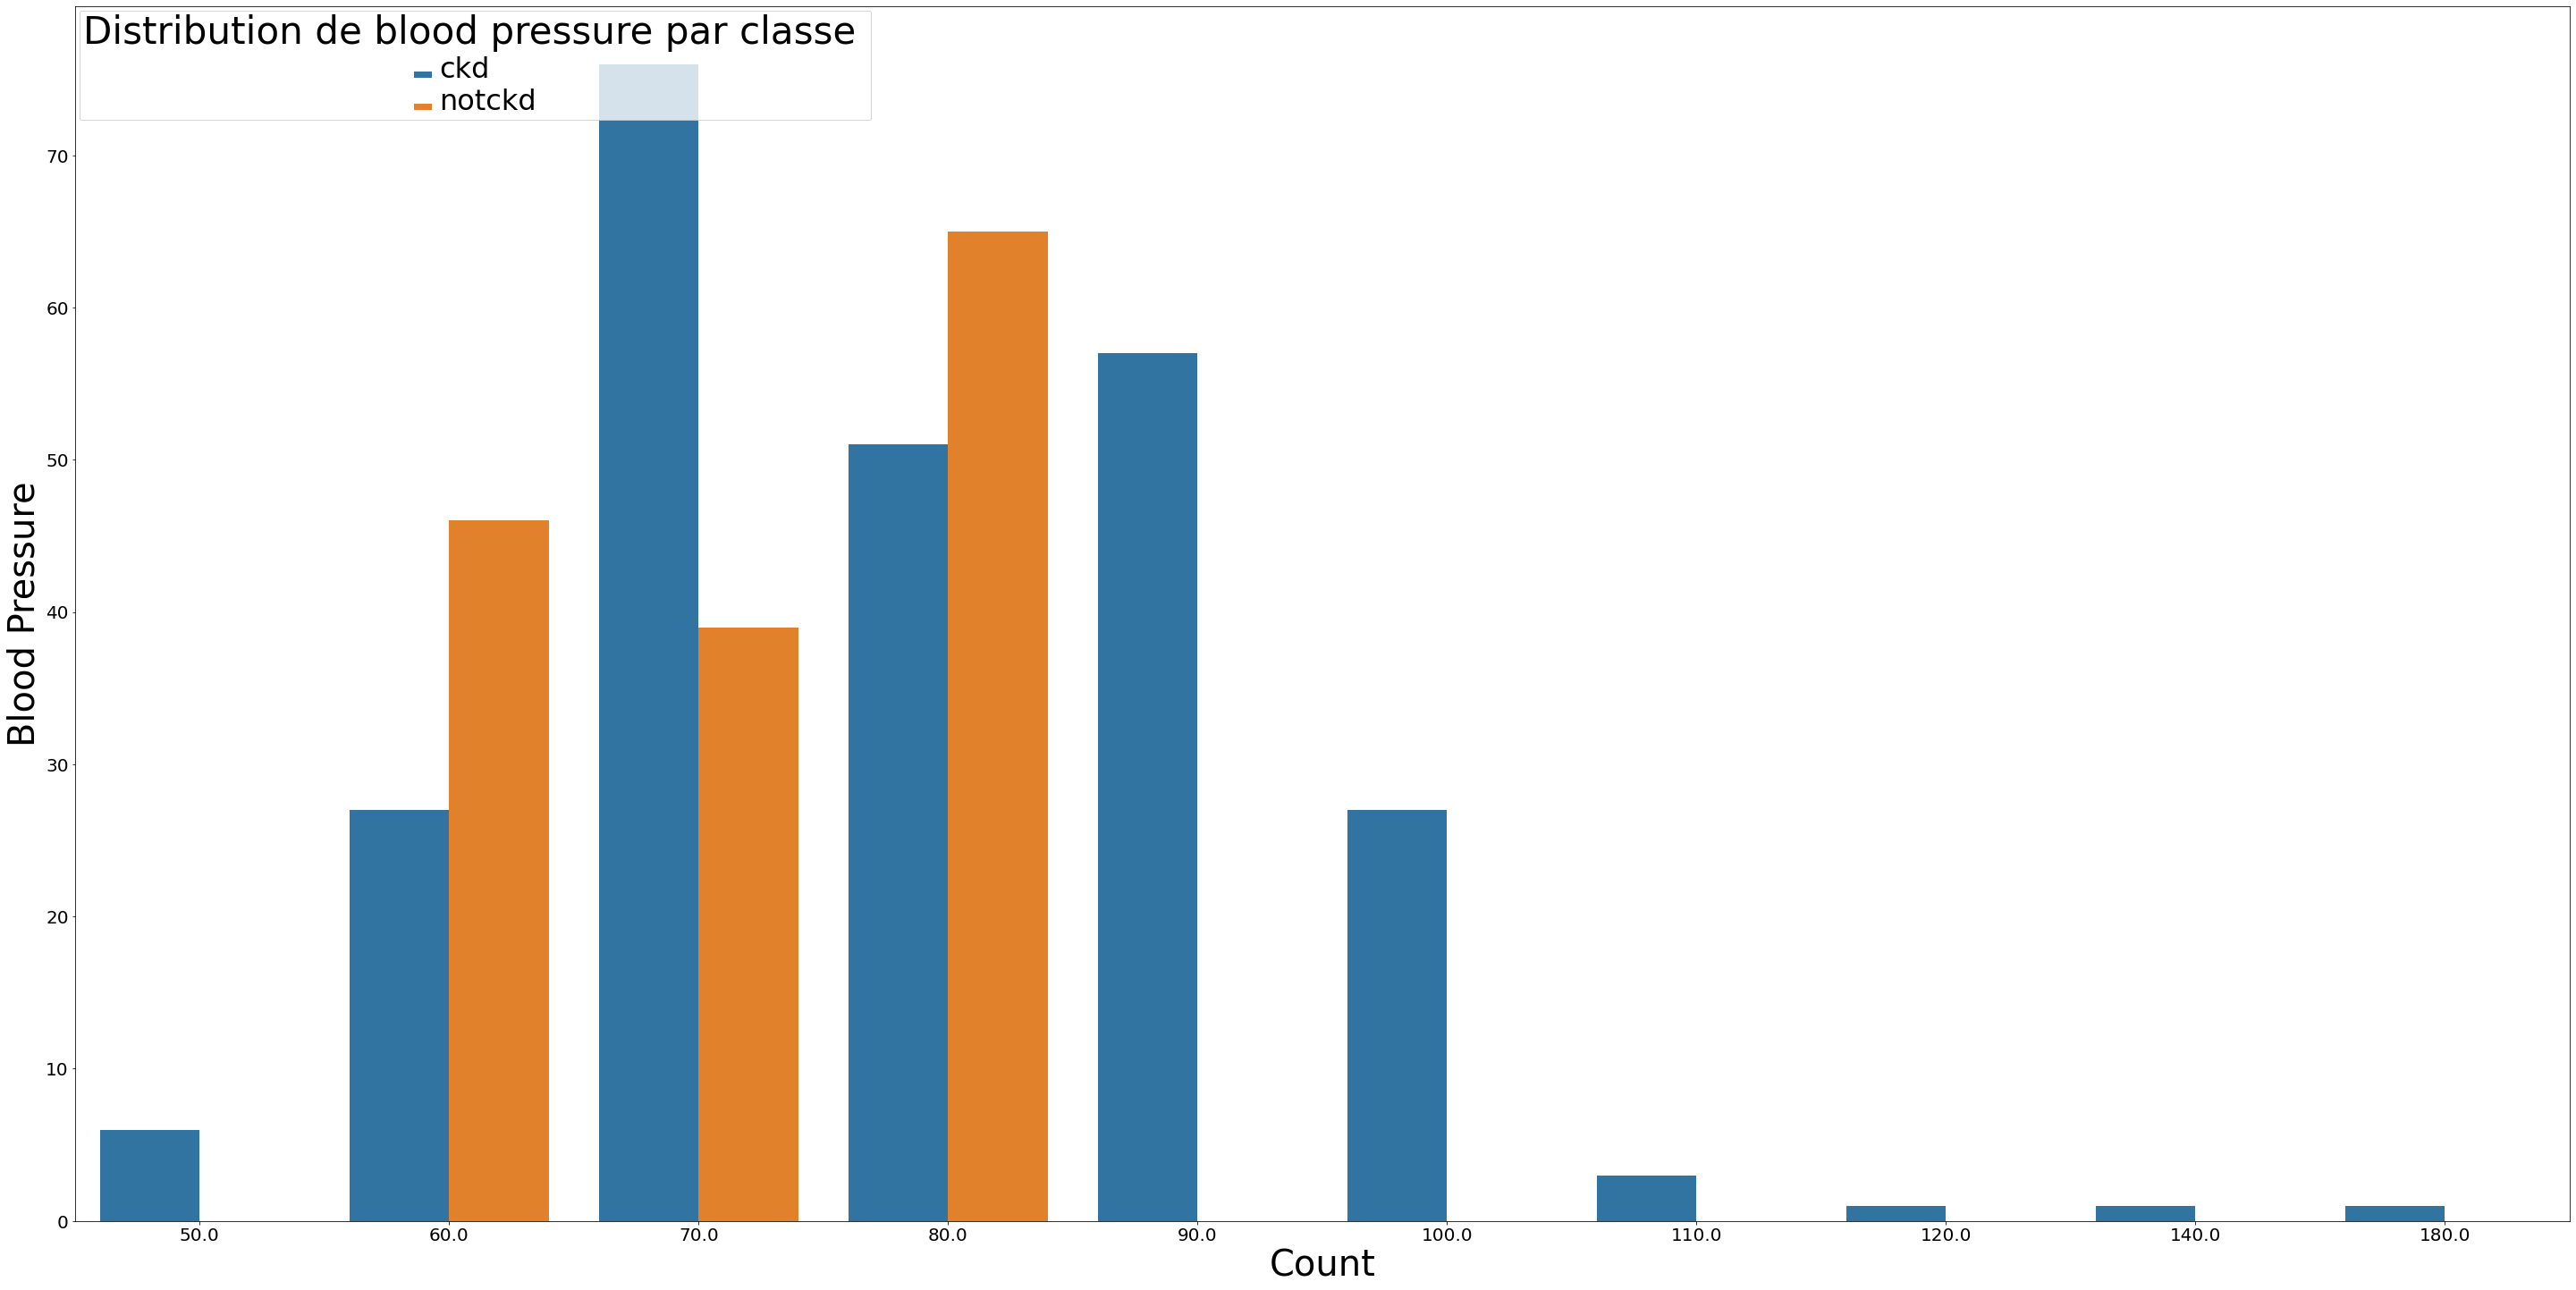

In [112]:
PlottingFunctions.PlotDistribution(CKD_dataframe,'bp',"Distribution de blood pressure par classe ","Blood Pressure")

In [113]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class','bp')

bp     count
bp     1.000000 -0.517538
count -0.517538  1.000000

La correlation est négative mais existe effectivement, nous avançons avec l'hypothèse que si la pression sanguine diminue, le risque d'avoir une insuffisance rénale augmente. Toutefois, il faut prendre ces résultats avec précaution car la relation entre la pression sanguine et de PAS avoir une insuffisance rénale est aussi forte, comme le démontre ces calcules

The correlation is negative but does exist, we advance with the hypothesis that if the blood pressure decreases, the risk of having kidney failure increases. Moreover, these results are stregthen because of the relationship between blood pressure and NOT having kidney is positively strong (0.7), as these calculations show.

In [114]:
corr_suited = CKD_dataframe[['class','bp']]
(corr_suited[corr_suited['class'] == 'notckd'].groupby(['bp']).size().reset_index(name = 'count')).corr()


bp     count
bp     1.000000  0.706129
count  0.706129  1.000000

For a better representation, we can use the following plotting

Text(0.5, 1.0, 'Correlation between bp and CKD patients')

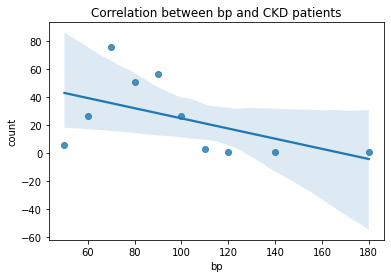

In [116]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby(['bp']).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = 'bp', y = 'count').set_title("Correlation between bp and CKD patients")

Text(0.5, 1.0, 'Correlation between bp and Not CKD patients')

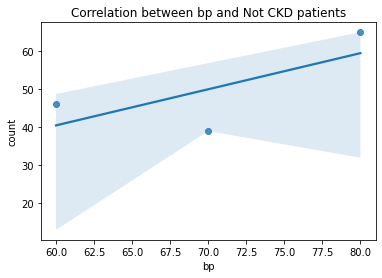

In [117]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'notckd'].groupby(['bp']).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = 'bp', y = 'count').set_title("Correlation between bp and Not CKD patients")

We can easily conclude that there is a correlation between blood pressure and ckd patients

> Conclusion : Correlation ✅ 

### Correlation between specific gravity and CKD patients (+)

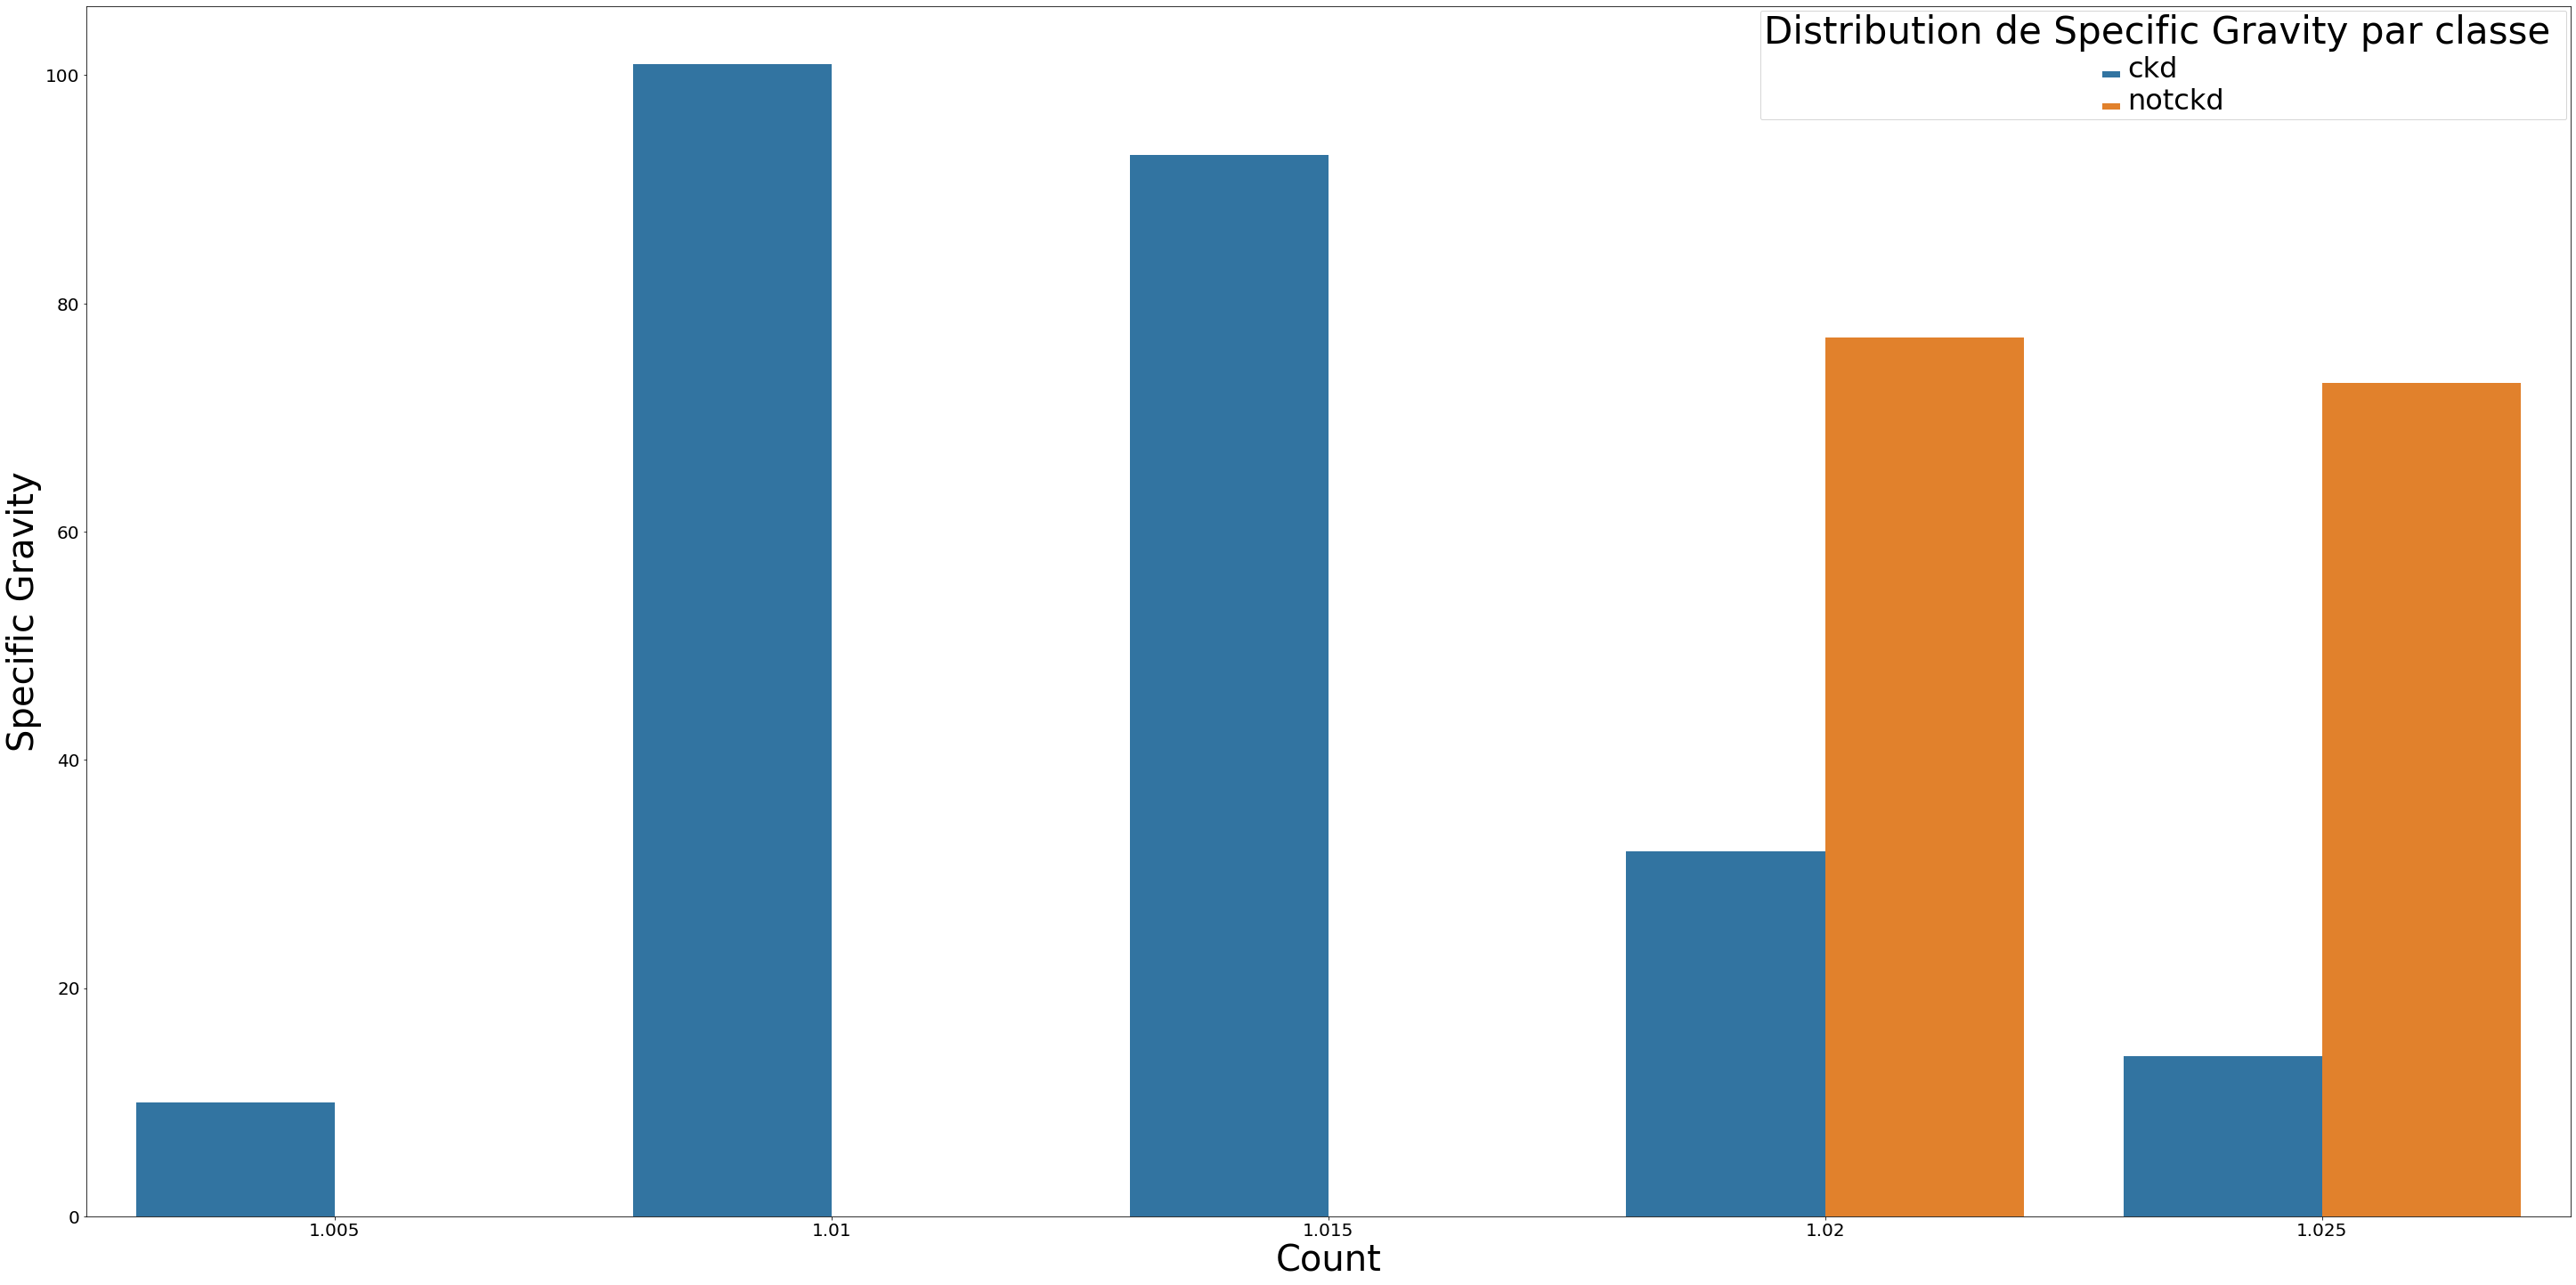

In [119]:
PlottingFunctions.PlotDistribution(CKD_dataframe,'sg',"Distribution de Specific Gravity par classe ","Specific Gravity")

In [120]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class','sg')

sg     count
sg     1.000000 -0.220258
count -0.220258  1.000000

Although the graph shows that there might be correlation between these two variables, the numbers are too low (-0.2)  to rely on it. However, I wanted to investigate a little more with the graph below:

Text(0.5, 1.0, 'Correlation between sg and CKD patients')

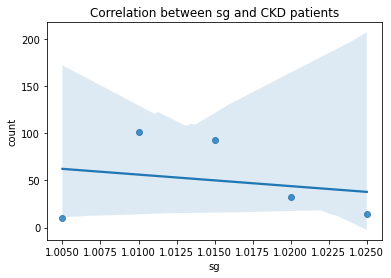

In [124]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby(['sg']).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = 'sg', y = 'count').set_title("Correlation between sg and CKD patients")

We notice that the overall correlation is almost stable, the values ​​1.01 and 1.015 show some patients who have CKD but this value does not follow and falls for the values ​​1.02 and 1.025.

A better investigation can be made from the following graph

In [125]:
PlottingFunctions.violin(CKD_dataframe,'sg')

Le graphique ci dessus nous montre que la corrélation négative entre la specific gravity et le fait qu'un patient soit CKD existe !

The graph above shows us that the negative correlation between specific gravity and the fact that a patient has CKD exists indeed. It is clear that ckd patients have an *sg* between 1.005 and 1.015, on the other hand, non CKD patients have an *sg* over 1.02.

The fact that the correlation wasn"t that visible in previous graphs is because of the very small values of *sg*.

> Conclusion : Correlation ✅ 

### Correlation between albumin (al) and CKD patients (+)

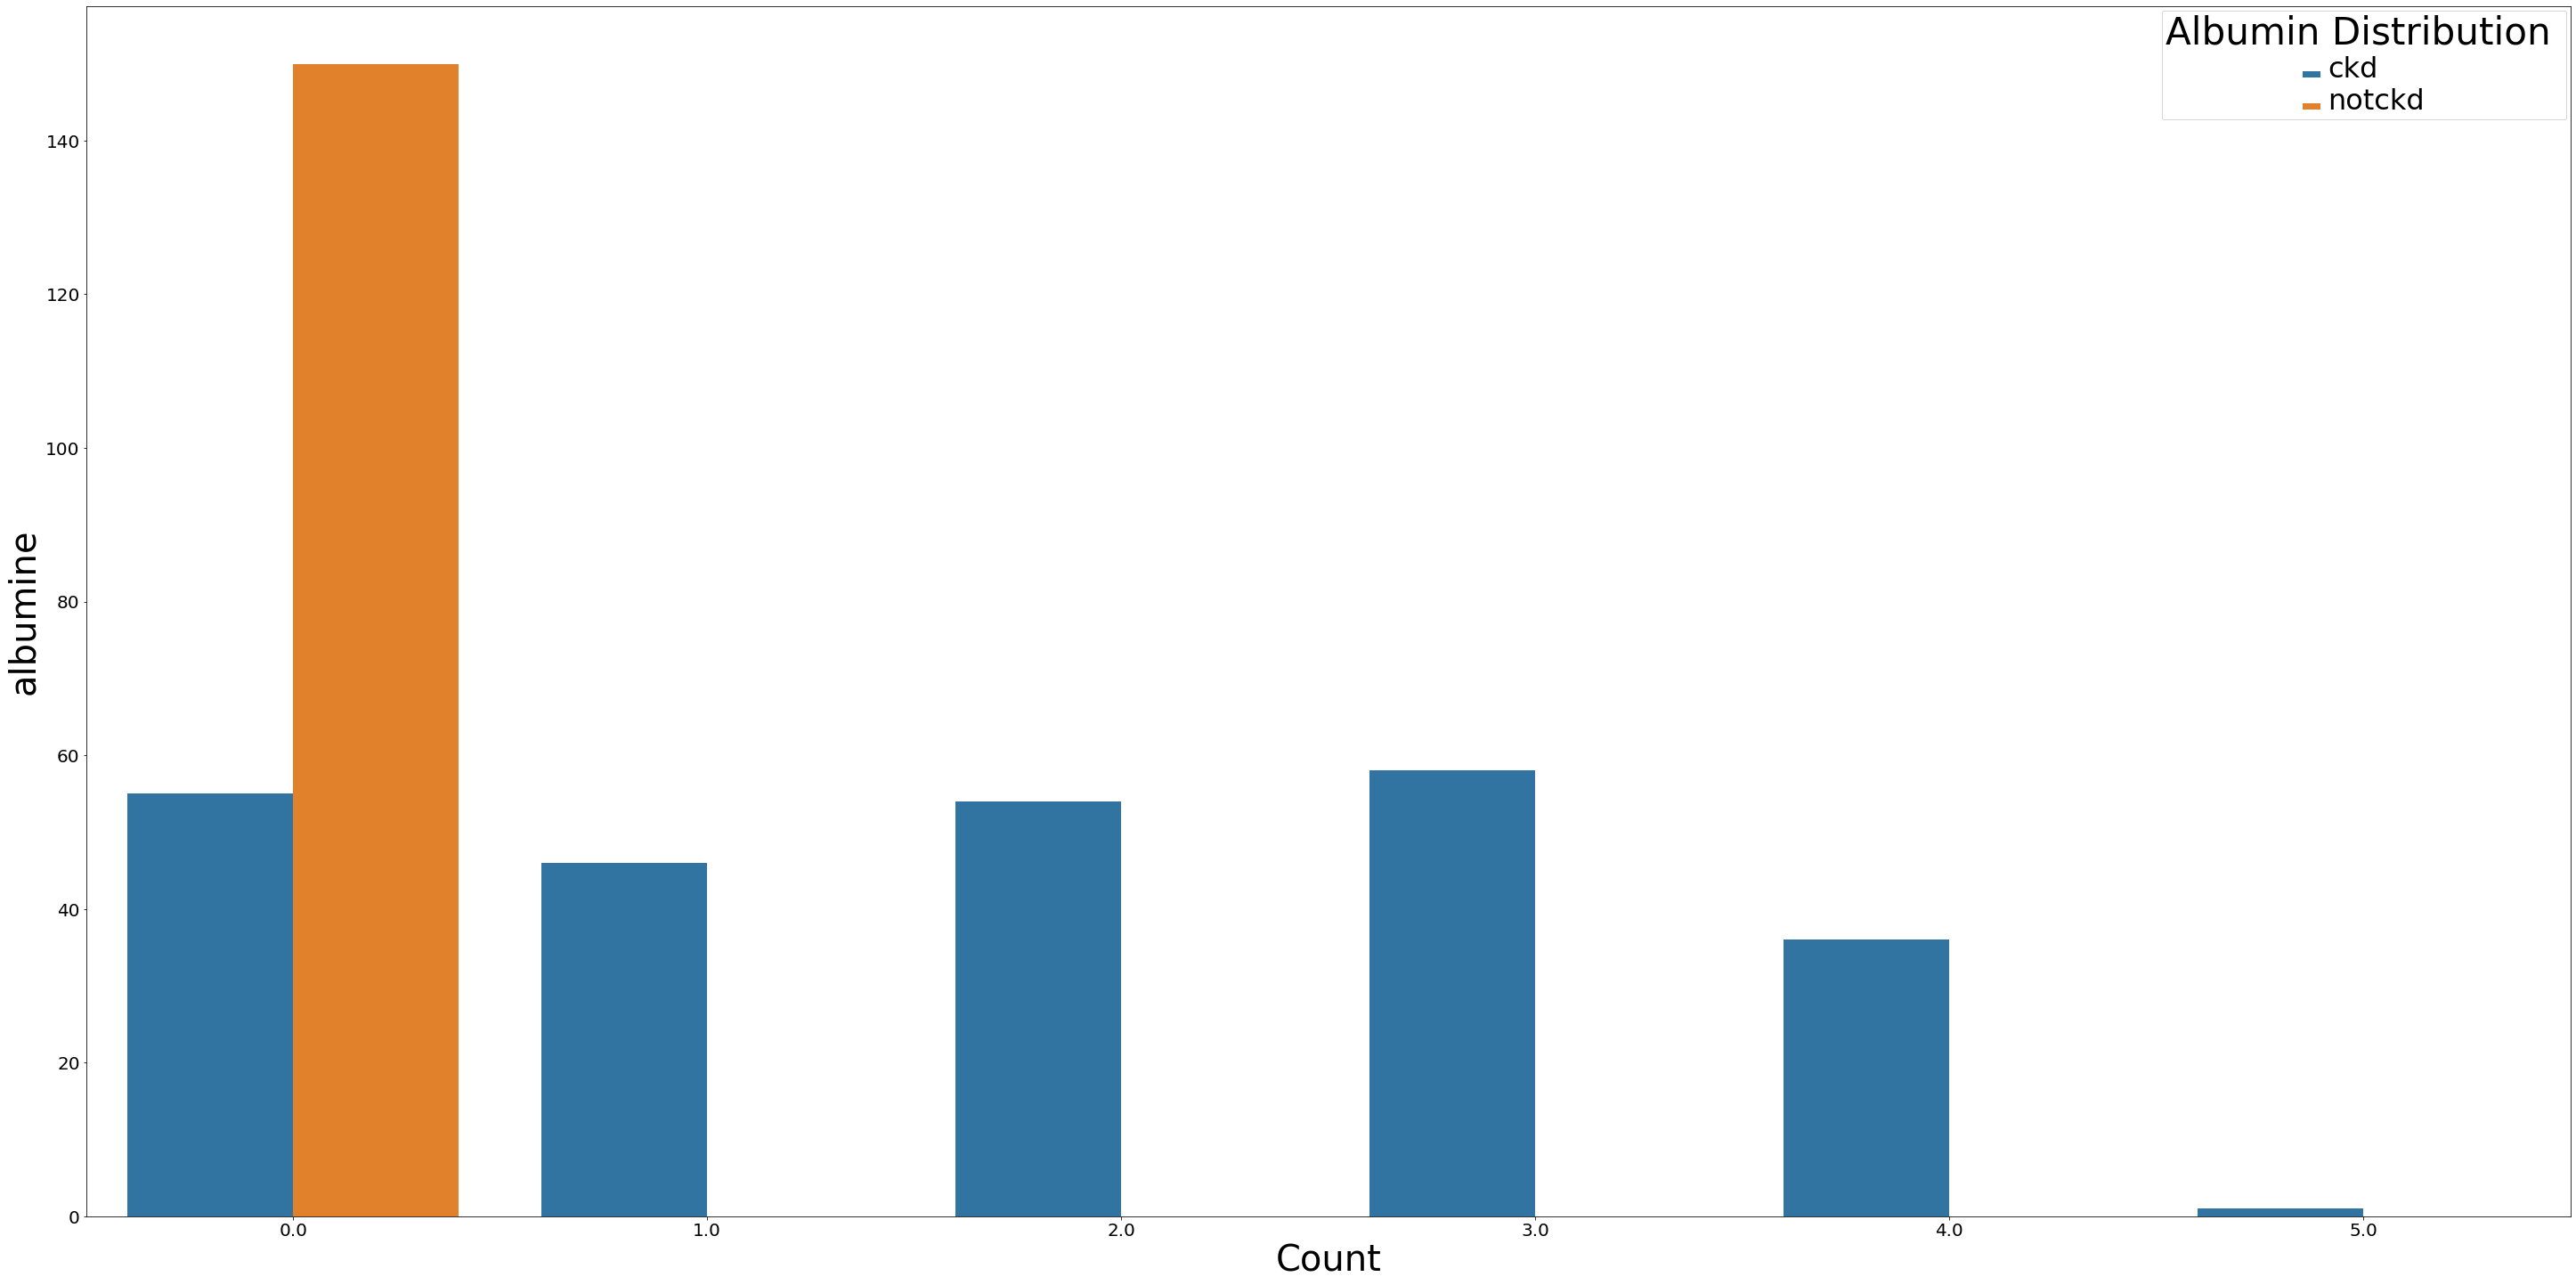

In [127]:
PlottingFunctions.PlotDistribution(CKD_dataframe,'al',"Albumin Distribution ","albumine")

In [128]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class','al')

al     count
al     1.000000 -0.737485
count -0.737485  1.000000

The graph and the correlation values both show that there is a relationship between the two variables.
As albumin increases, cases of kidney failure decrease. The negative correlation is with no doubt here.


> Conclusion : Correlation ✅ 

### Correlation between sugar and CKD patients (+)

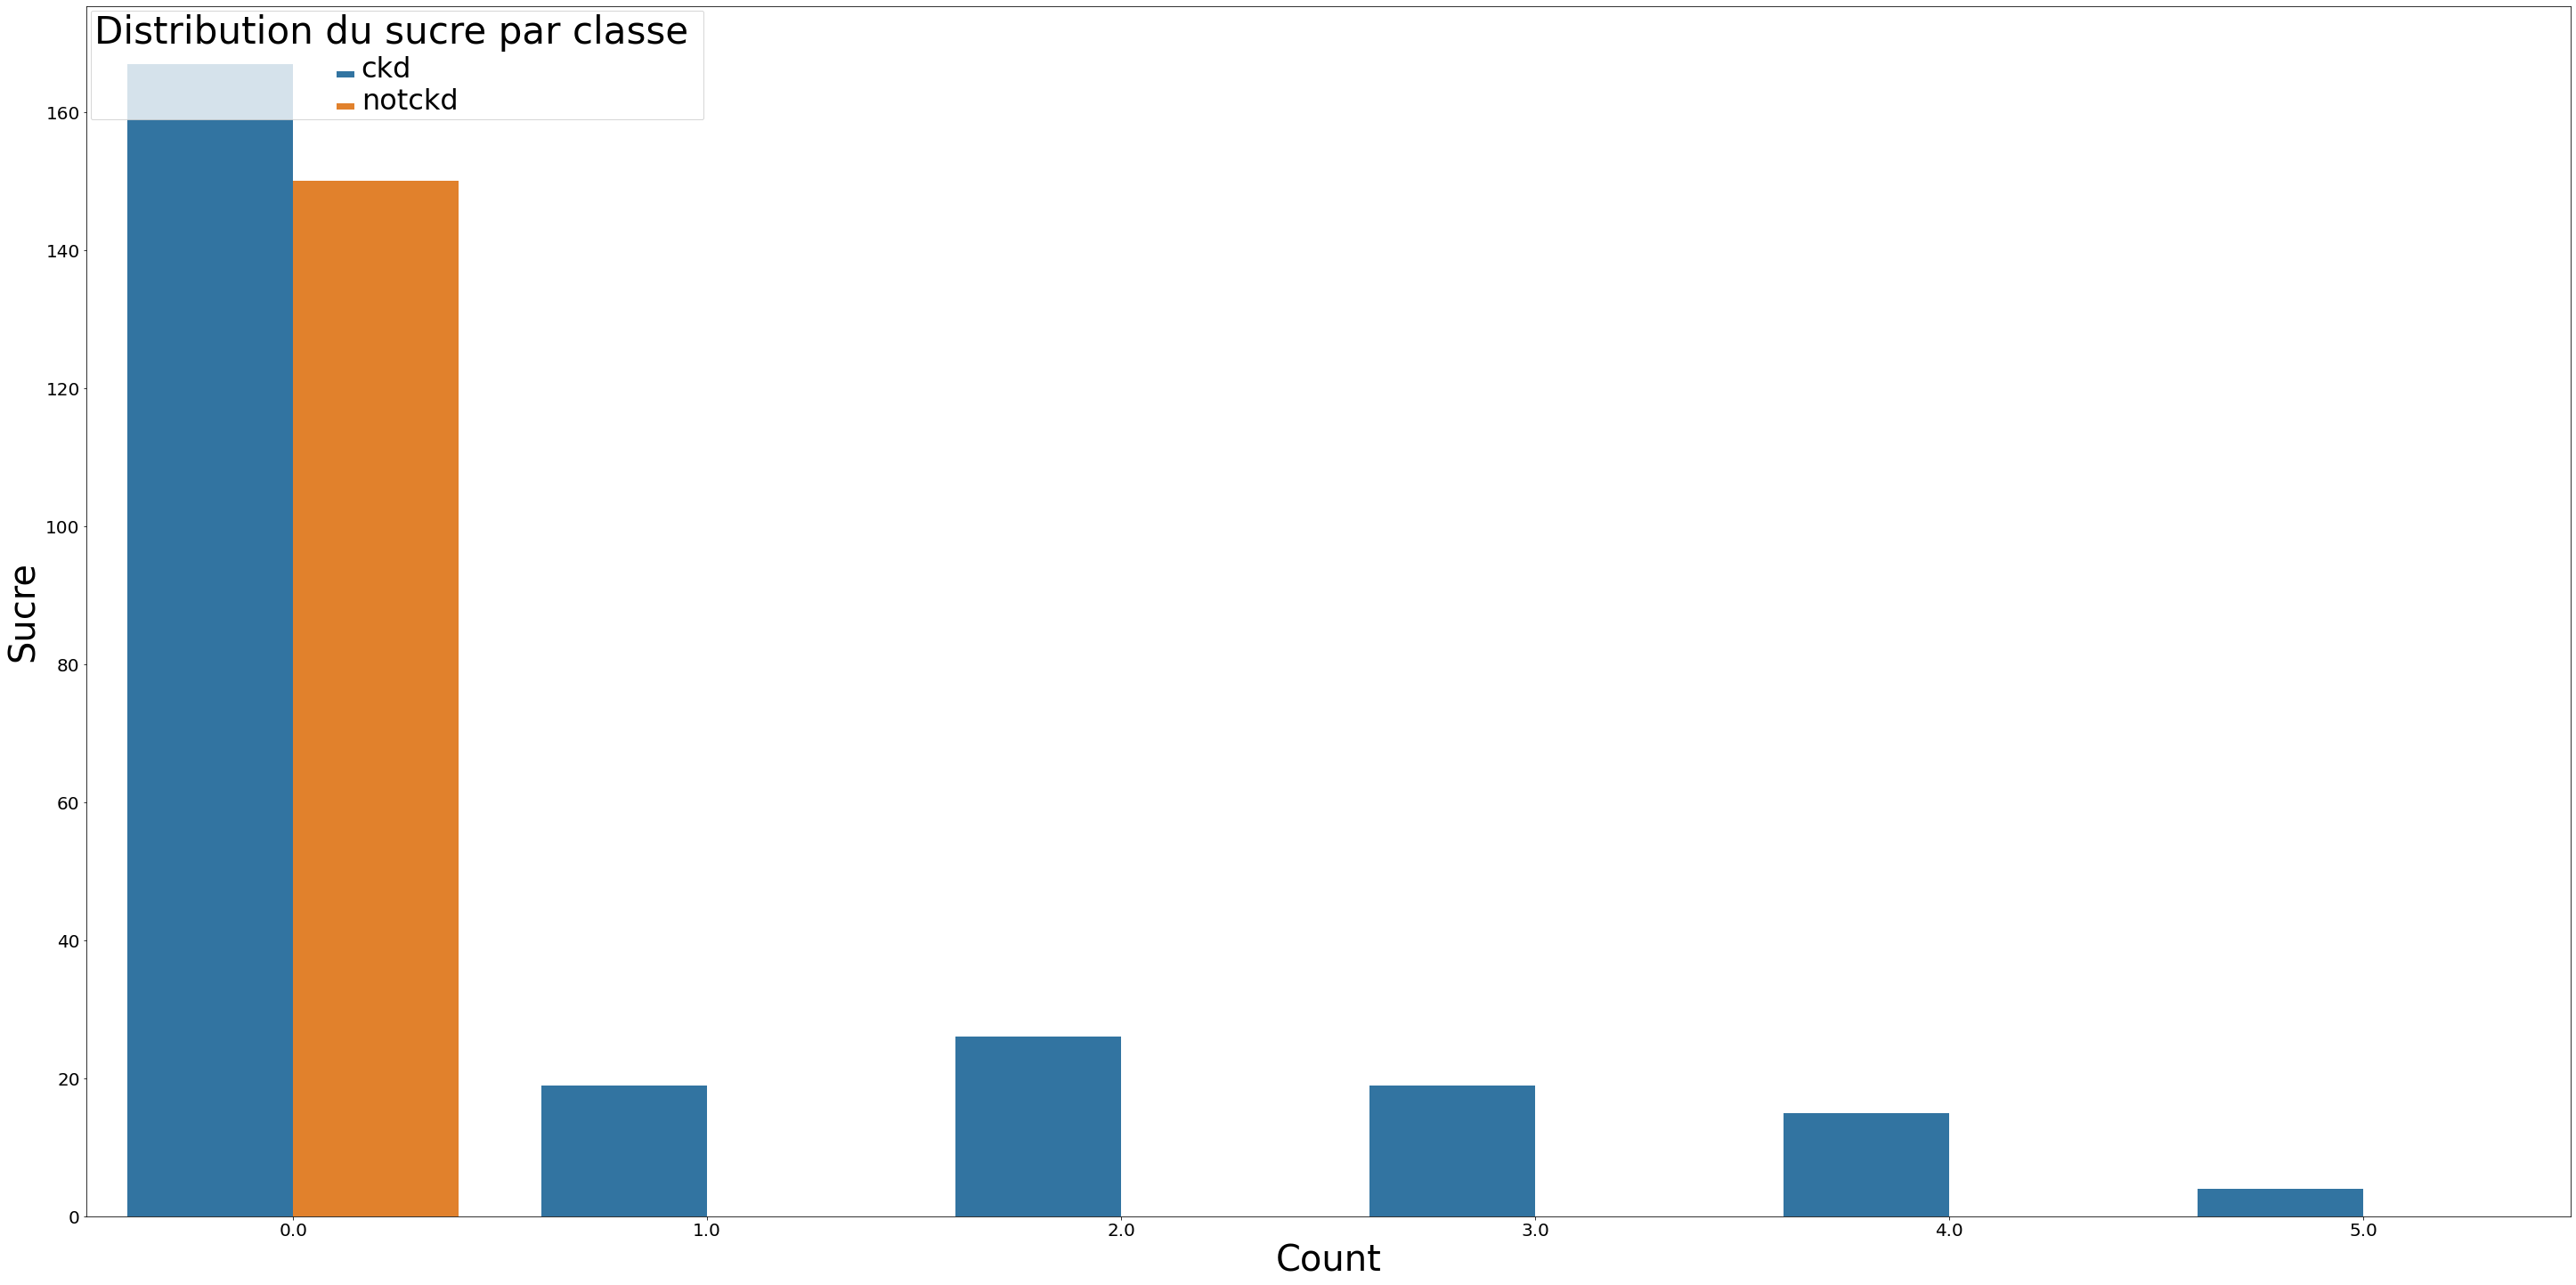

In [129]:
PlottingFunctions.PlotDistribution(CKD_dataframe,'su',"Distribution du sucre par classe ","Sucre")

In [130]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class','su')

su    count
su     1.00000 -0.72106
count -0.72106  1.00000

The correlation between sugar and CKD patient exists, hwoever the data is tricky here. 
Since the majority of participants ( ckd and not ckd) do not have sugar issues, almost all distribution is plotted in 0 bar. When the suger goes up ( from 1 to 5) there are no healthy patient anymore, only ckd patients are found, but with less proportions. 

The correlation might be strongly negative but, we have to consider it as positive : When the suger goes up, the risk of having a CKD goes up too. 

A better investigation is shown down 

In [134]:
PlottingFunctions.violin(CKD_dataframe,'su')

We can clearly see here that when suger goes up, ckd patient are more found, however non-ckd patients never have suger issues. However, this specific observation can only apply to our data distribution and is not the case in real life. Those who have sugar do not necessarily have kidney failure !

> Conclusion : Correlation ✅ 

### Correlation between red blood cells(rdc) and CKD patients (+)

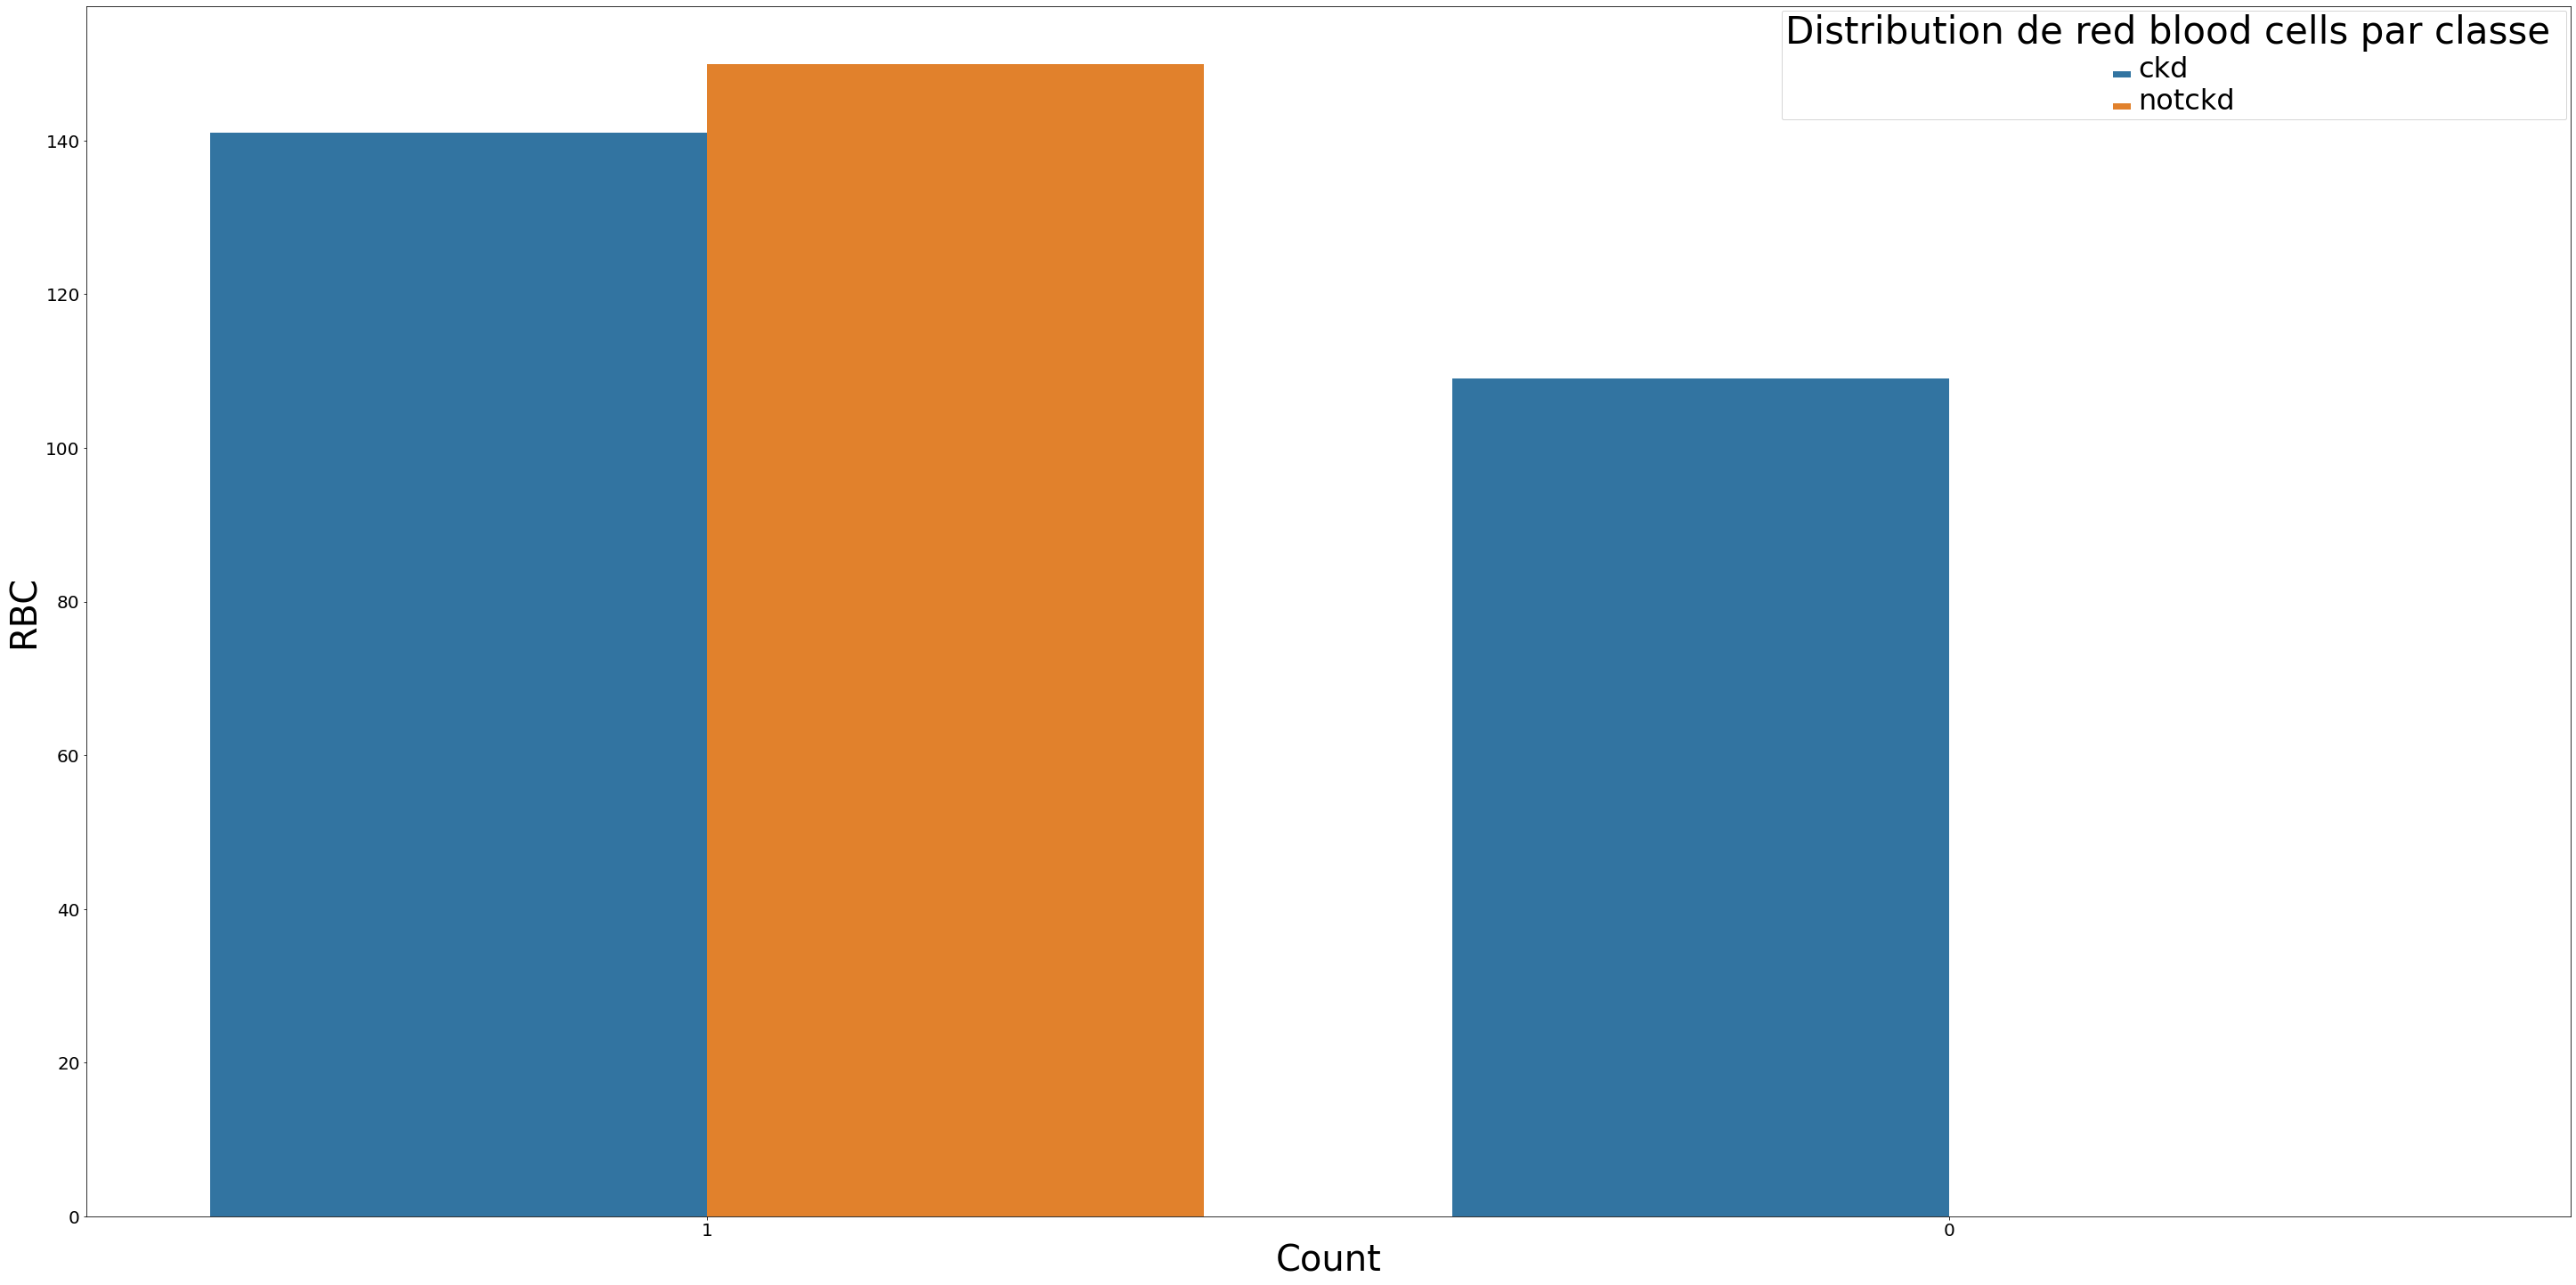

In [135]:
currentVariable='rbc'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de red blood cells par classe ","RBC")


En prennant en considération que *rbc* est une variable nominale transformée en une valeur numérique, il est préférable d'utiliser le *Fisher exact test* ( du fait que la population que nous disposons est assez petite)

In [136]:
cont = pd.crosstab(CKD_dataframe["rbc"],CKD_dataframe["class"])
scipy.stats.fisher_exact(cont)

(inf, 5.159258005862599e-28)

Le test retournée est positif "il existe une relation entre le *rdc* et le fait que la patient a une insufisance rénale"" du fait que la p-value retournée par le fisher exact test est inférieur a 0.05 (5.159258005862599e-28)


The returned test is positive "there is a relationship between the *rdc* and the fact that the patient has renal insufficiency" because the p-value returned by the fisher exact test is less than 0.05 (5.159258005862599e-28).

The p-value: we first start with a hypothisis of not having a correlation between variables, if the probability of the p-value is above 0.05, we can consider that the start hypothesis is true and there is effectively no correlation. However, if the P-value is lower than 0.05, the starting hypothesis is denied and we can assume that there is a correlation between the two variables. 

To be sure, we proceed to the implementation of this graph which clearly shows a relationship between ckd patients and an rbc less than 1

In [ ]:
PlottingFunctions.violin(CKD_dataframe,'rbc')

> Conclusion : Correlation ✅ 

### Correlation between pus cell (pc) and CKD patients (+)

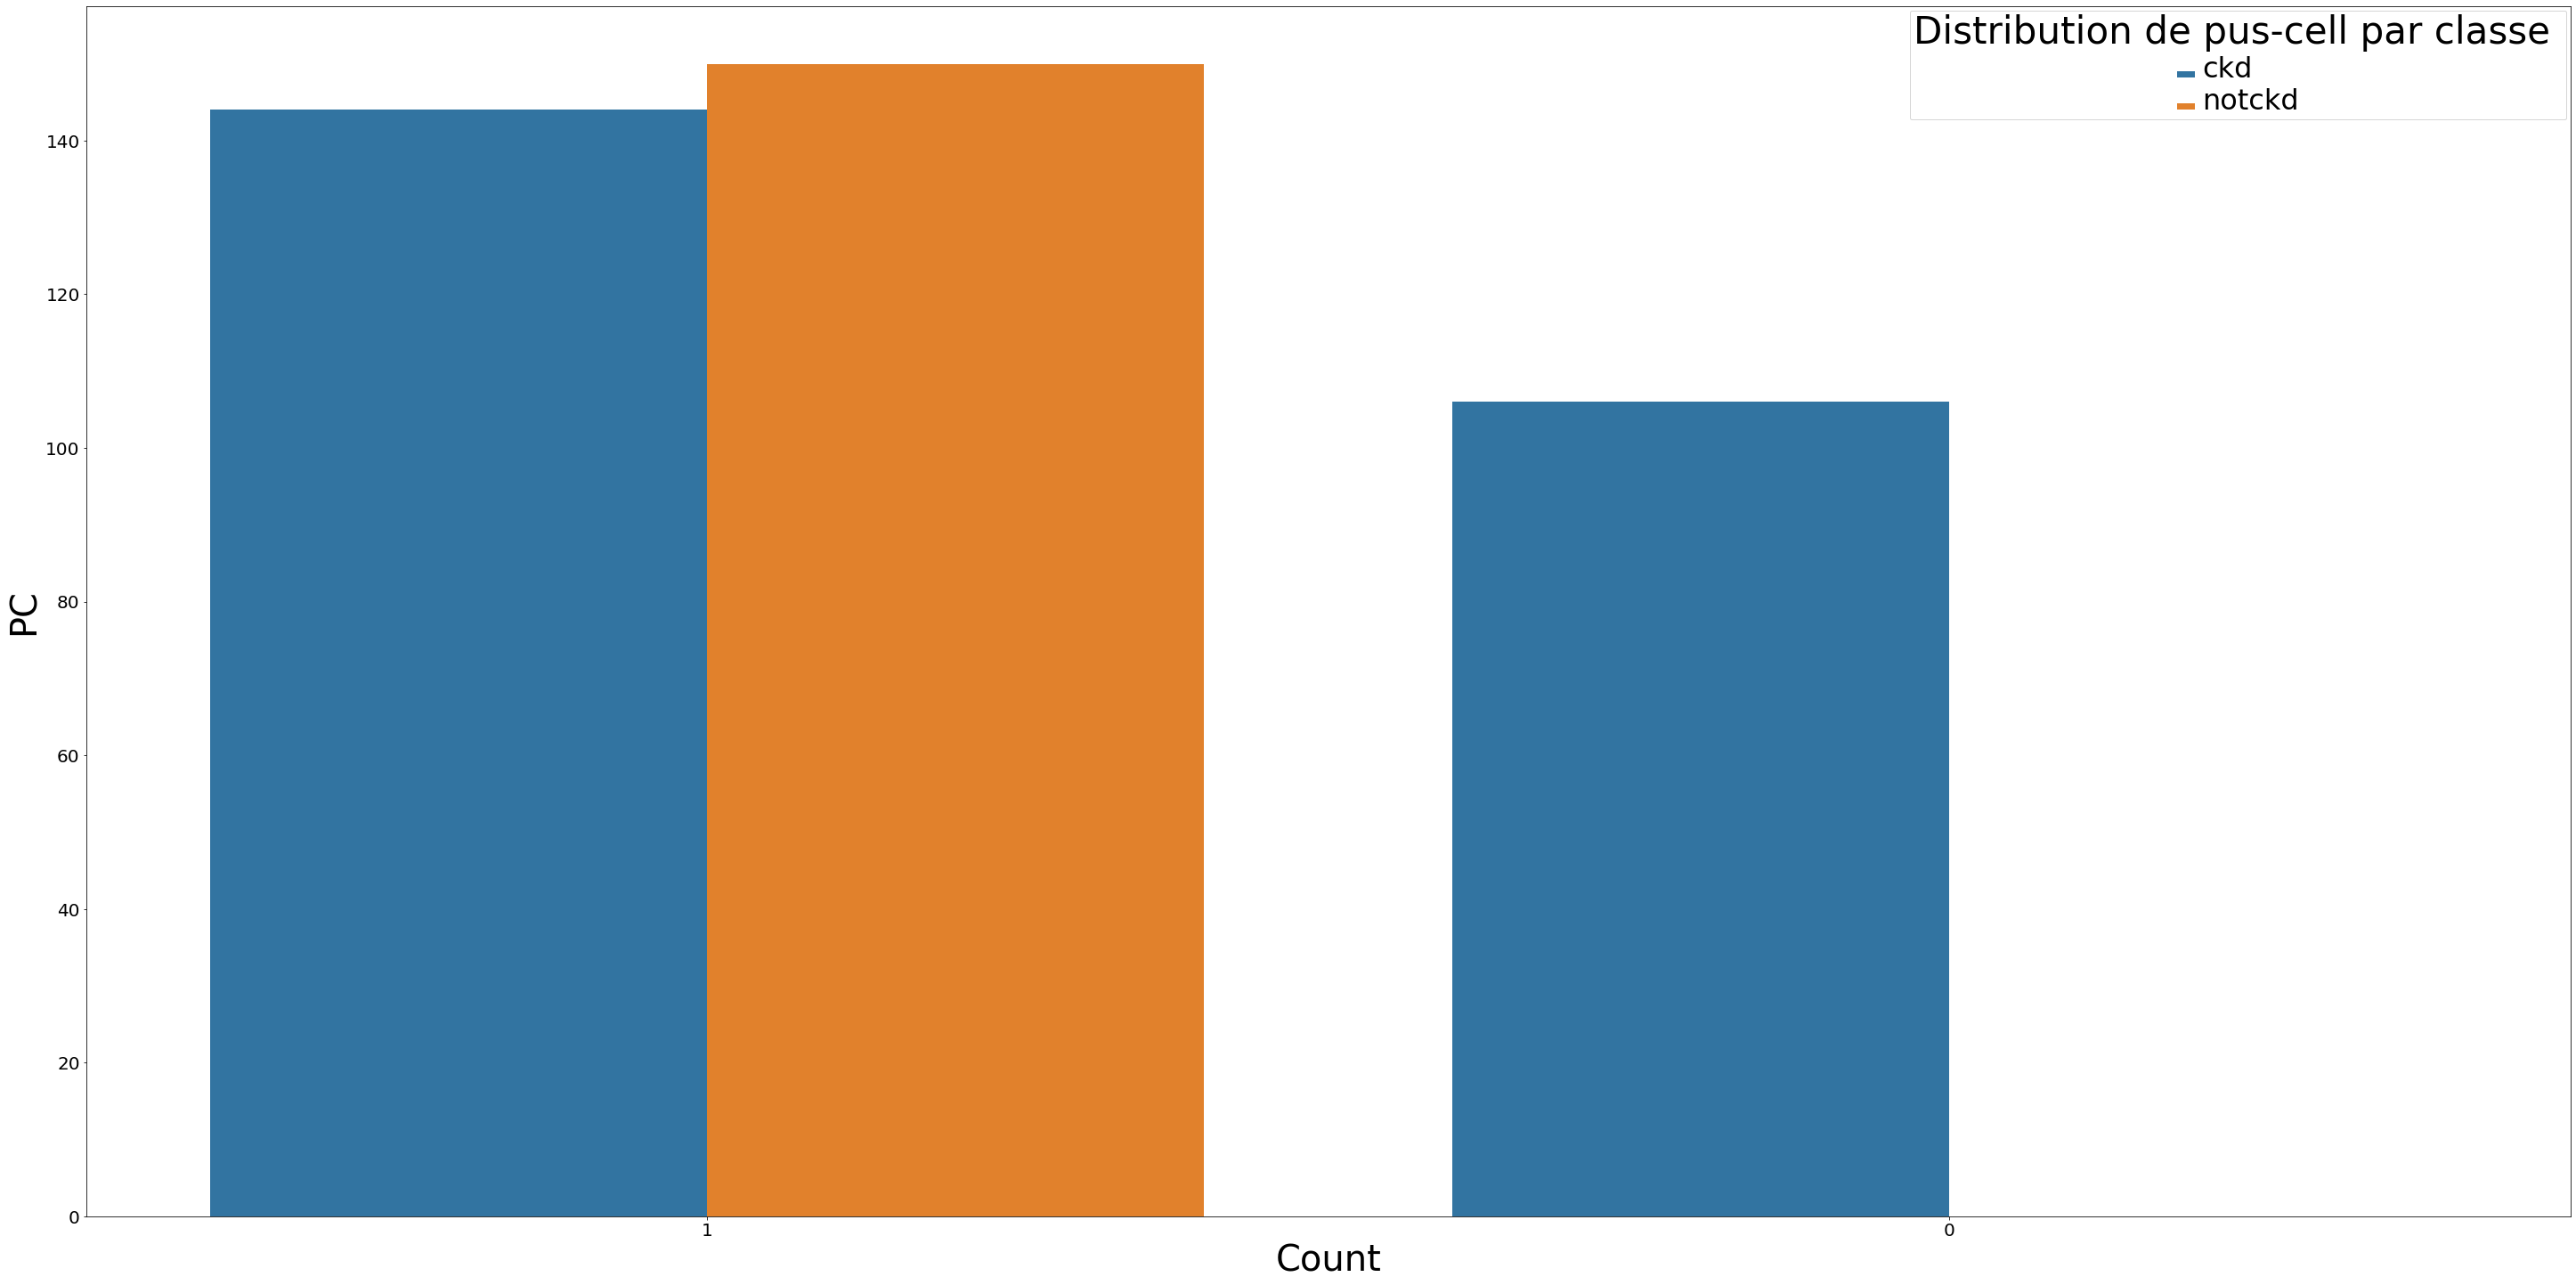

In [137]:
currentVariable='pc'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de pus-cell par classe ","PC")


Une valeur aussi nominal, un test similaire qu'au précédent est effectué. Cette fois ci, nous allons utilisé le `chi2_contingency`

In [138]:
cont = pd.crosstab(CKD_dataframe["pc"],CKD_dataframe["class"])
scipy.stats.chi2_contingency(cont)

(84.36743250759423, 4.108602204507651e-20, 1, array([[ 66.25,  39.75],
        [183.75, 110.25]]))

Also, we notice here that the p-value is less than 0.05 (4.108602204507651e-20)
the relationship between these two variables is inevitable

> Conclusion : Correlation ✅ 

### Relation entre le pus cell clumps (pcc) et le fait d'avoir ou pas une insuffisance rénale (+)

Correlation between pus cell clumps (pcc) and CKD patients (+)

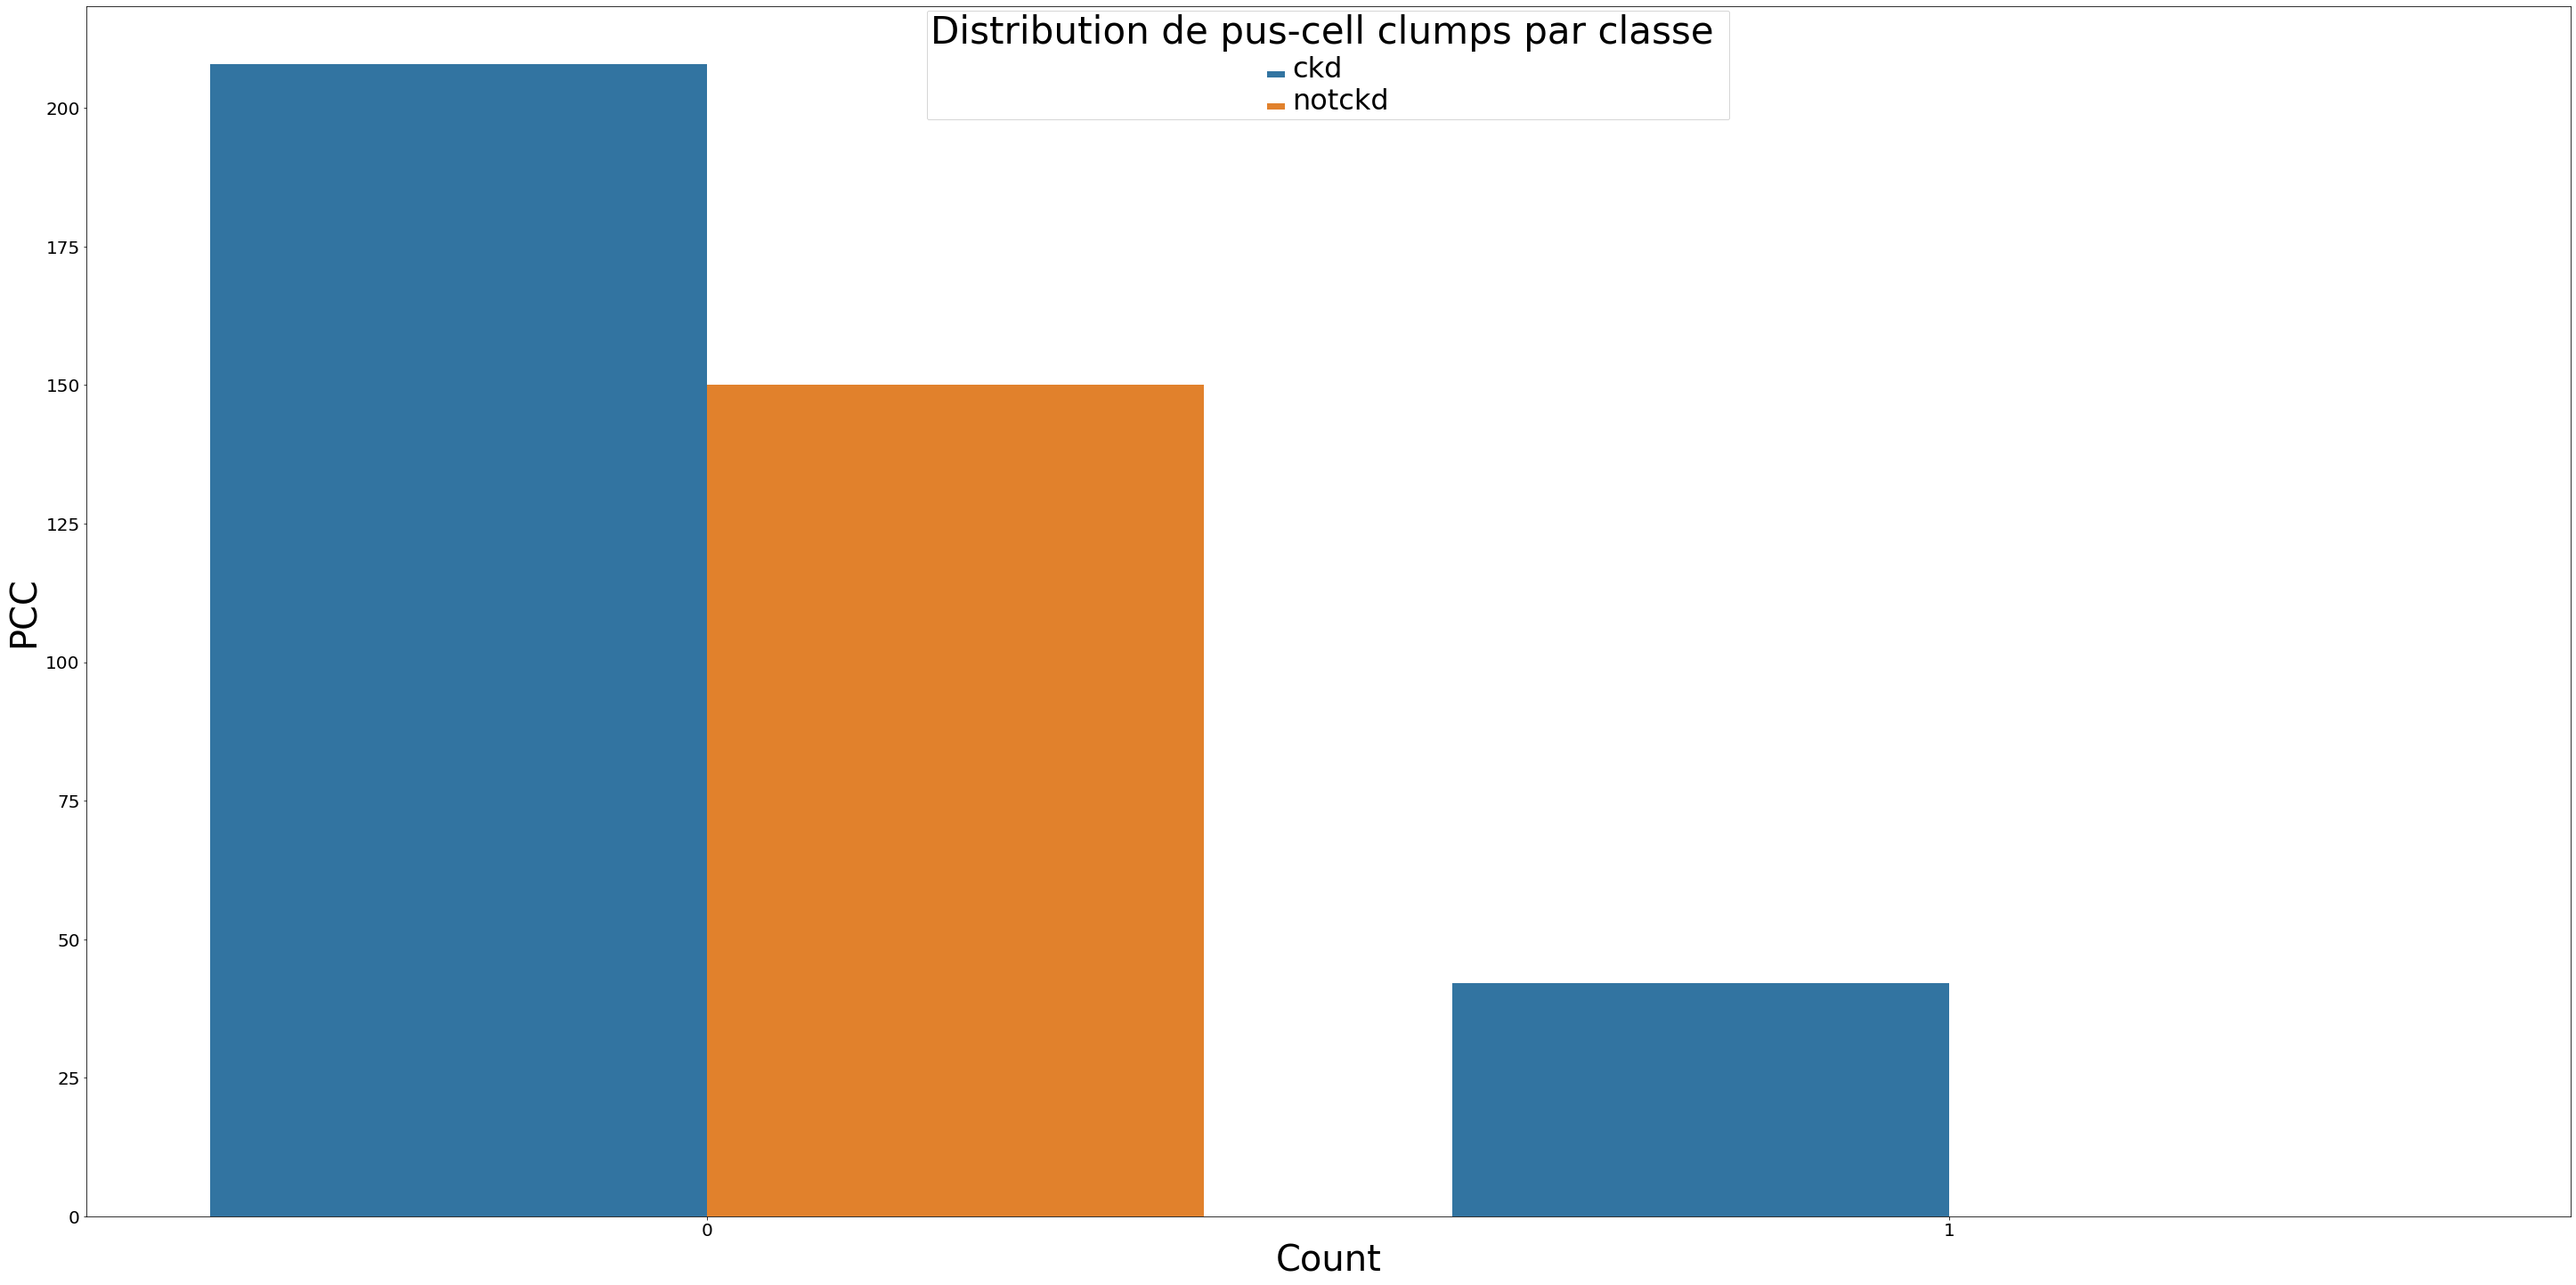

In [139]:
currentVariable='pcc'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de pus-cell clumps par classe ","PCC")

In [140]:
cont = pd.crosstab(CKD_dataframe["pcc"],CKD_dataframe["class"])
scipy.stats.chi2_contingency(cont)

(26.397091425024385, 2.779587257224494e-07, 1, array([[223.75, 134.25],
        [ 26.25,  15.75]]))

Same observation as for the variable studied previously with this time a p-value of 2.779587257224494e-07. However the fact that there are too few values ​​for CKD patients with pcc puts me in doubt.

> Conclusion : Correlation ✅ 

### Correlation between bacteria(ba) and CKD patients (-)


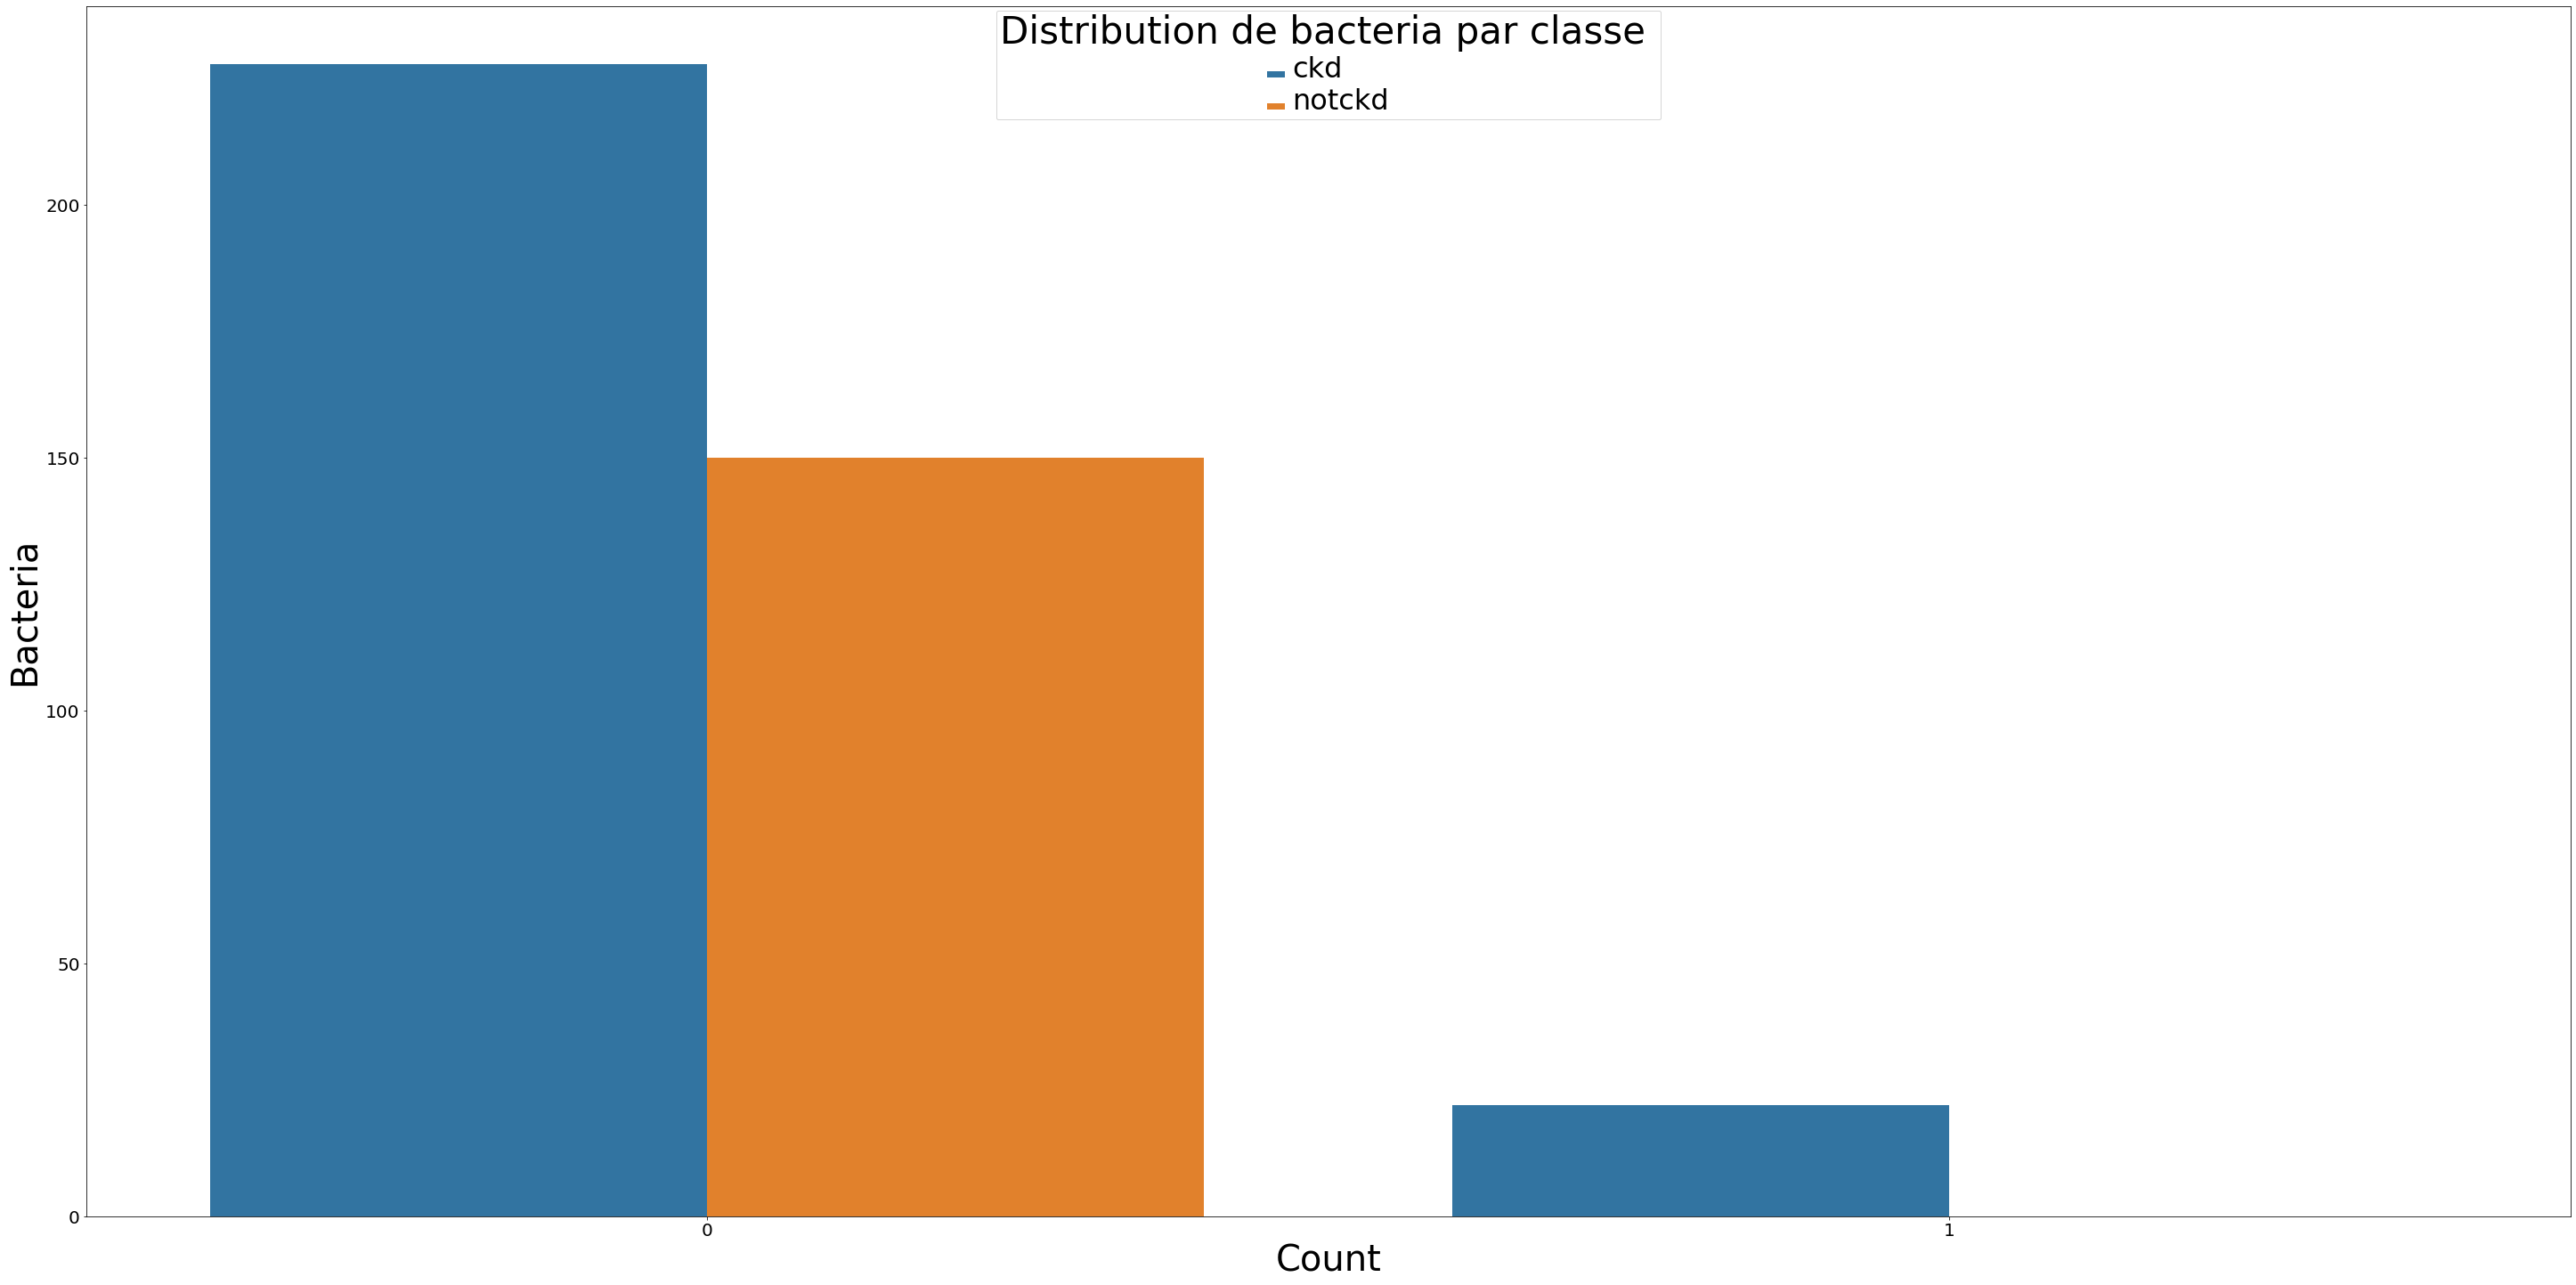

In [142]:
currentVariable='ba'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de bacteria par classe ","Bacteria")

Nominal value, we perform a similar operation this time with the barnard_exact test:

In [144]:
cont = pd.crosstab(CKD_dataframe["ba"],CKD_dataframe["class"])
scipy.stats.barnard_exact(cont)

BarnardExactResult(statistic=-3.737412737209251, pvalue=0.0001848872136221247)

The starting hypothesis being the fact that there is no relationship between the bacteria and the fact that the patient has renal insufficiency, the p-value being fixed in our experiments a (0.005) calculated demonstrates the opposite with a value of 0.0001848872136221247. The correlation between these two values ​​exists. However, I would like to run more experimentation for this fact.

To get to the bottom of it, we are launching more investigation with the violin chart

In [145]:
PlottingFunctions.violin(CKD_dataframe,'ba')

Very few patients who have CKD have a bacterial attack or many CKD and non-CKD patients do not have a bacterial attack. Therefore, I think it would be more lucid to say that the correlation is very weak

> Conclusion : No Correlation 🔻

### Correlation between Blood Glucose Random (bgr) and CKD patients (+)

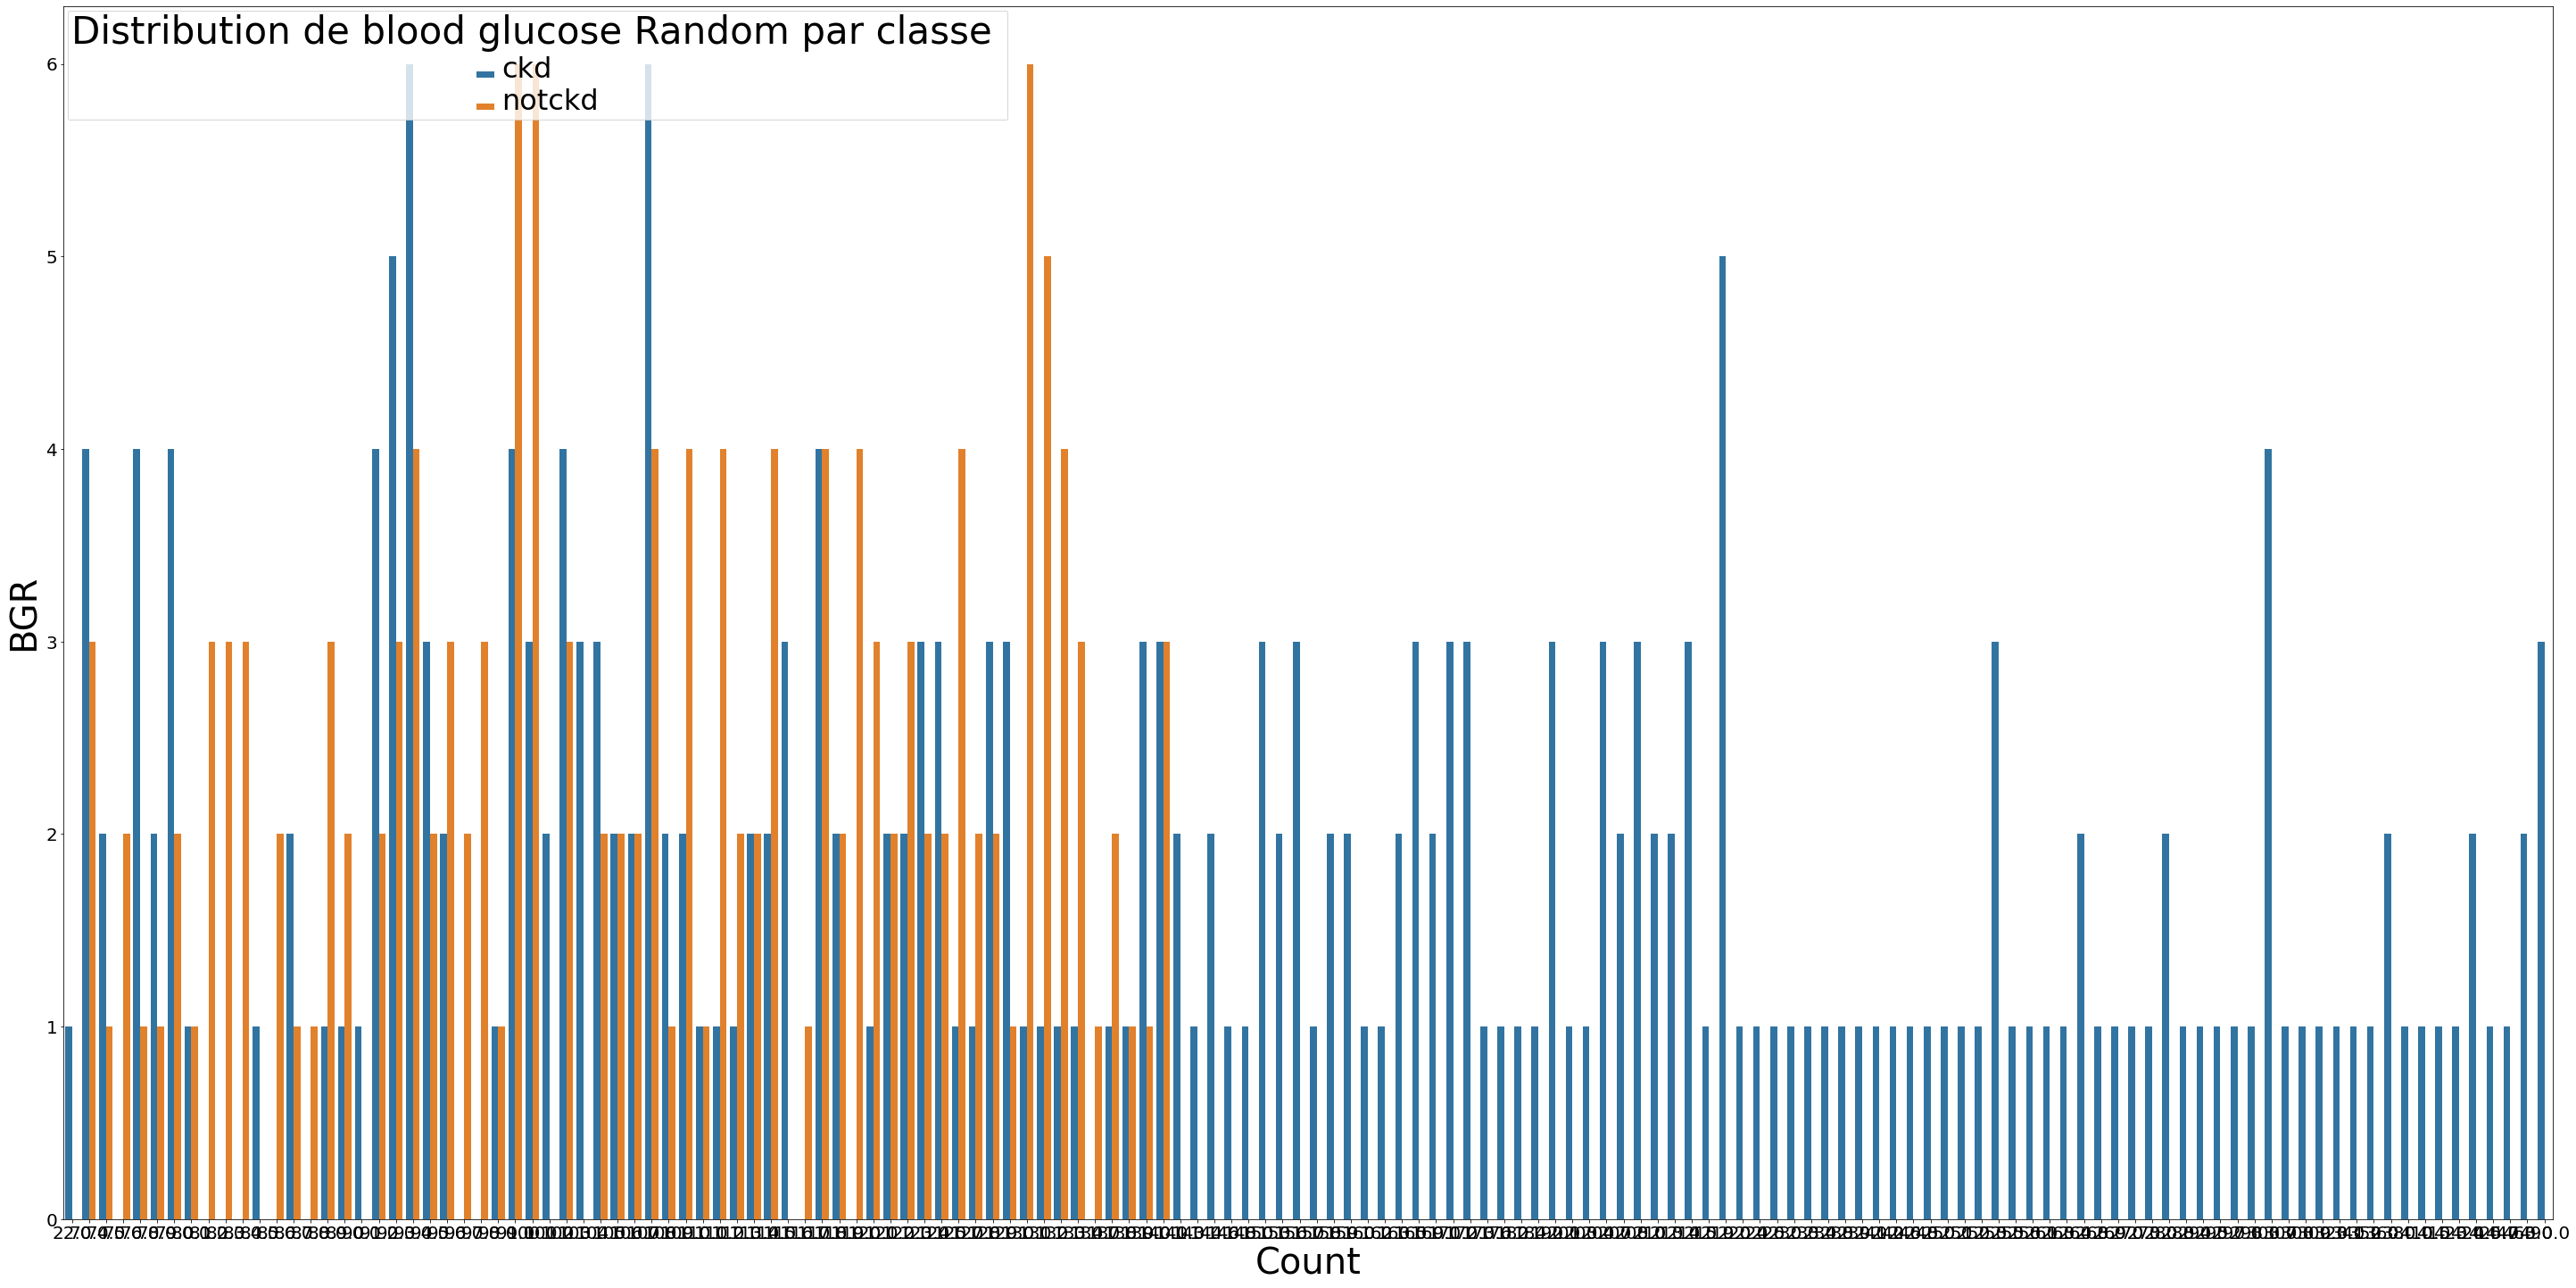

In [146]:
currentVariable='bgr'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de blood glucose Random par classe ","BGR")

In [147]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

bgr     count
bgr    1.000000 -0.322966
count -0.322966  1.000000

We investigate a bit deeper ...

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

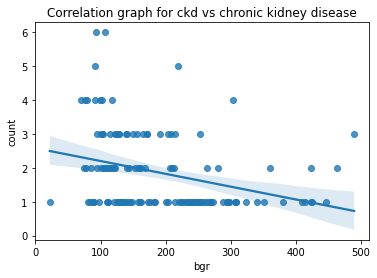

In [148]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

We notice a weak negative correlation between these two variables, the ckd patient and the bgr (blood glucose random. For a better visualization, let's see the violin graph.

In [149]:
PlottingFunctions.violin(CKD_dataframe,'bgr')

The upper graph shows that CKD patients have a blood glucose problem. Non-ckd patients do not have this problem. However, this is only true for this distribution. It is not impossible to find patients who have a blood glucose concentration that is not ckd. That said, with regard to this experiment, I think it would not be erroneous to consider this variable as having a correlation with the final class.

> Conclusion : Correlation ✅ 

### Correlation between Blood Urea (bu) and CKD patients (+)

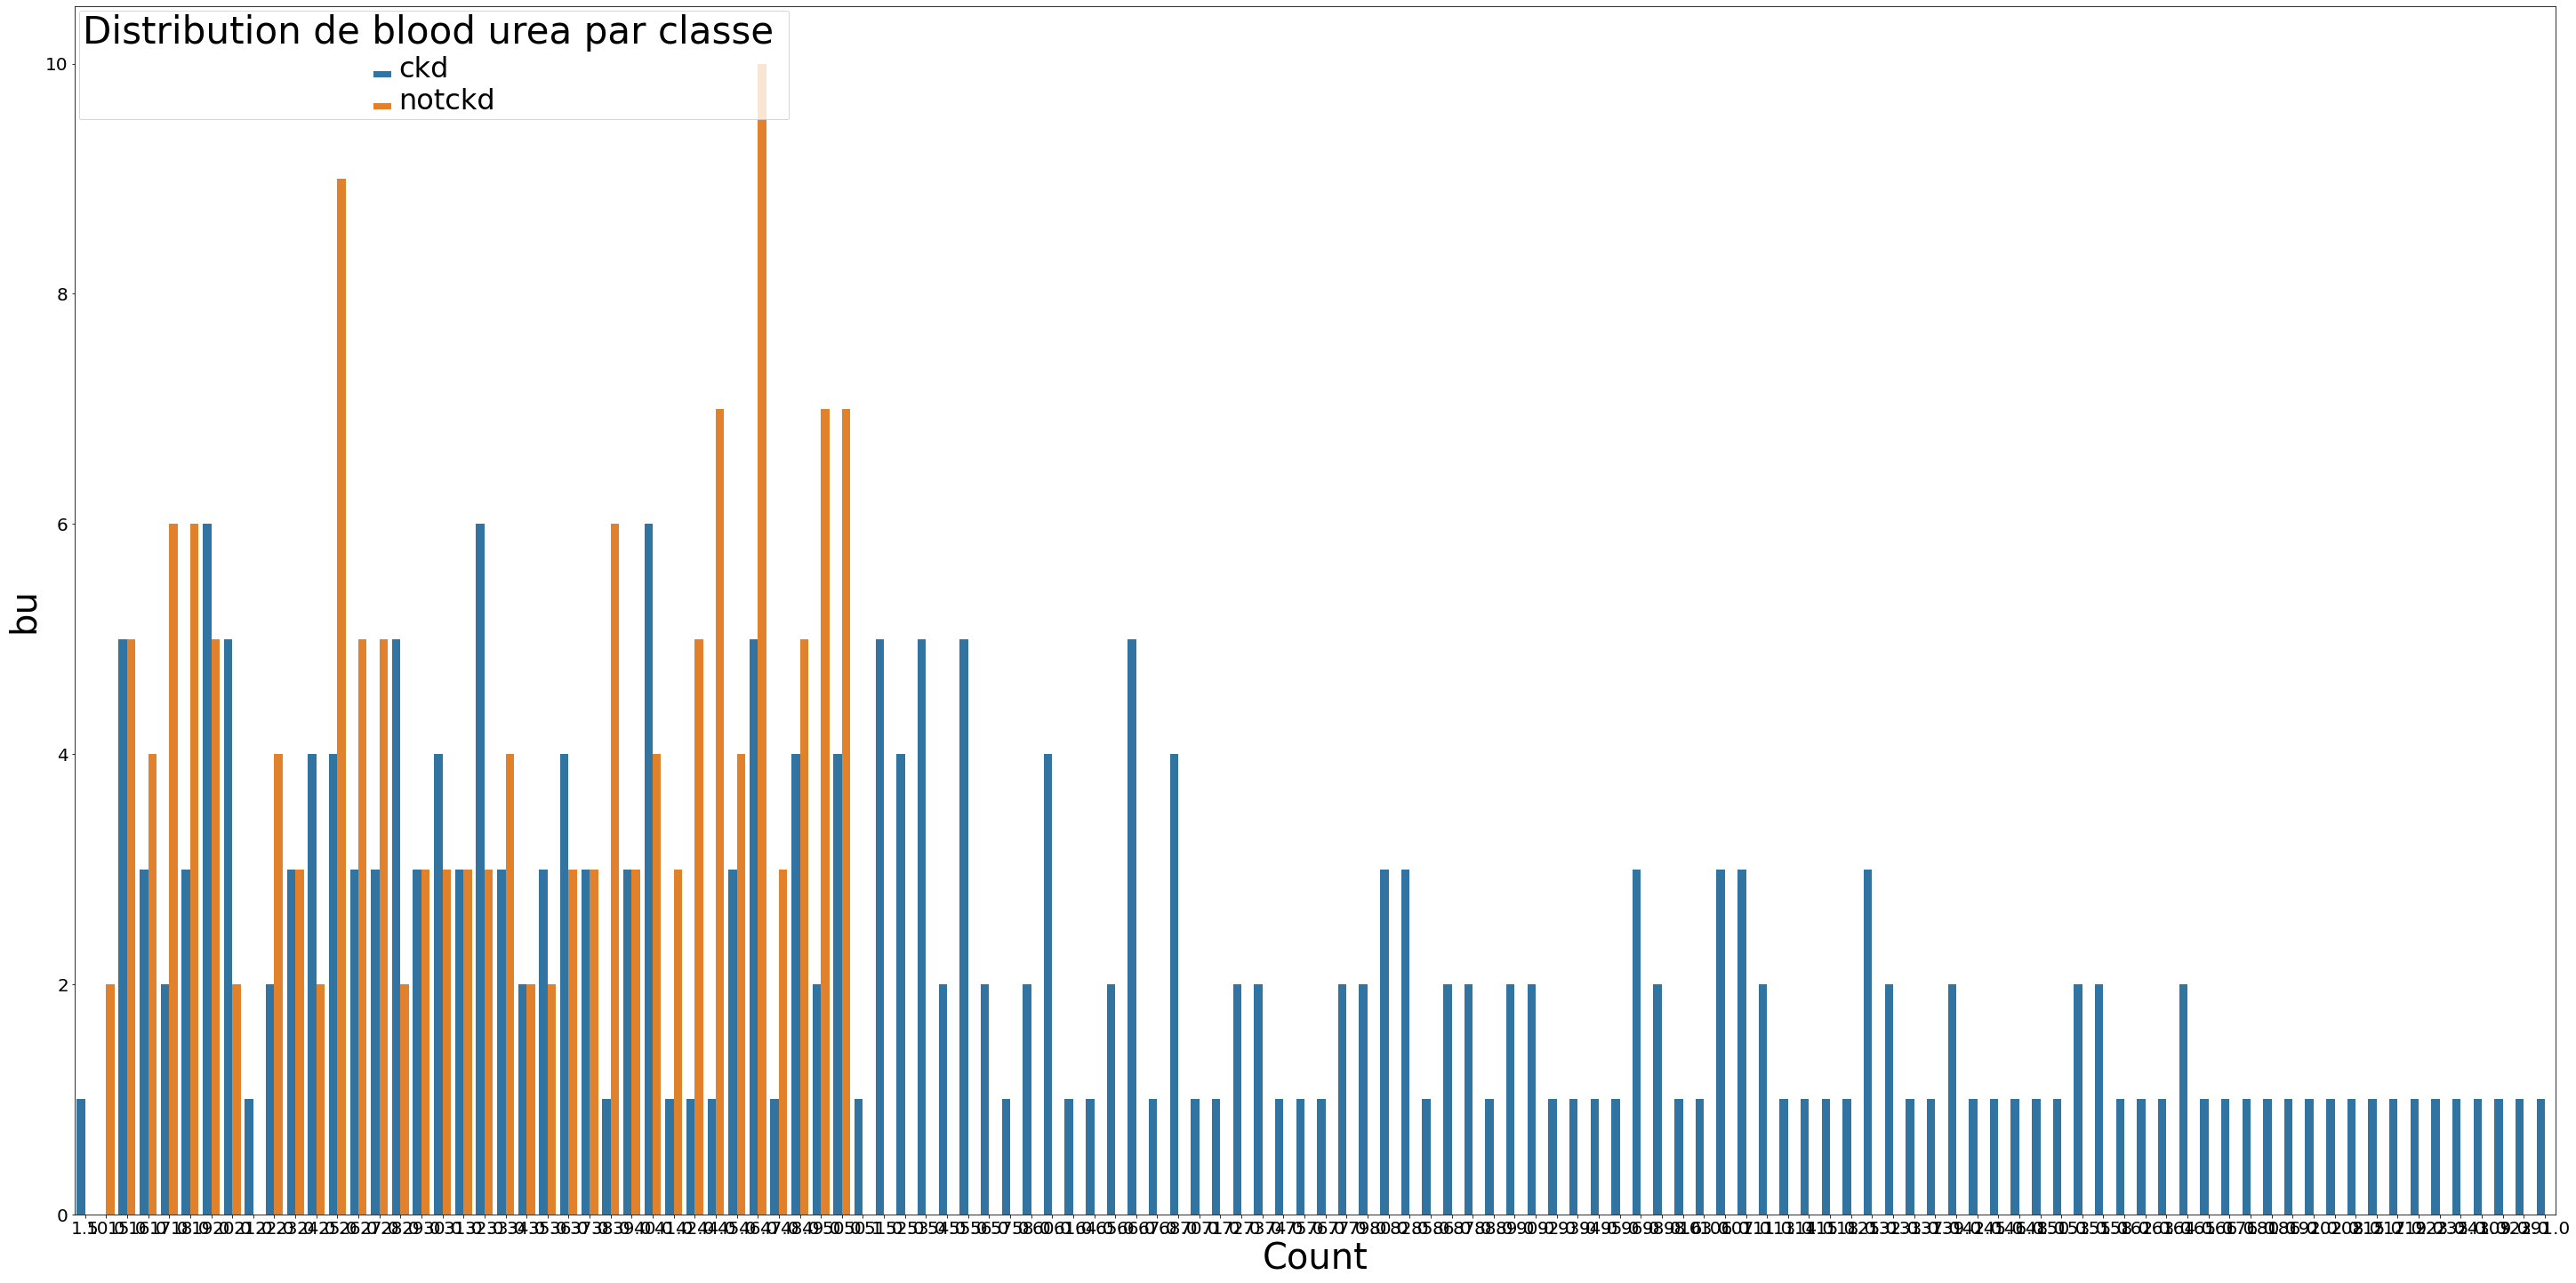

In [164]:
currentVariable='bu'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de blood urea par classe ",currentVariable)

In [165]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

bu     count
bu     1.000000 -0.511028
count -0.511028  1.000000

Il existe une corrélation négative entre les patient ayant le ckd et le Blood Urea, toutefois, relativement faible comme le confirme le graphique ci-après.

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

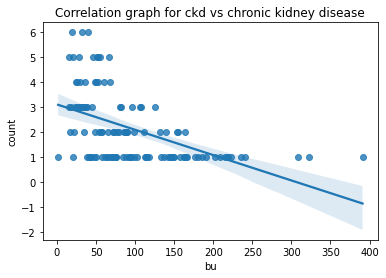

In [168]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

In [156]:
PlottingFunctions.violin(CKD_dataframe,'bu')

Sur ce graphique, nous remarquons que plusieurs de patient CKD et pas CKD ont un blood urea inverieur a 100, peu de patient on une bu superieur a 100. Ceci ne nous met pas dans une situation ideale pour déterminer une correlation certaine entre la BU et le fait d'avoir la CKD.

On this graph, we notice that several CKD and non-CKD patients have a blood urea below 100, some CKD patients have a *bu* above 100. This put us in a situation to say that there is correlation between *bu* and having CKD.

> Conclusion : Correlation ✅ 

### Correlation between Serum Creatinine (SC) and CKD patients (-)

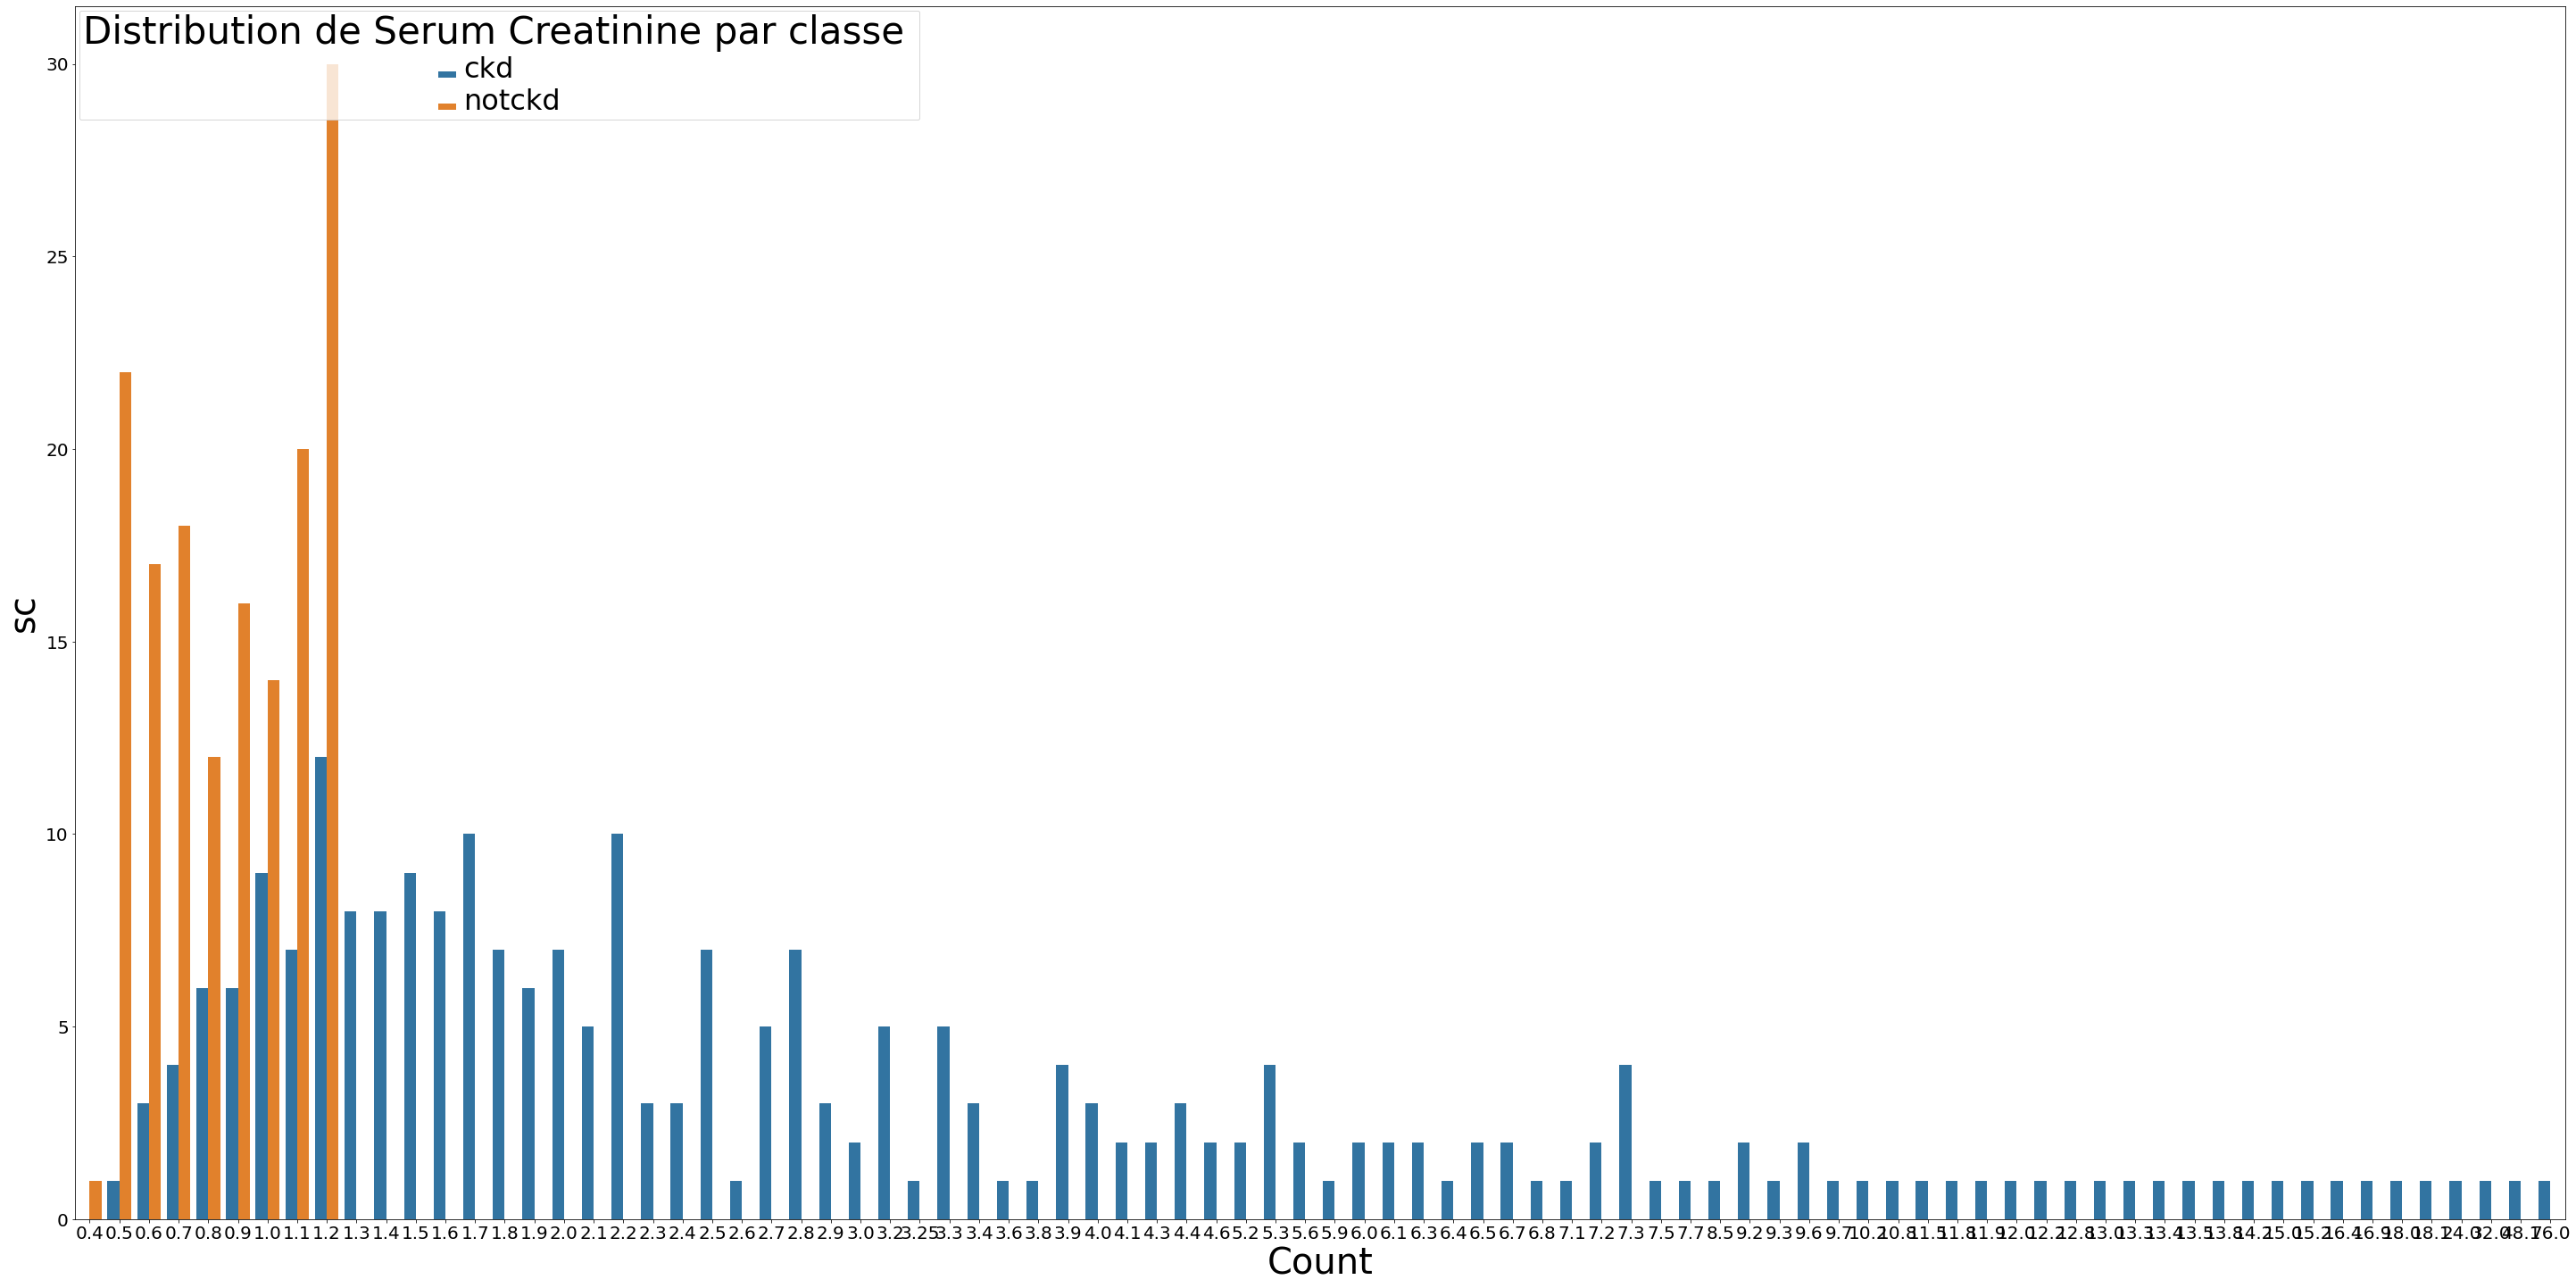

In [169]:
currentVariable='sc'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de Serum Creatinine par classe ",currentVariable)

In [170]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

sc     count
sc     1.000000 -0.421513
count -0.421513  1.000000

situaltion similaire que la précédente variable, les données dans la deuxième moitiée est quasi inéxistante, ce qui ne nous permet pas de trancher de manière ferme le fait qu'une corrélation existe. Nous poussons les investigations ... 

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

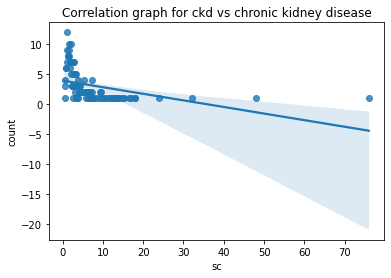

In [171]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby(['sc']).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = 'sc', y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

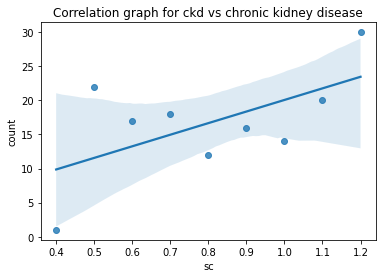

In [172]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'notckd'].groupby(['sc']).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = 'sc', y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

Voyant que la relations pour les patients atteint de CKD est minime, nous estimons que la corrélation négative est limitée.

Seeing that the *sc* attribute relationship to CKD patients small, we believe that this negative correlation is limited.

> Conclusion : No Correlation 🔻

### Correlation between Sodium (sod) and CKD patients (-)


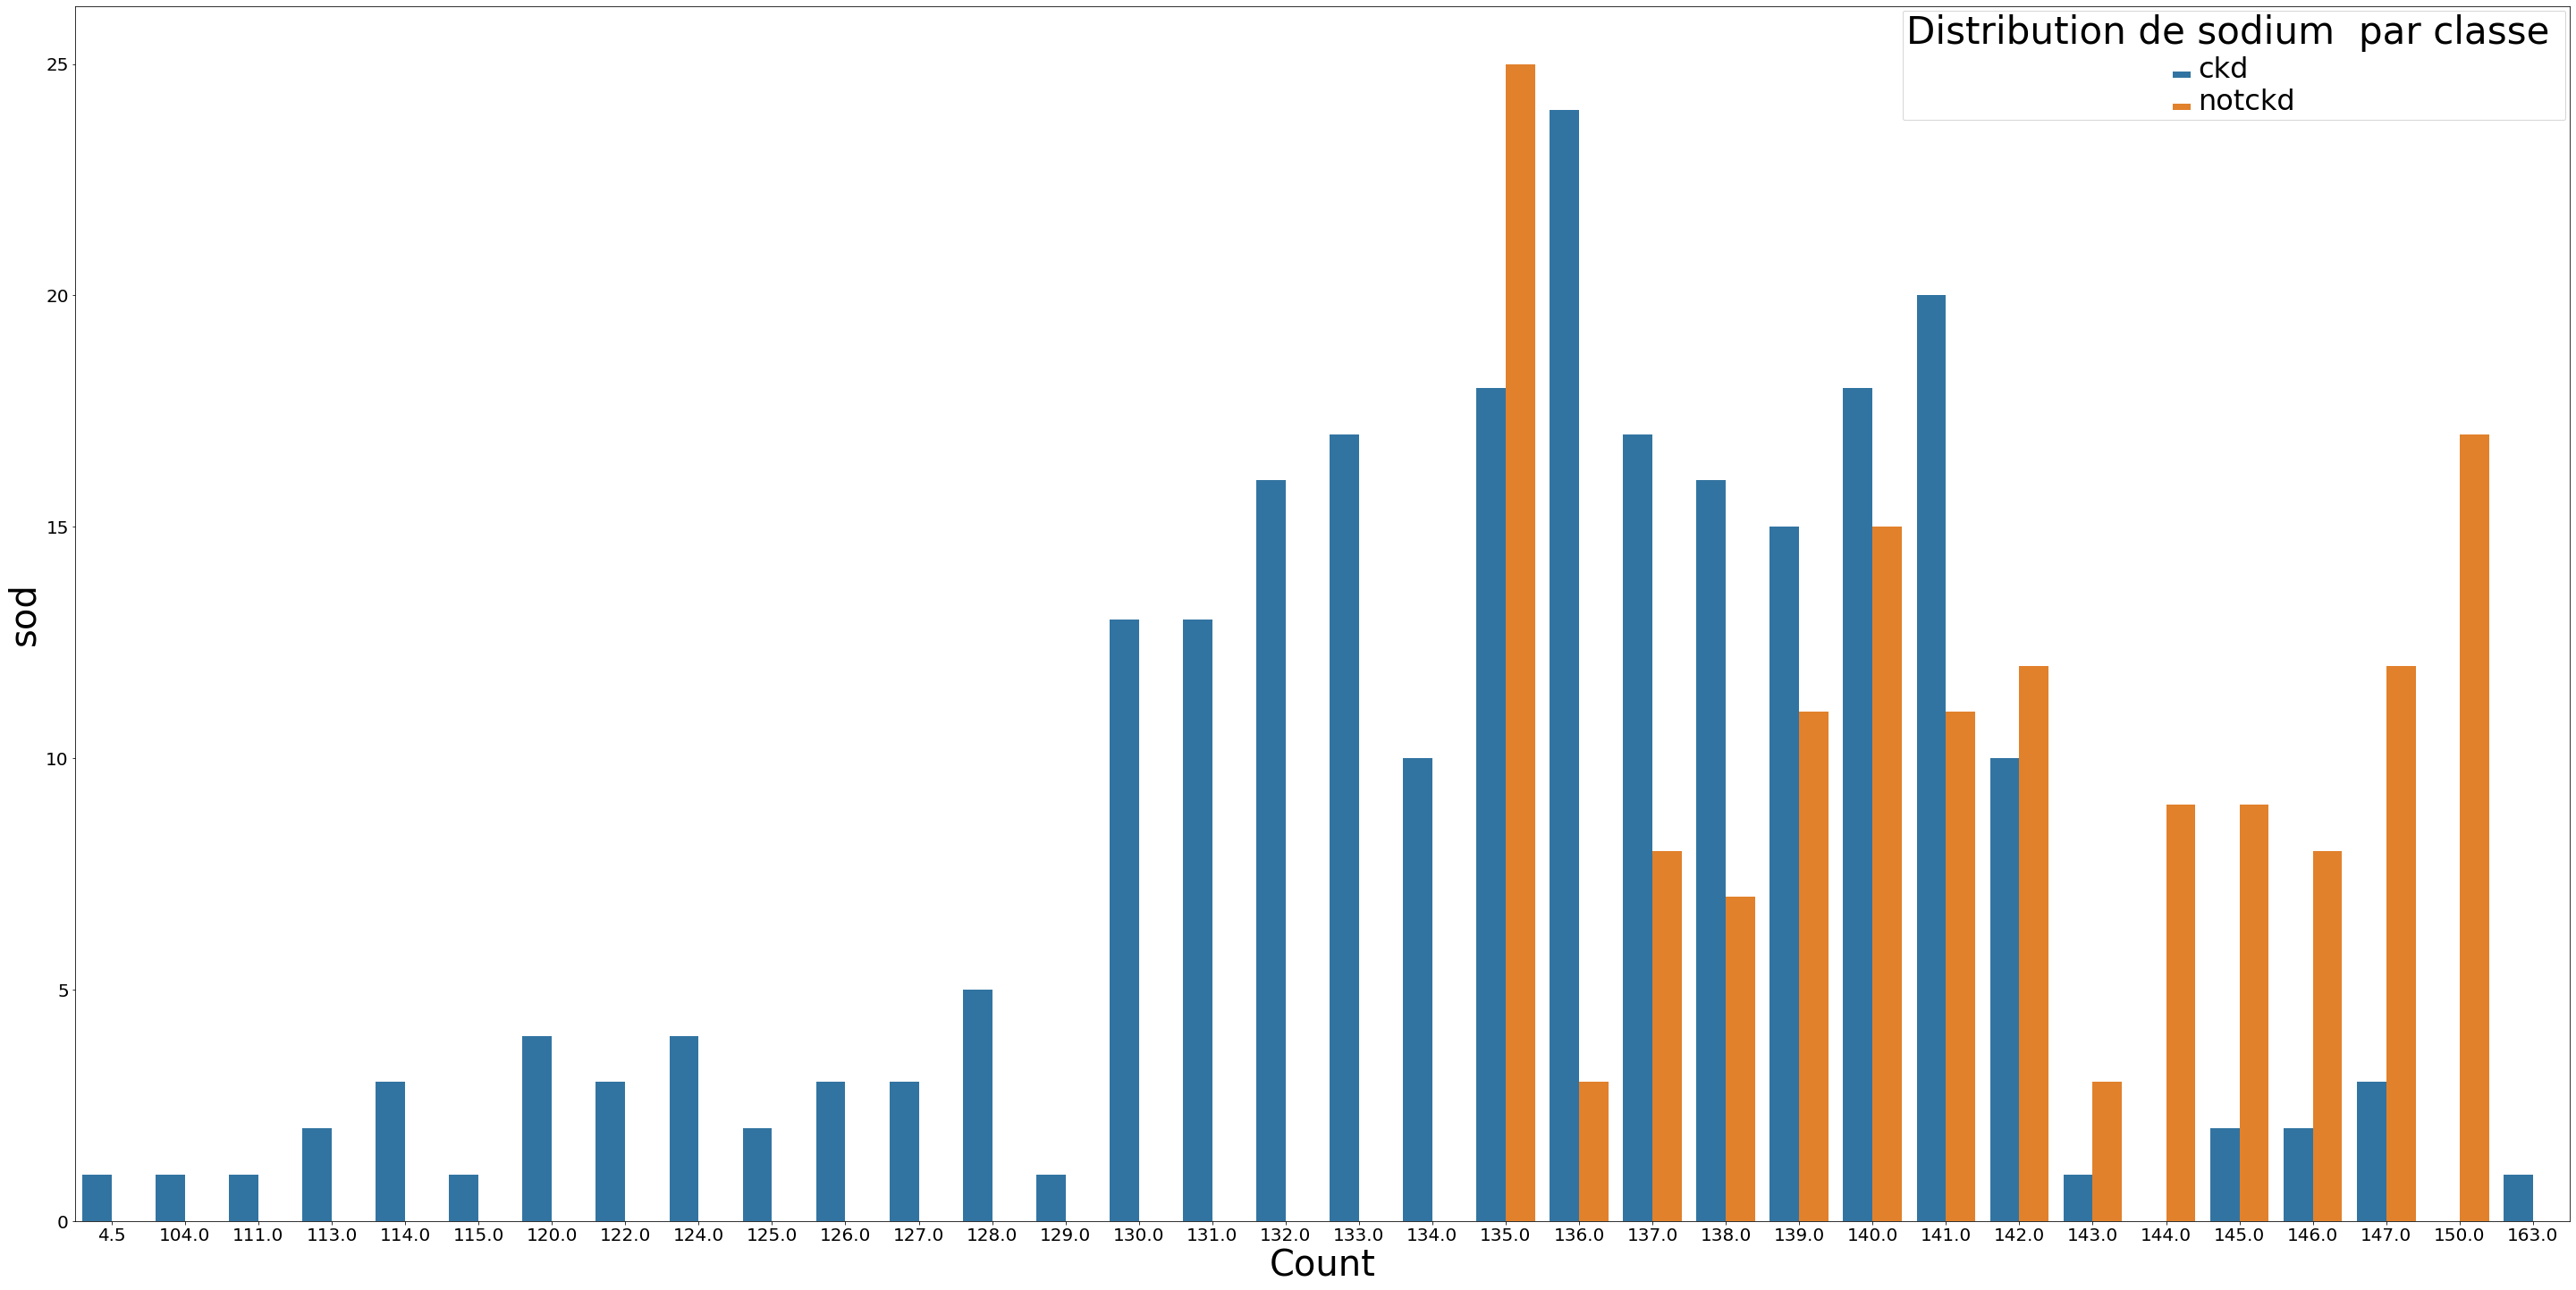

In [173]:
currentVariable='sod'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de sodium  par classe ",currentVariable)

In [174]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

sod     count
sod    1.000000  0.294368
count  0.294368  1.000000

There is a weak positive correlation between the two variables as shown by the value: 0.29, the following graph can give us more details:

In [176]:
PlottingFunctions.violin(CKD_dataframe,'sod')

We notice that few CKD patients have a lower than normal sodium concentration. Therefore, conclude that there is a correlation between CKD and sodium would be very difficult to do.

> Conclusion : No Correlation 🔻

### Correlation between Potassium (pot) and CKD patients (-)



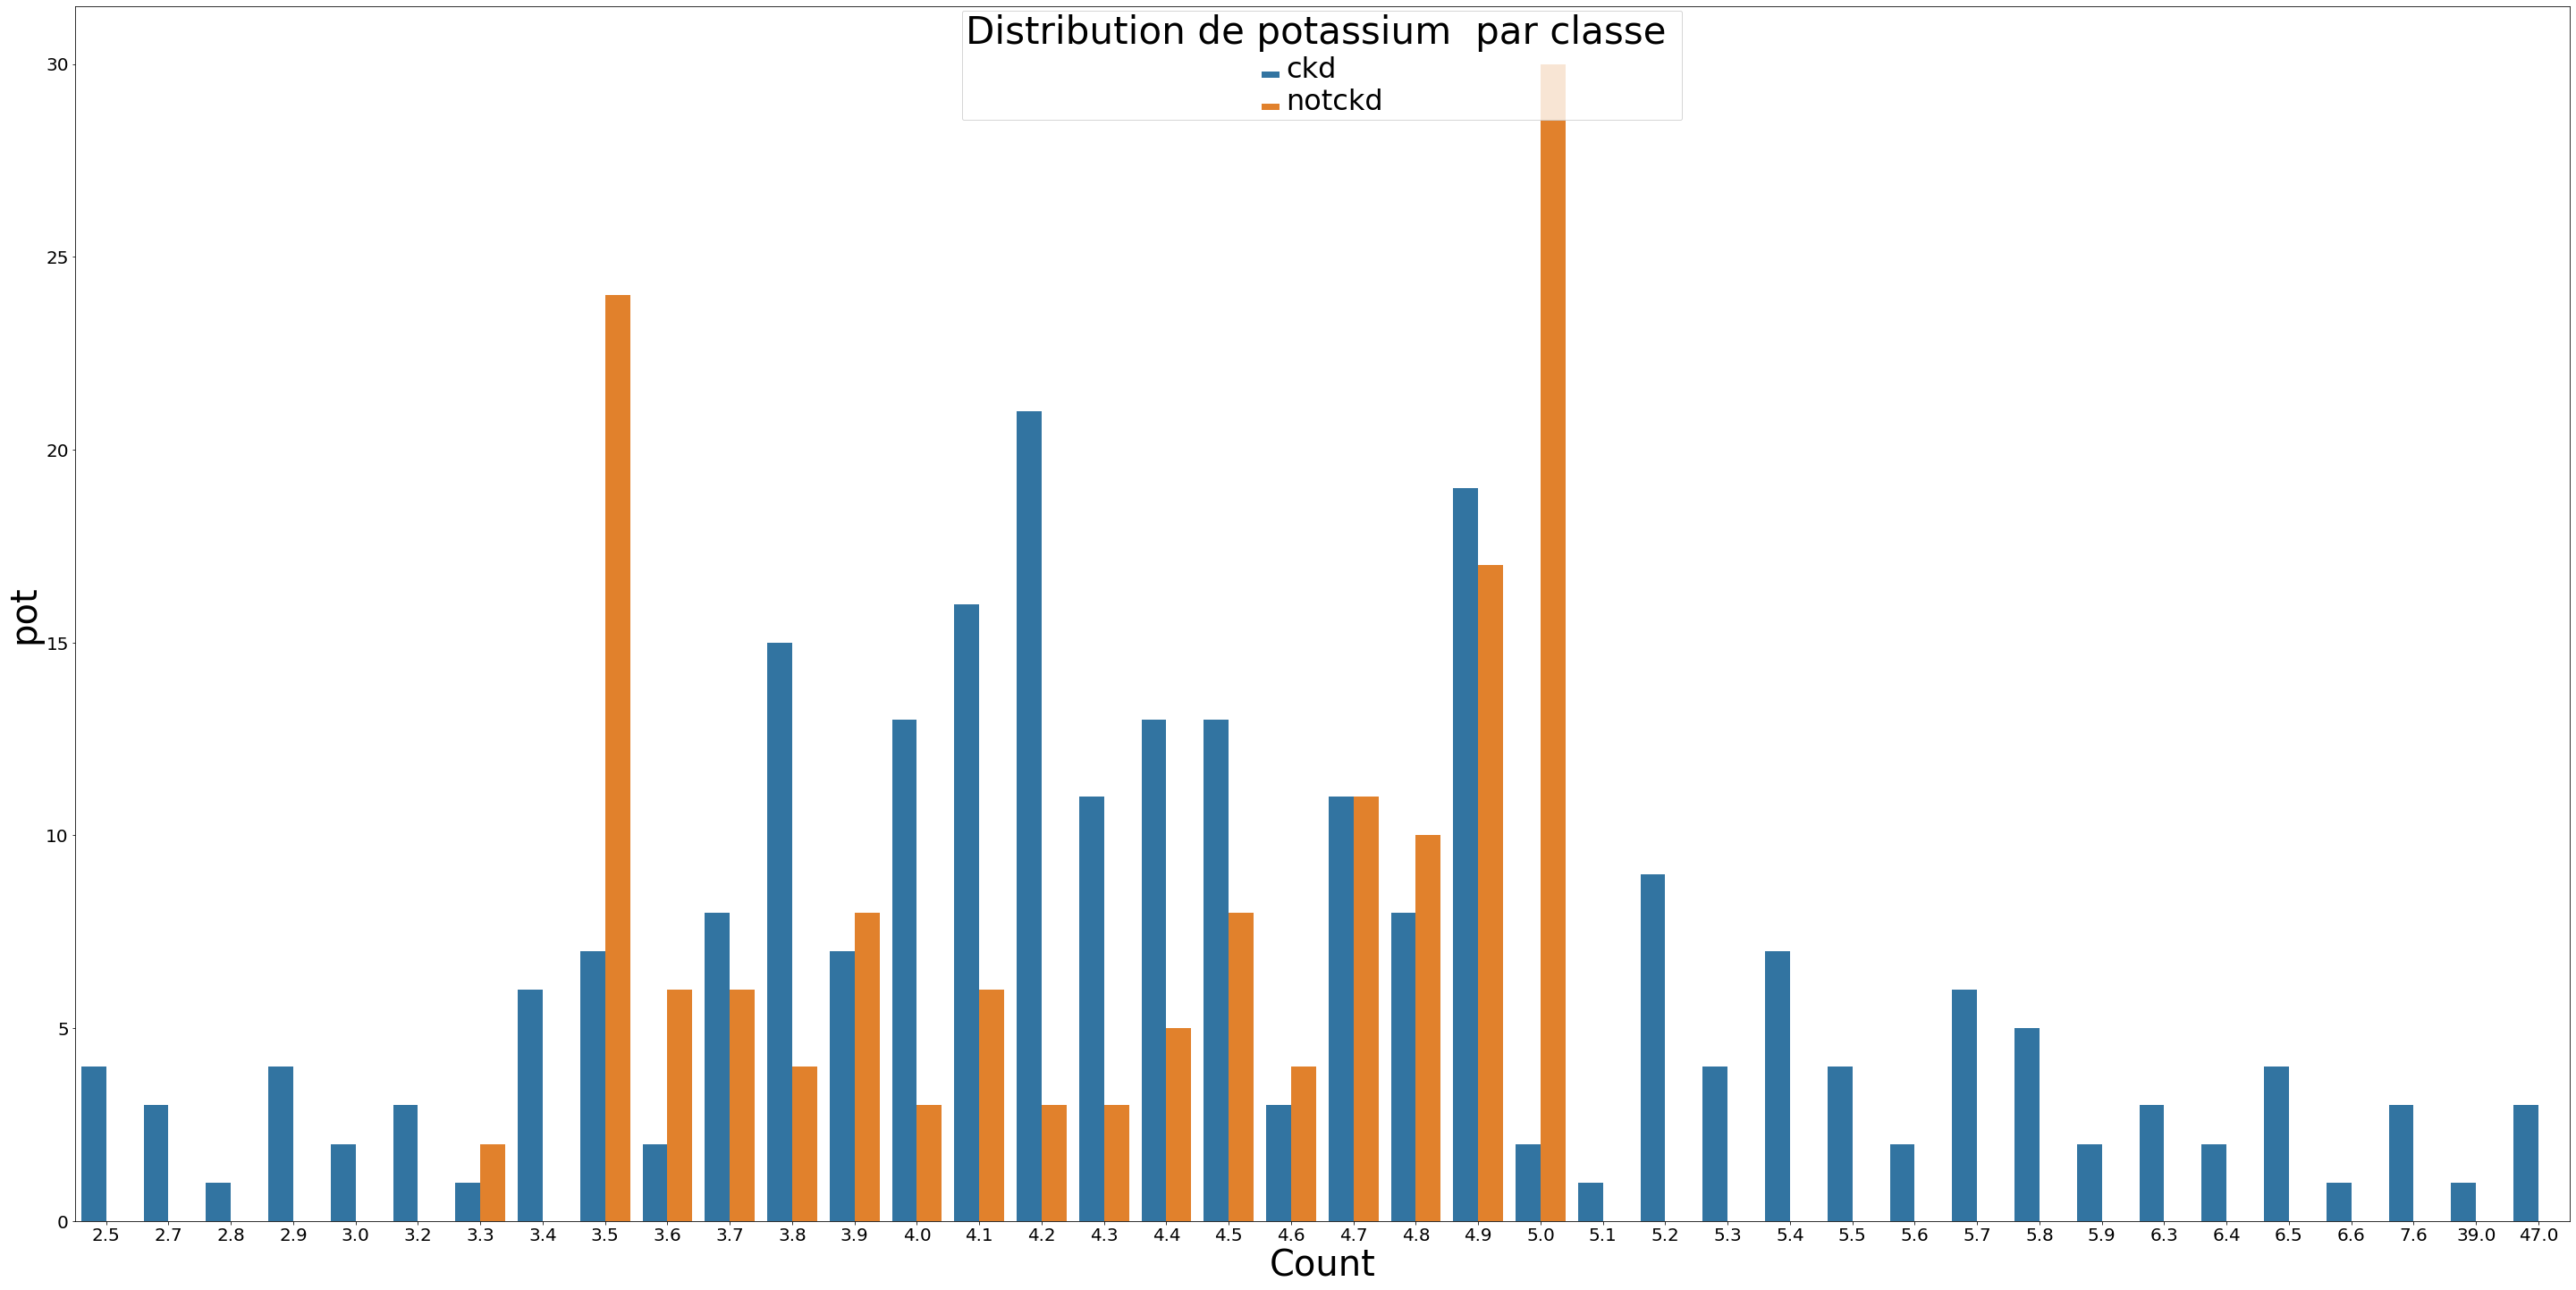

In [177]:
currentVariable='pot'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de potassium  par classe ",currentVariable)

In [178]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

pot     count
pot    1.000000 -0.197531
count -0.197531  1.000000

comme la variable précédente, la corrélation est assez faible, le graphique le montre aussi 

In [179]:
PlottingFunctions.violin(CKD_dataframe, currentVariable)

Too few CKD patients who have a potassium value greater than 10 to draw a conclusion that there is a correlation between these two variables. Despite the initial hypothesis drawn from bibliographic research.

> Conclusion : No Correlation 🔻

### Correlation between Hemoglobin (hemo) and CKD patients (+)



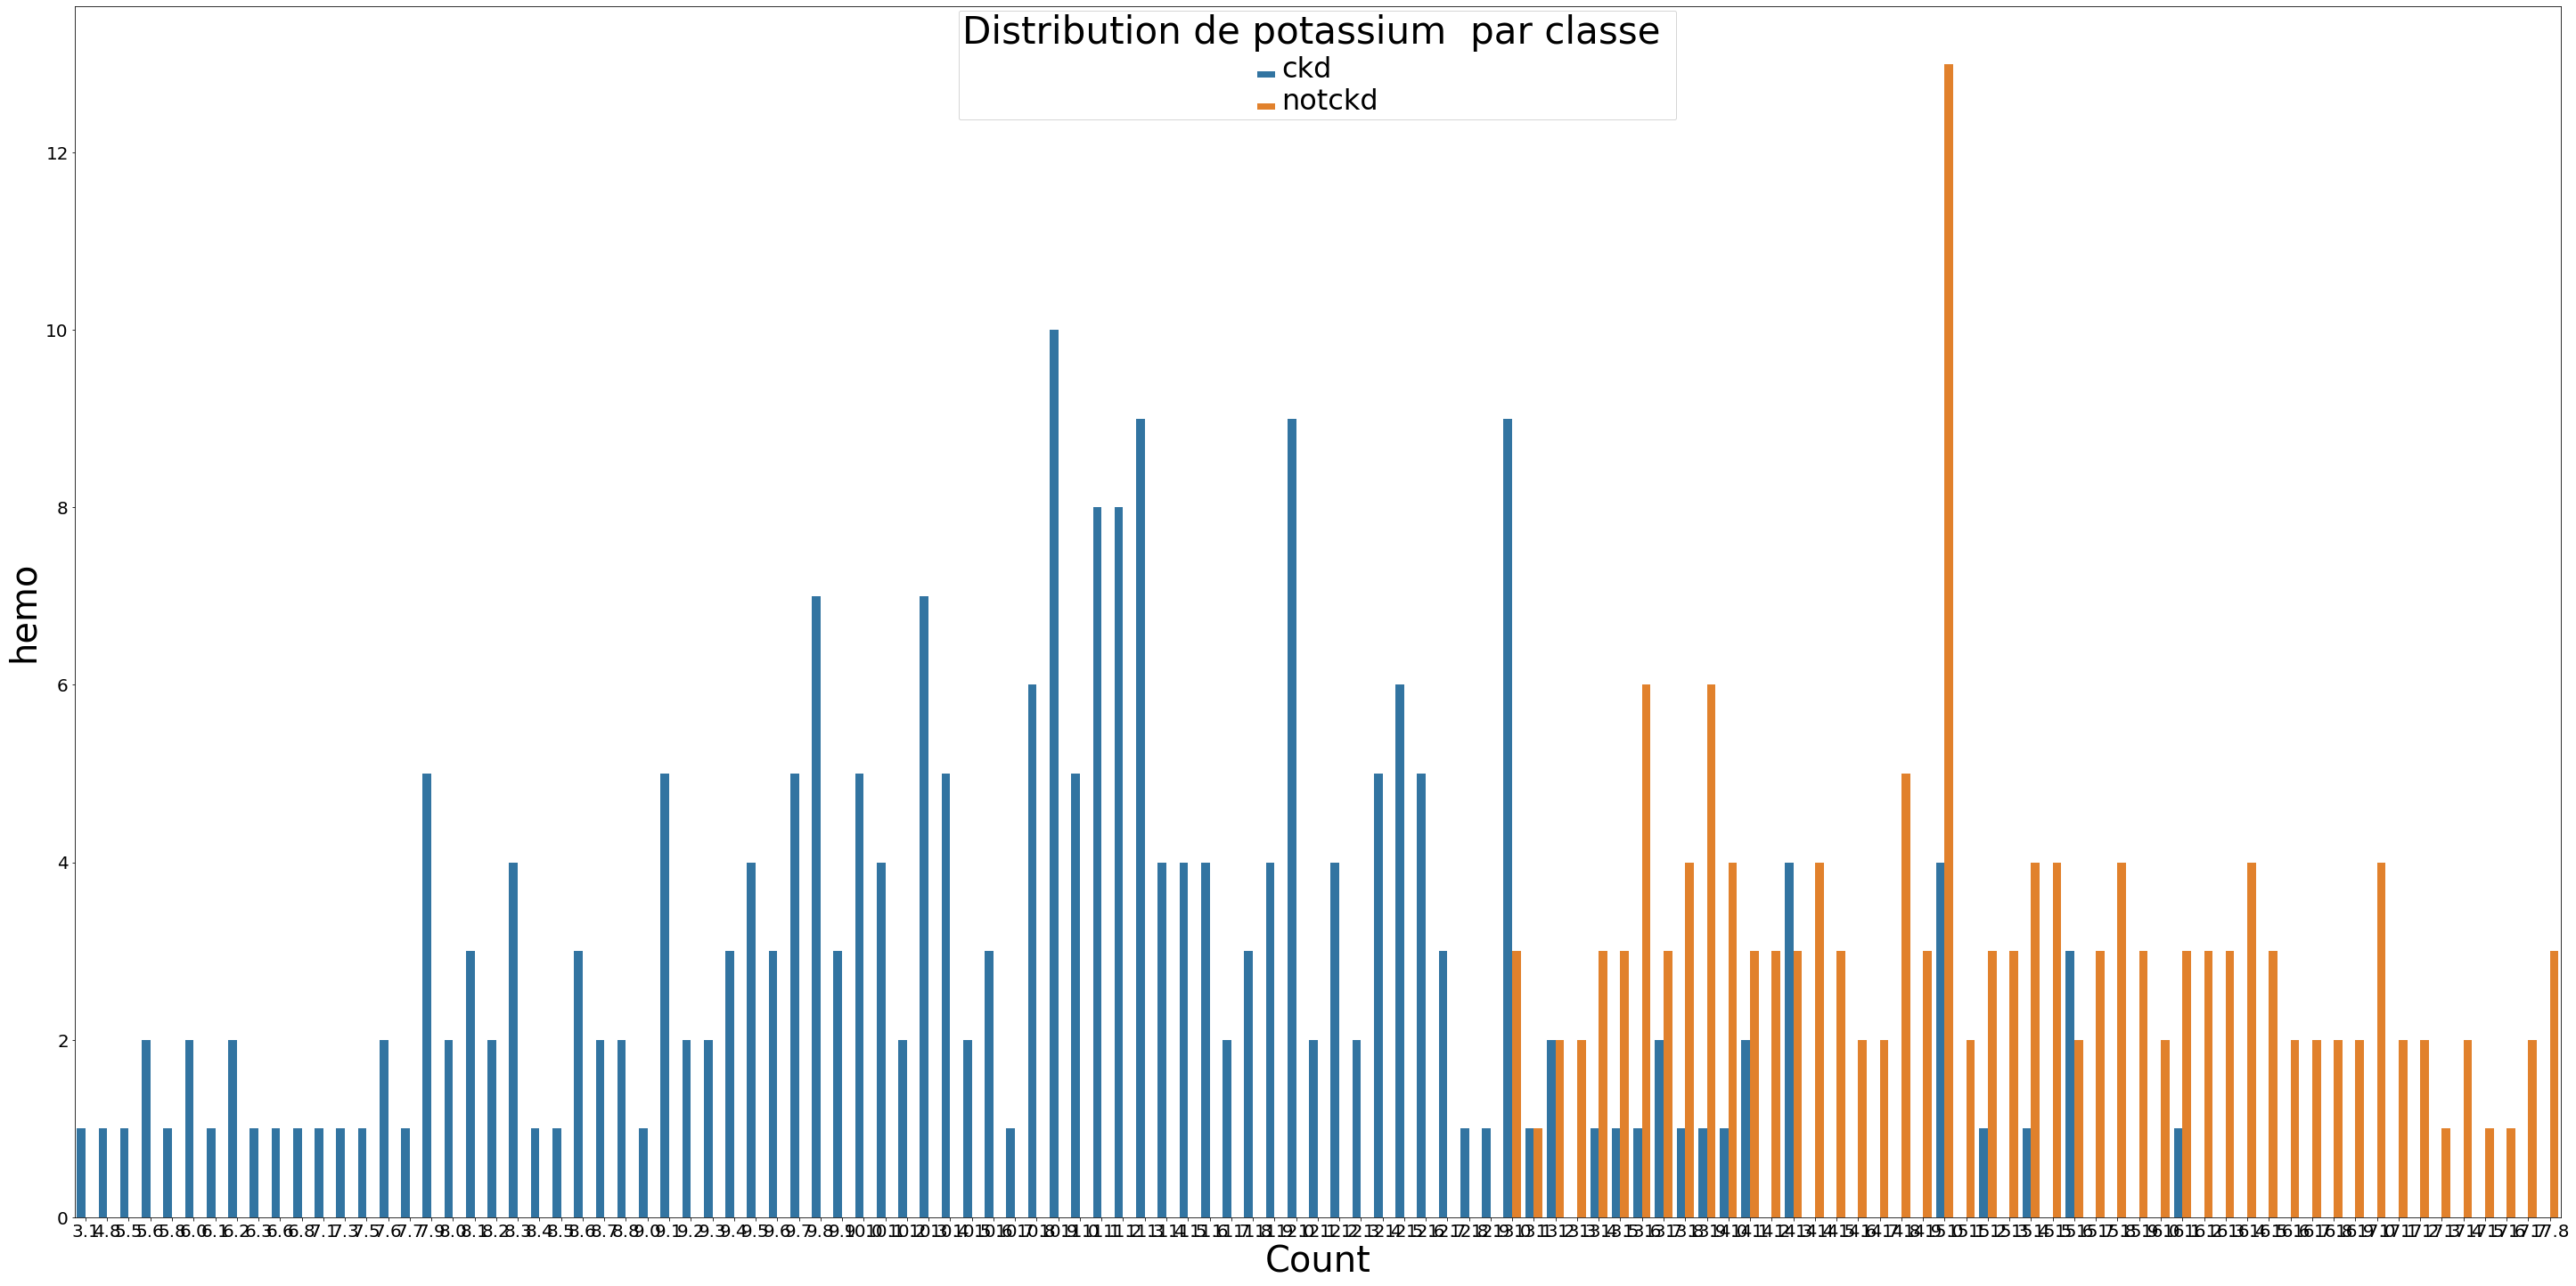

In [180]:
currentVariable='hemo'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de potassium  par classe ",currentVariable)

In [181]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

hemo     count
hemo   1.000000  0.177123
count  0.177123  1.000000

la corrélation est vraiment faible, toutefois, le graphique montre les choses autrement, nous allons faire encore pus d'investigation pour vérifier

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

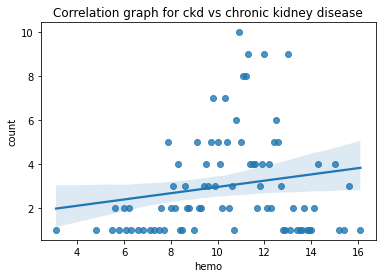

In [182]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

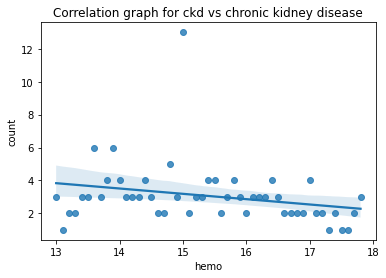

In [183]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'notckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

Indeed, the distribution of patients with CKD and without CKD is not visible in this graph

In [184]:
PlottingFunctions.violin(CKD_dataframe,'hemo')

As of the information extracted from this last violin graphic, I am very tempted to say that there is a correlation between these two variables.

> Conclusion : Correlation ✅ 

### Correlation between packed Cell Volume (pcv) and CKD patients (+)


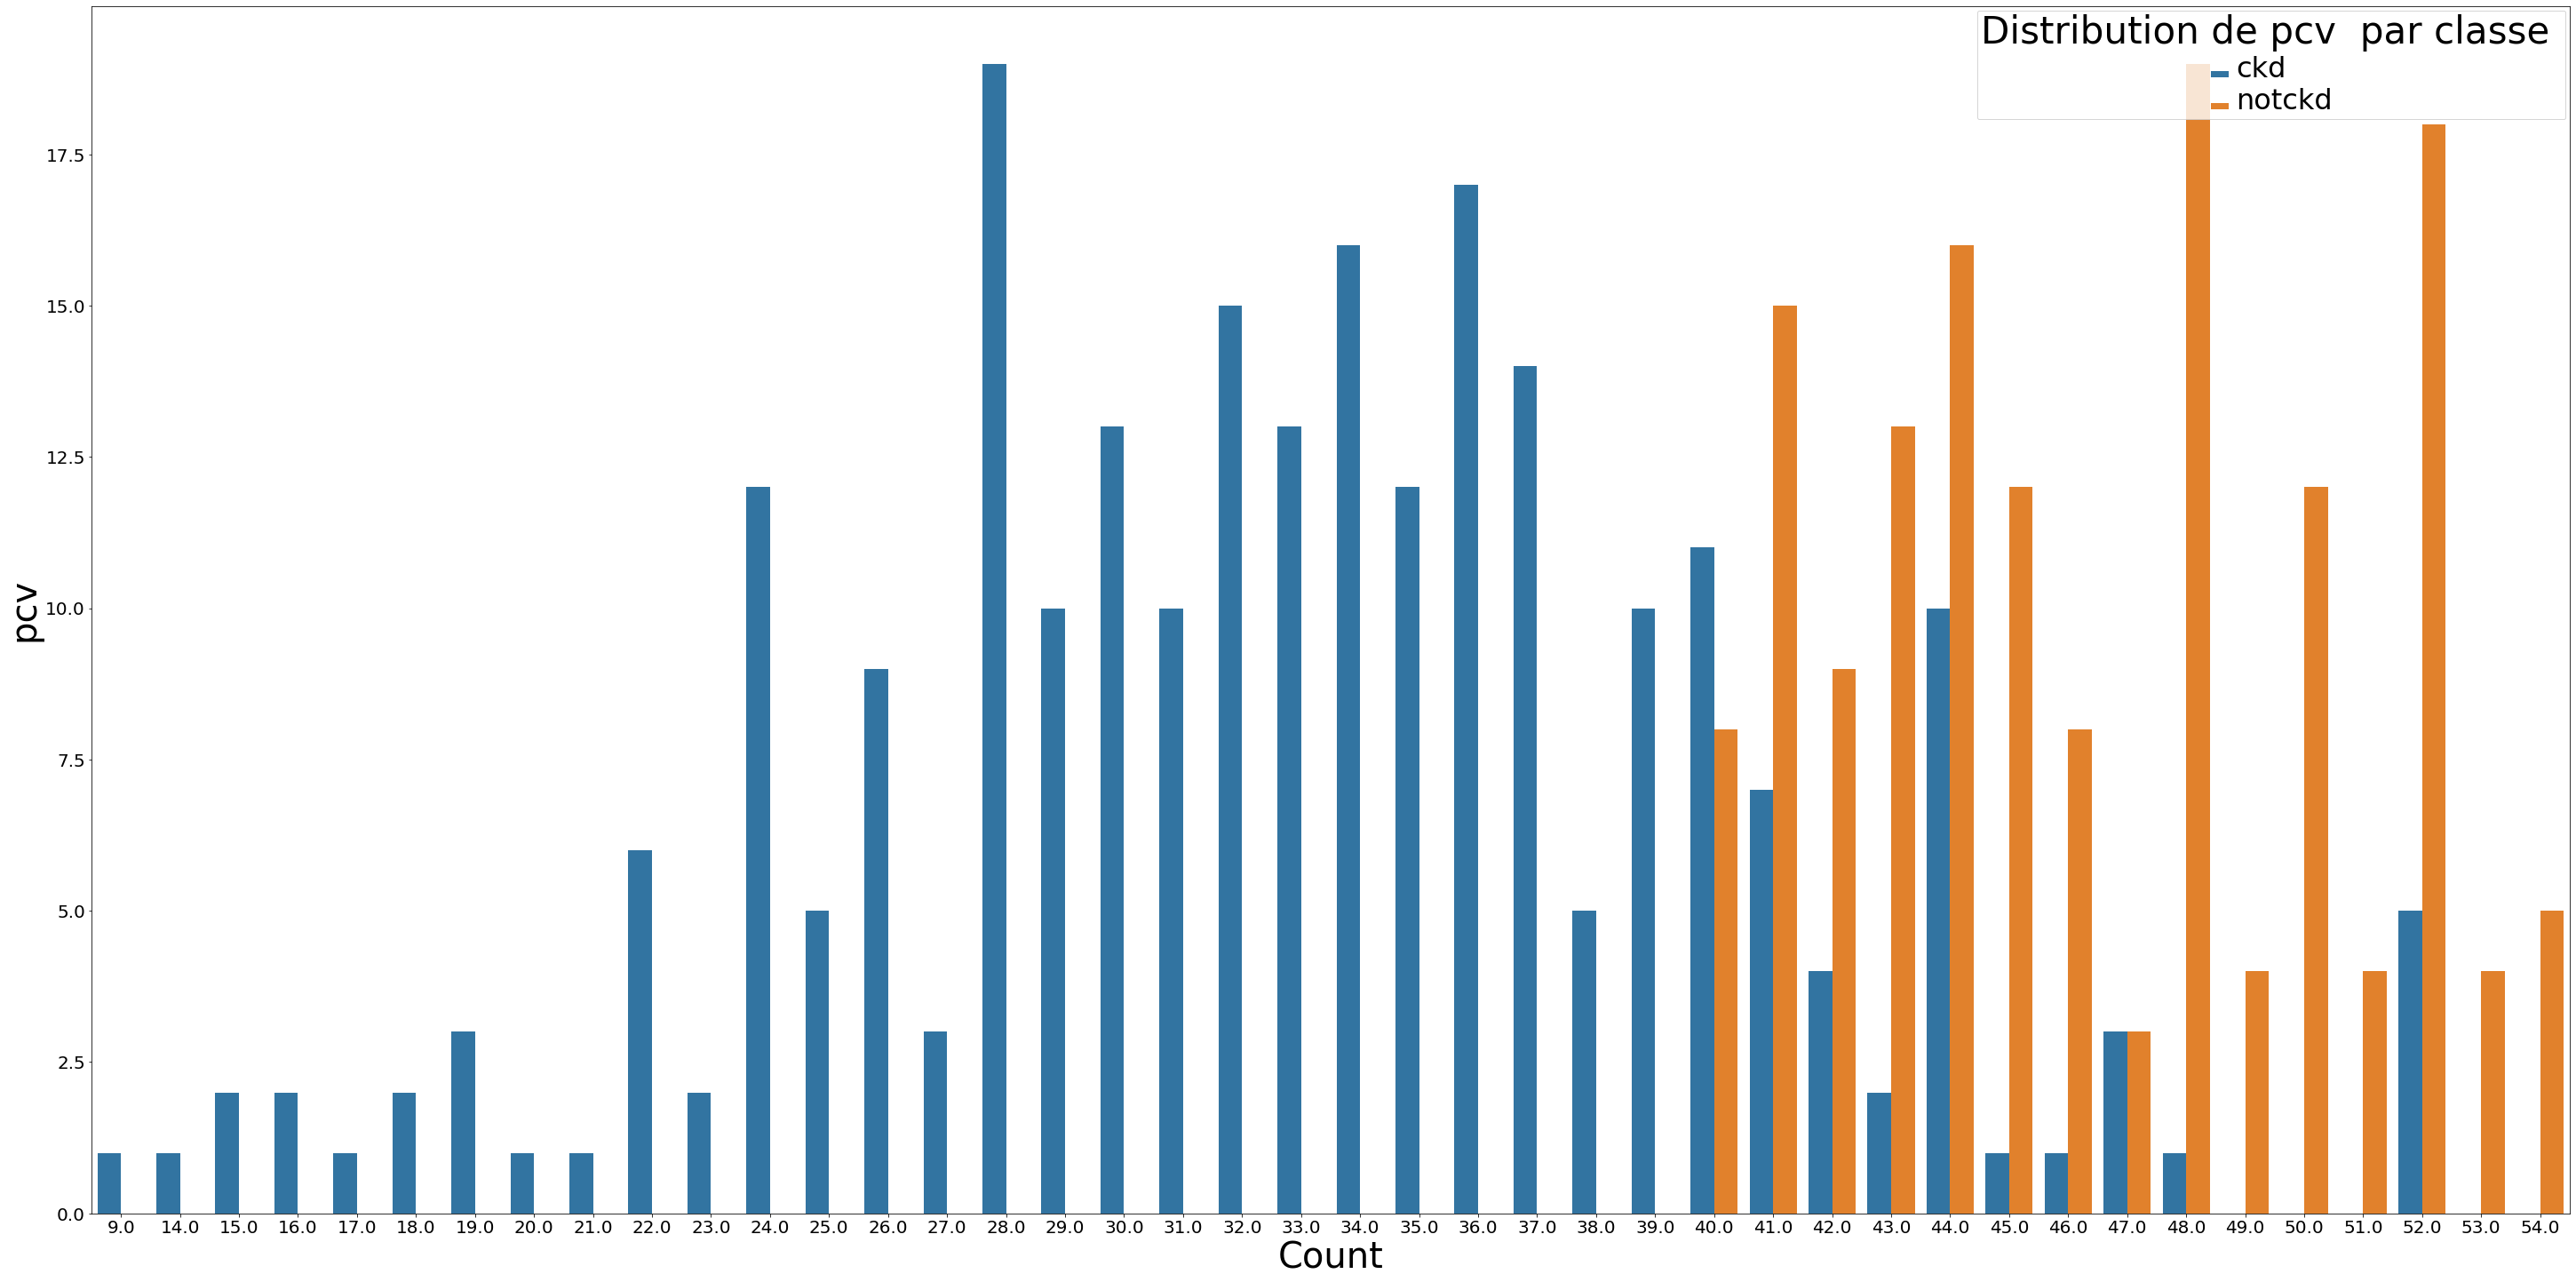

In [185]:
currentVariable='pcv'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de pcv  par classe ",currentVariable)

In [186]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

pcv     count
pcv    1.000000  0.209313
count  0.209313  1.000000

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

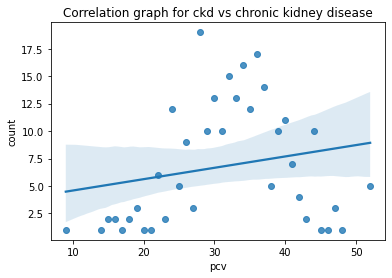

In [187]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

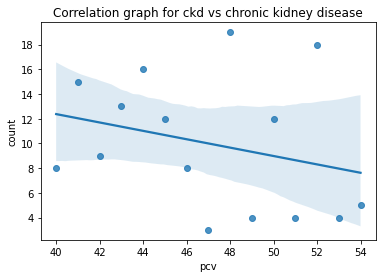

In [188]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'notckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

After seeing the three graphics and the correlation calculation, it is clear that the correlation between these two variables is not very strong, or even non-existent. Let's see the violin chart for a better visualization

In [190]:
PlottingFunctions.violin(CKD_dataframe,'pcv')

This last graph shows that there is a correlation between these two variables especially when the pcv is lower than 40. The fact that the regplot did not necessarily show it is that the number of patients who have these values ​​is not enough important to degrade the right. I would consider this correlation.

> Conclusion : Correlation ✅ 

### Correlation between White blood cell count (wbcc) and CKD patients (-)



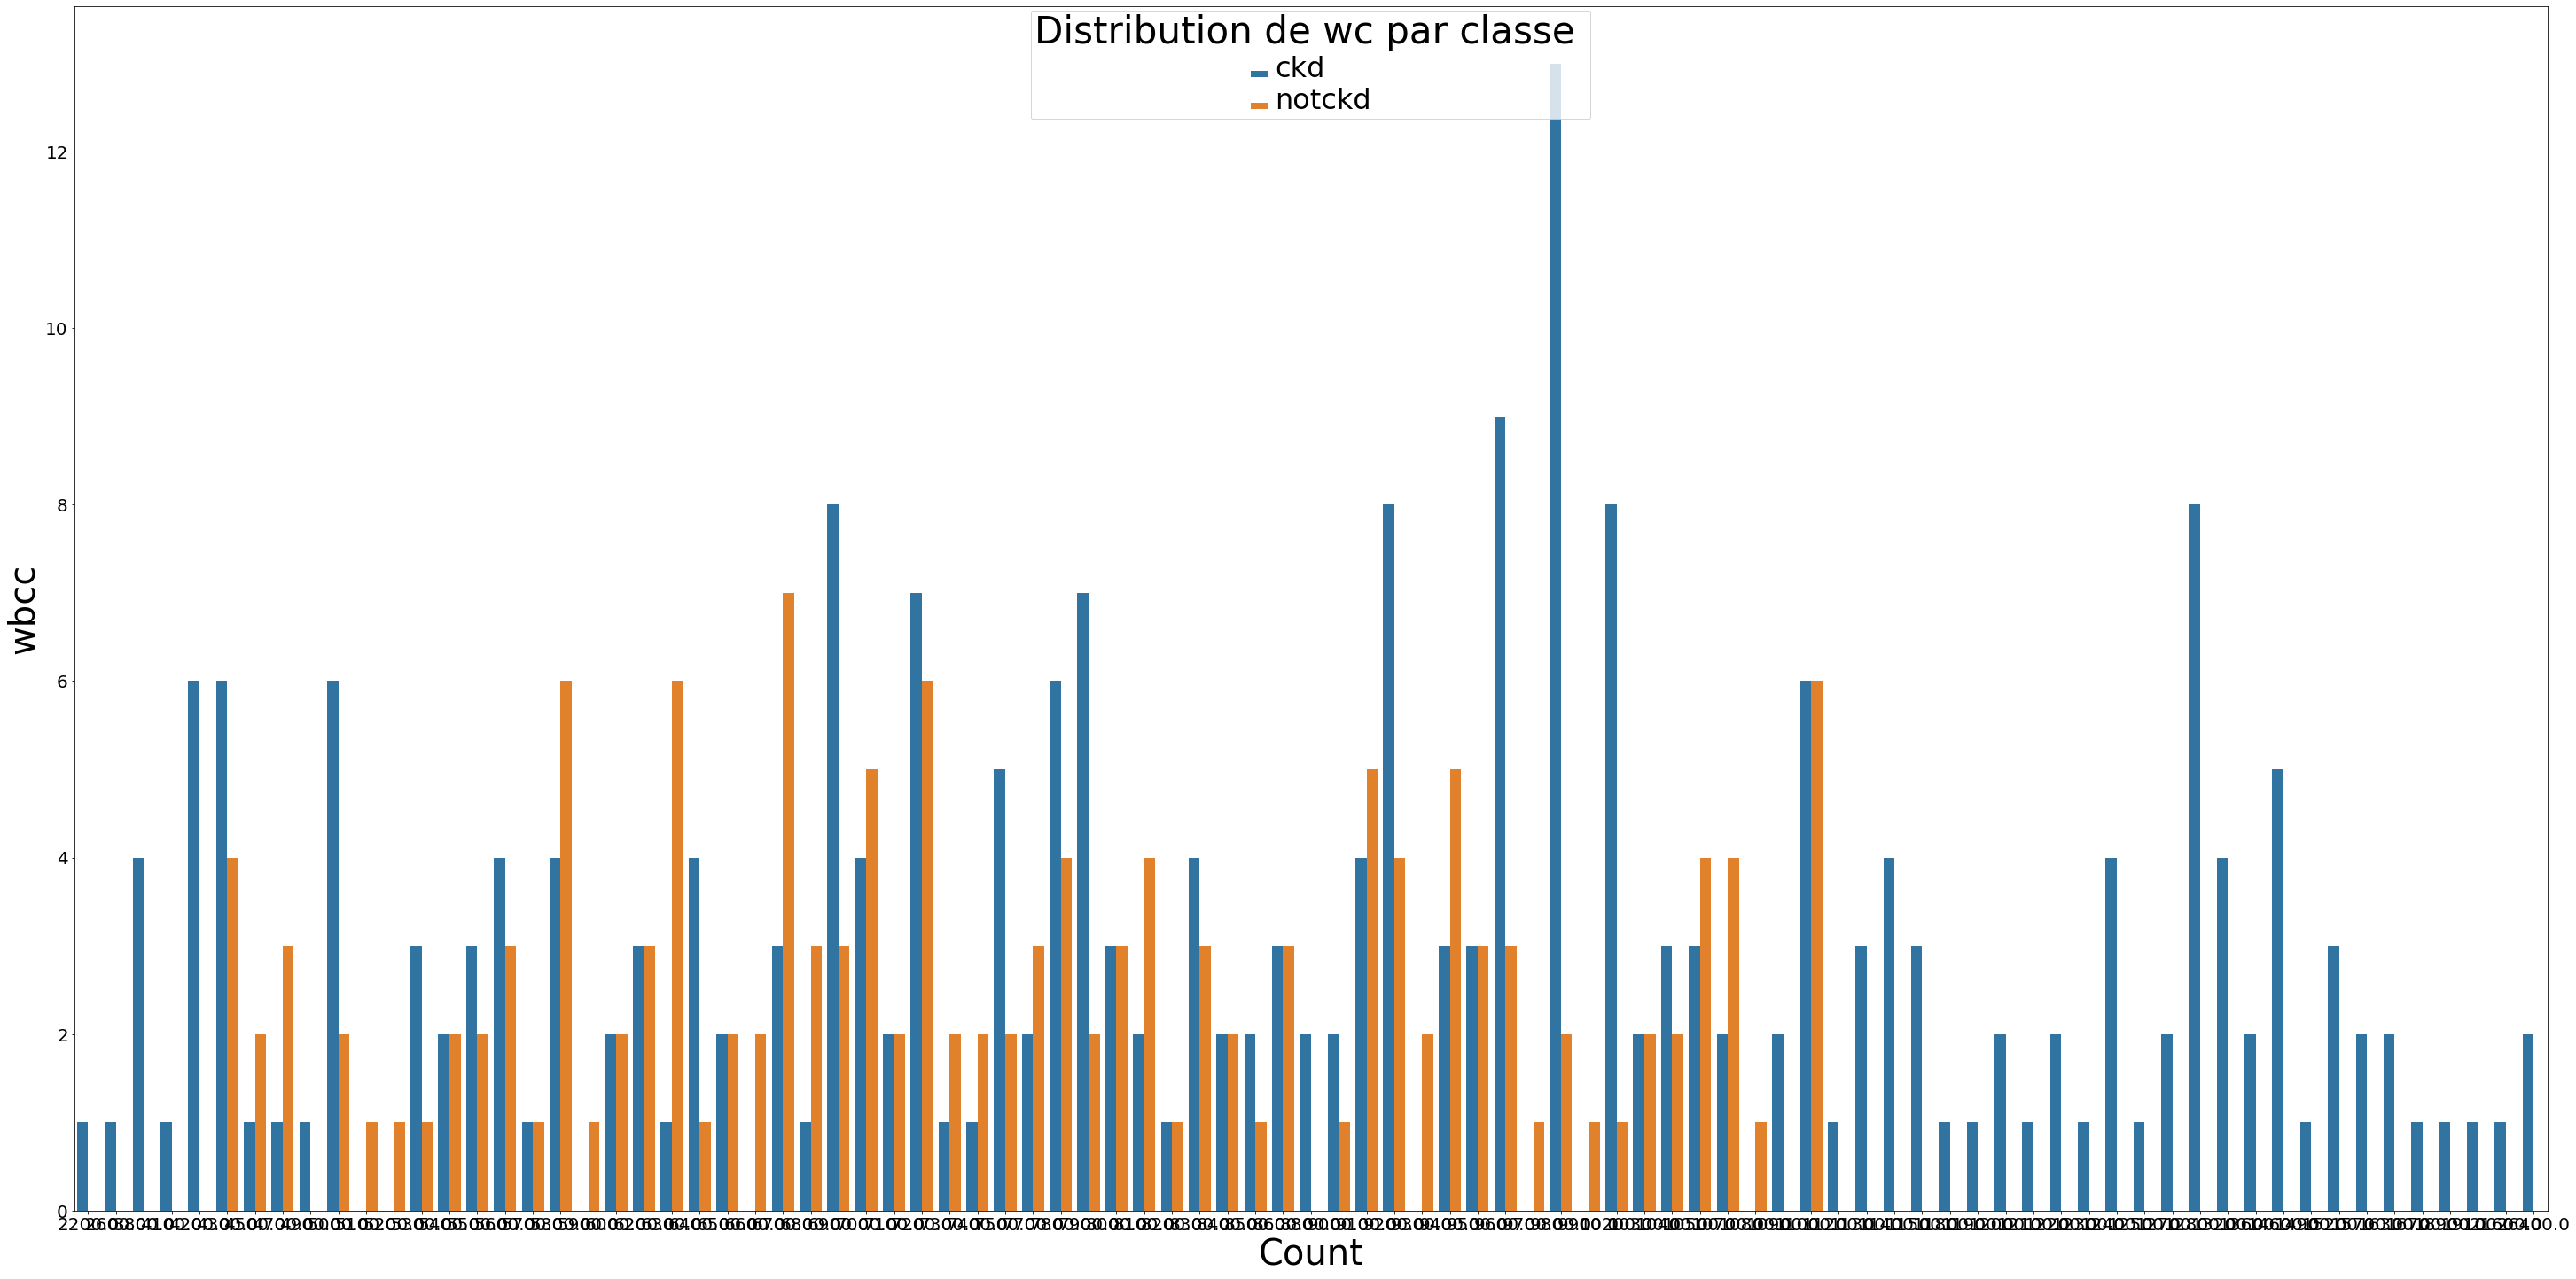

In [191]:
currentVariable='wbcc'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de wc par classe ",currentVariable)

In [192]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

wbcc     count
wbcc   1.000000 -0.126643
count -0.126643  1.000000

In [193]:
PlottingFunctions.violin(CKD_dataframe,'wbcc')

Very little correlation for this attribute and the CKD patients. I will not consider the attribute to be a risk factor of CKD.

### Correlation between red blood cell count (rbcc) and CKD patients (-)




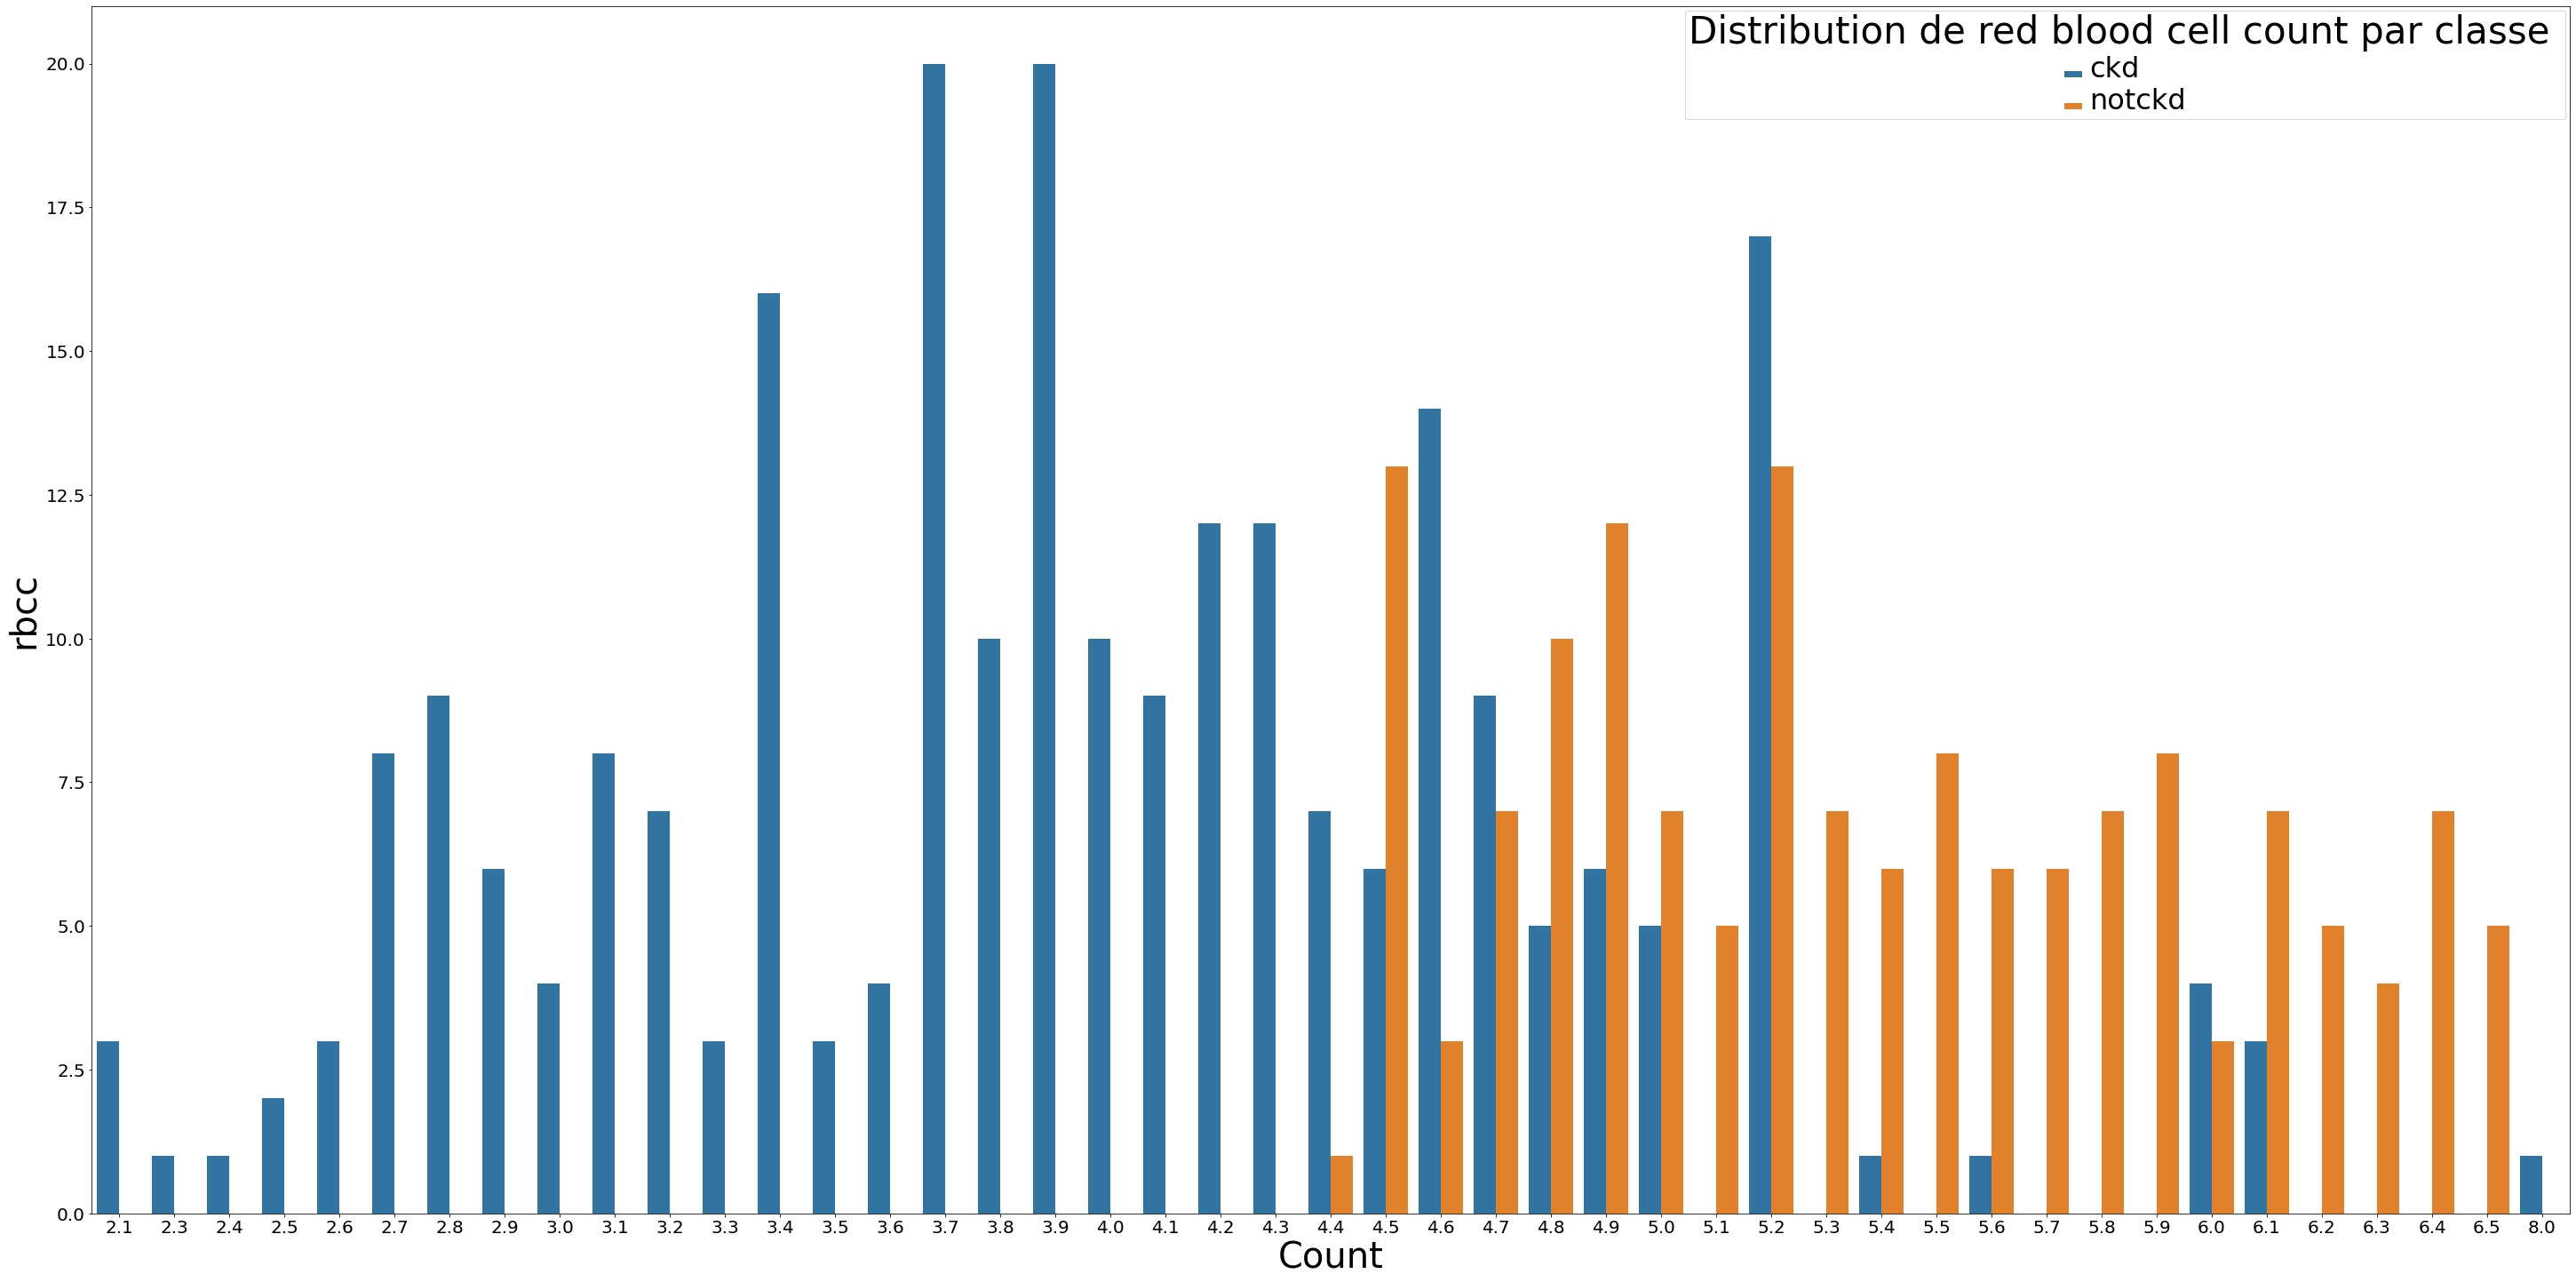

In [194]:
currentVariable='rbcc'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de red blood cell count par classe ",currentVariable)

In [195]:
AnalyseFunctions.CorrelationBetweenVariables(CKD_dataframe,'class',currentVariable)

rbcc     count
rbcc   1.000000 -0.027448
count -0.027448  1.000000

In [196]:
PlottingFunctions.violin(CKD_dataframe,'rbcc')

A very limited correlation, similair to the previous one. I'm in fact surprised by the fact that rbc is a very correlated variable with the class, I would have thought that the count of this variable will have a correlation. Let's investigate a bit more

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

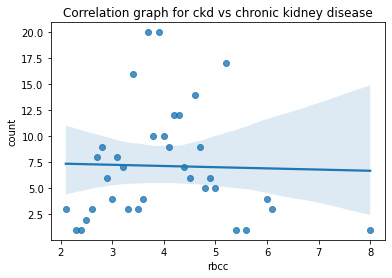

In [197]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'ckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

Text(0.5, 1.0, 'Correlation graph for ckd vs chronic kidney disease')

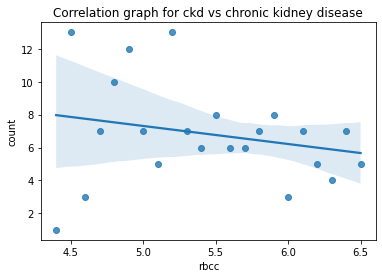

In [198]:
corr_y=CKD_dataframe[CKD_dataframe['class'] == 'notckd'].groupby([currentVariable]).size().reset_index(name = 'count')
sns.regplot(data = corr_y, x = currentVariable, y = 'count').set_title("Correlation graph for ckd vs chronic kidney disease")

These two last graphs show that the correlation is almost non-existent because the straight line has no tangent.

> Conclusion : No Correlation 🔻

### Correlation between hypertension (htn) and CKD patients (+)



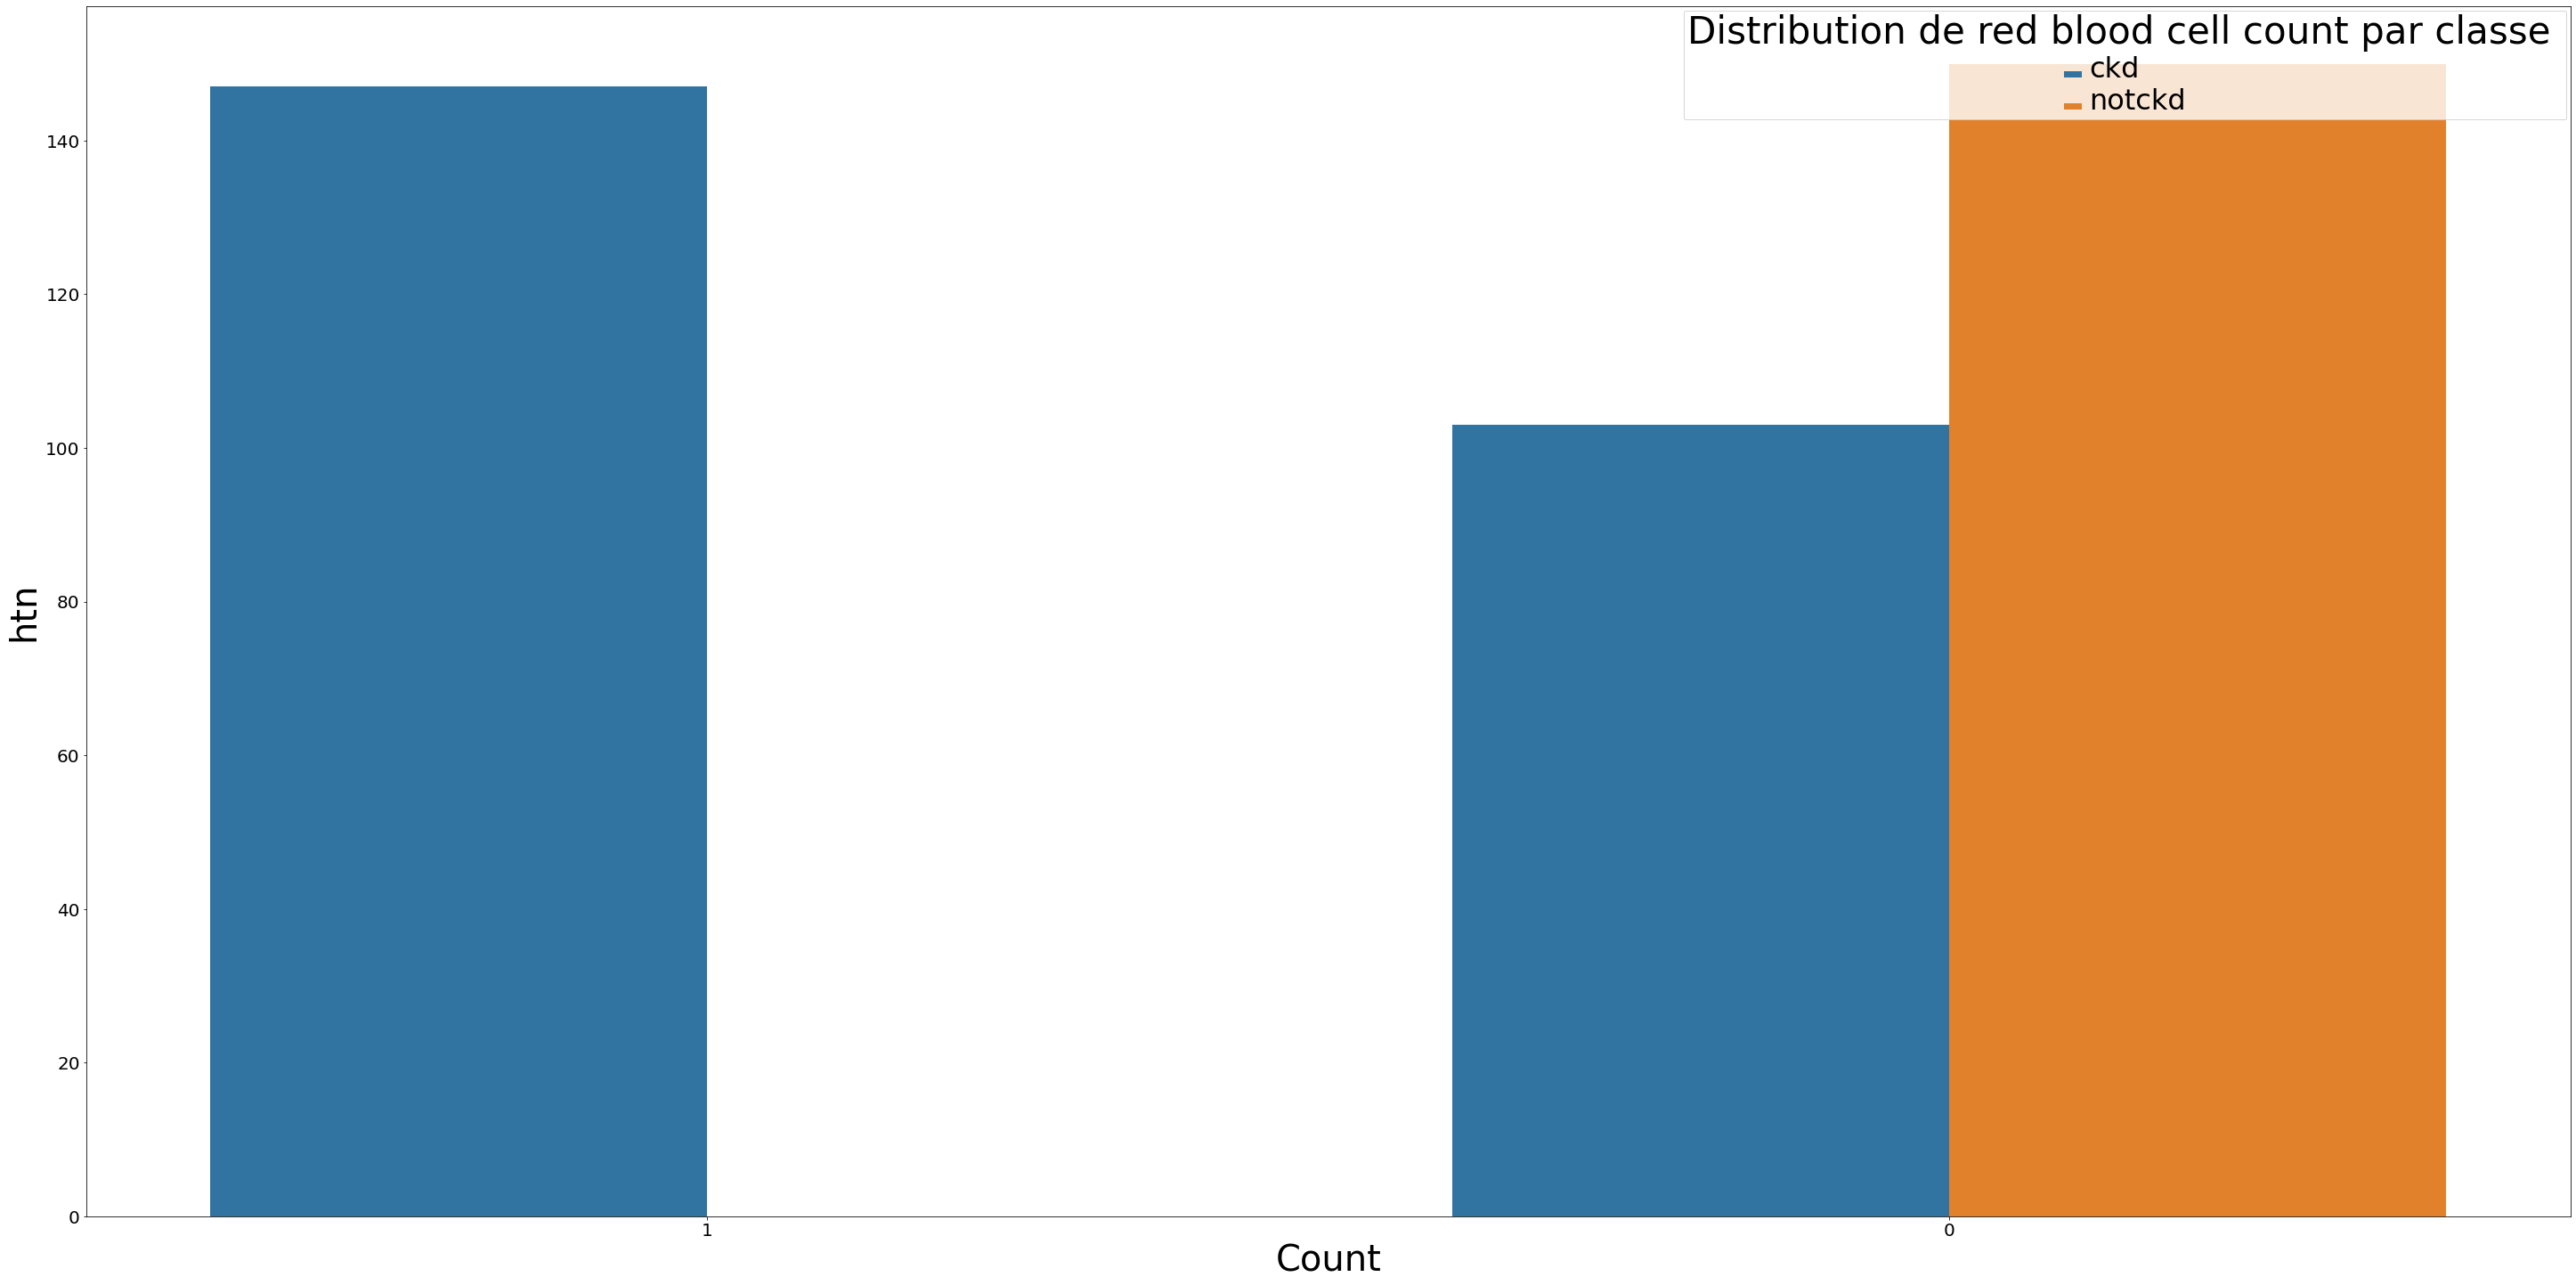

In [199]:
currentVariable='htn'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de red blood cell count par classe ",currentVariable)

Etant une valeur nominal, nous utilisons une approche statistique (p-value)

In [200]:
cont = pd.crosstab(CKD_dataframe["htn"],CKD_dataframe["class"])
scipy.stats.barnard_exact(cont)

BarnardExactResult(statistic=-11.808752699426199, pvalue=5.705070568496231e-33)

Here, as it is a nominal value, we used a barnard_exact test to extract the p-value. There is a relationship between ckd and hypertension.

We can push our investigation further by showing the violin graph

In [201]:
PlottingFunctions.violin(CKD_dataframe,'htn')


This clearly shows us that there is a correlation between hypertension and the fact that the patient is CKD. A confirmed starting hypothesis!

> Conclusion : Correlation ✅ 

###Correlation between diabetes mellitus (dm) and CKD patients (+)


Being a nominal value, a similar approach as during the previous variable

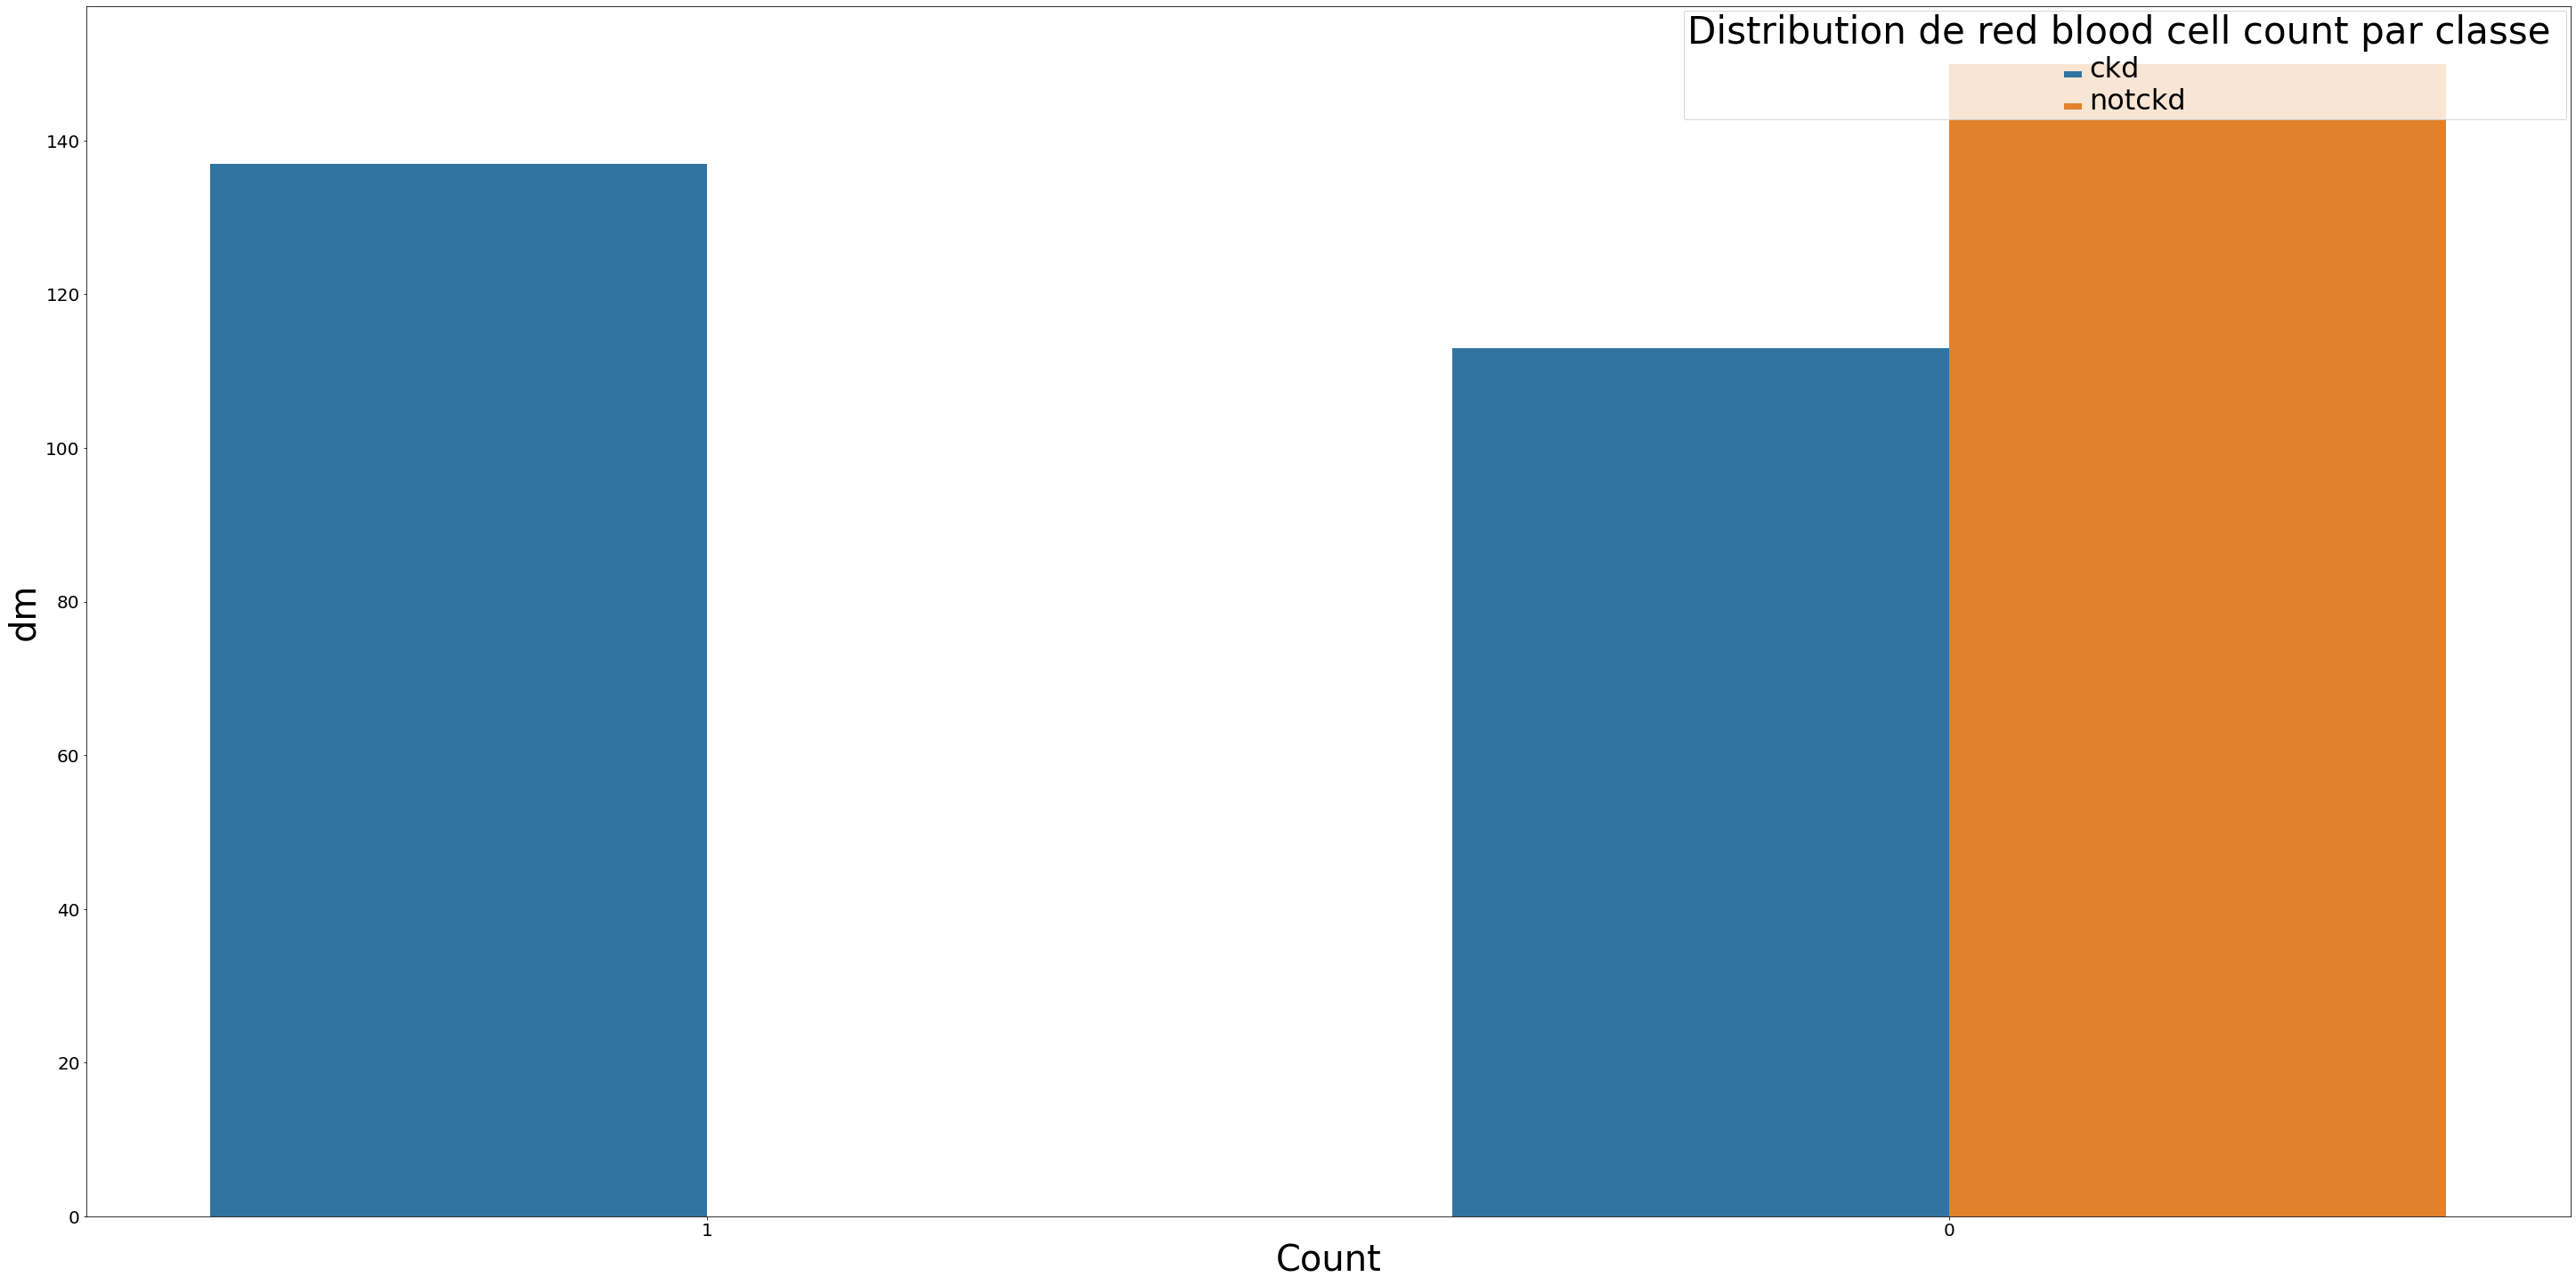

In [202]:
currentVariable='dm'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de red blood cell count par classe ",currentVariable)

In [203]:
cont = pd.crosstab(CKD_dataframe["dm"],CKD_dataframe["class"])
scipy.stats.barnard_exact(cont)

BarnardExactResult(statistic=-11.18119007113483, pvalue=1.023555022813908e-29)

It is clear from barnard's test and from the value returned by the p-value that there is a relationship between CKD and having diabetes mellitus.

> Conclusion : Correlation ✅ 

### Correlation between coronary artery disease (cad) and CKD patients (-)


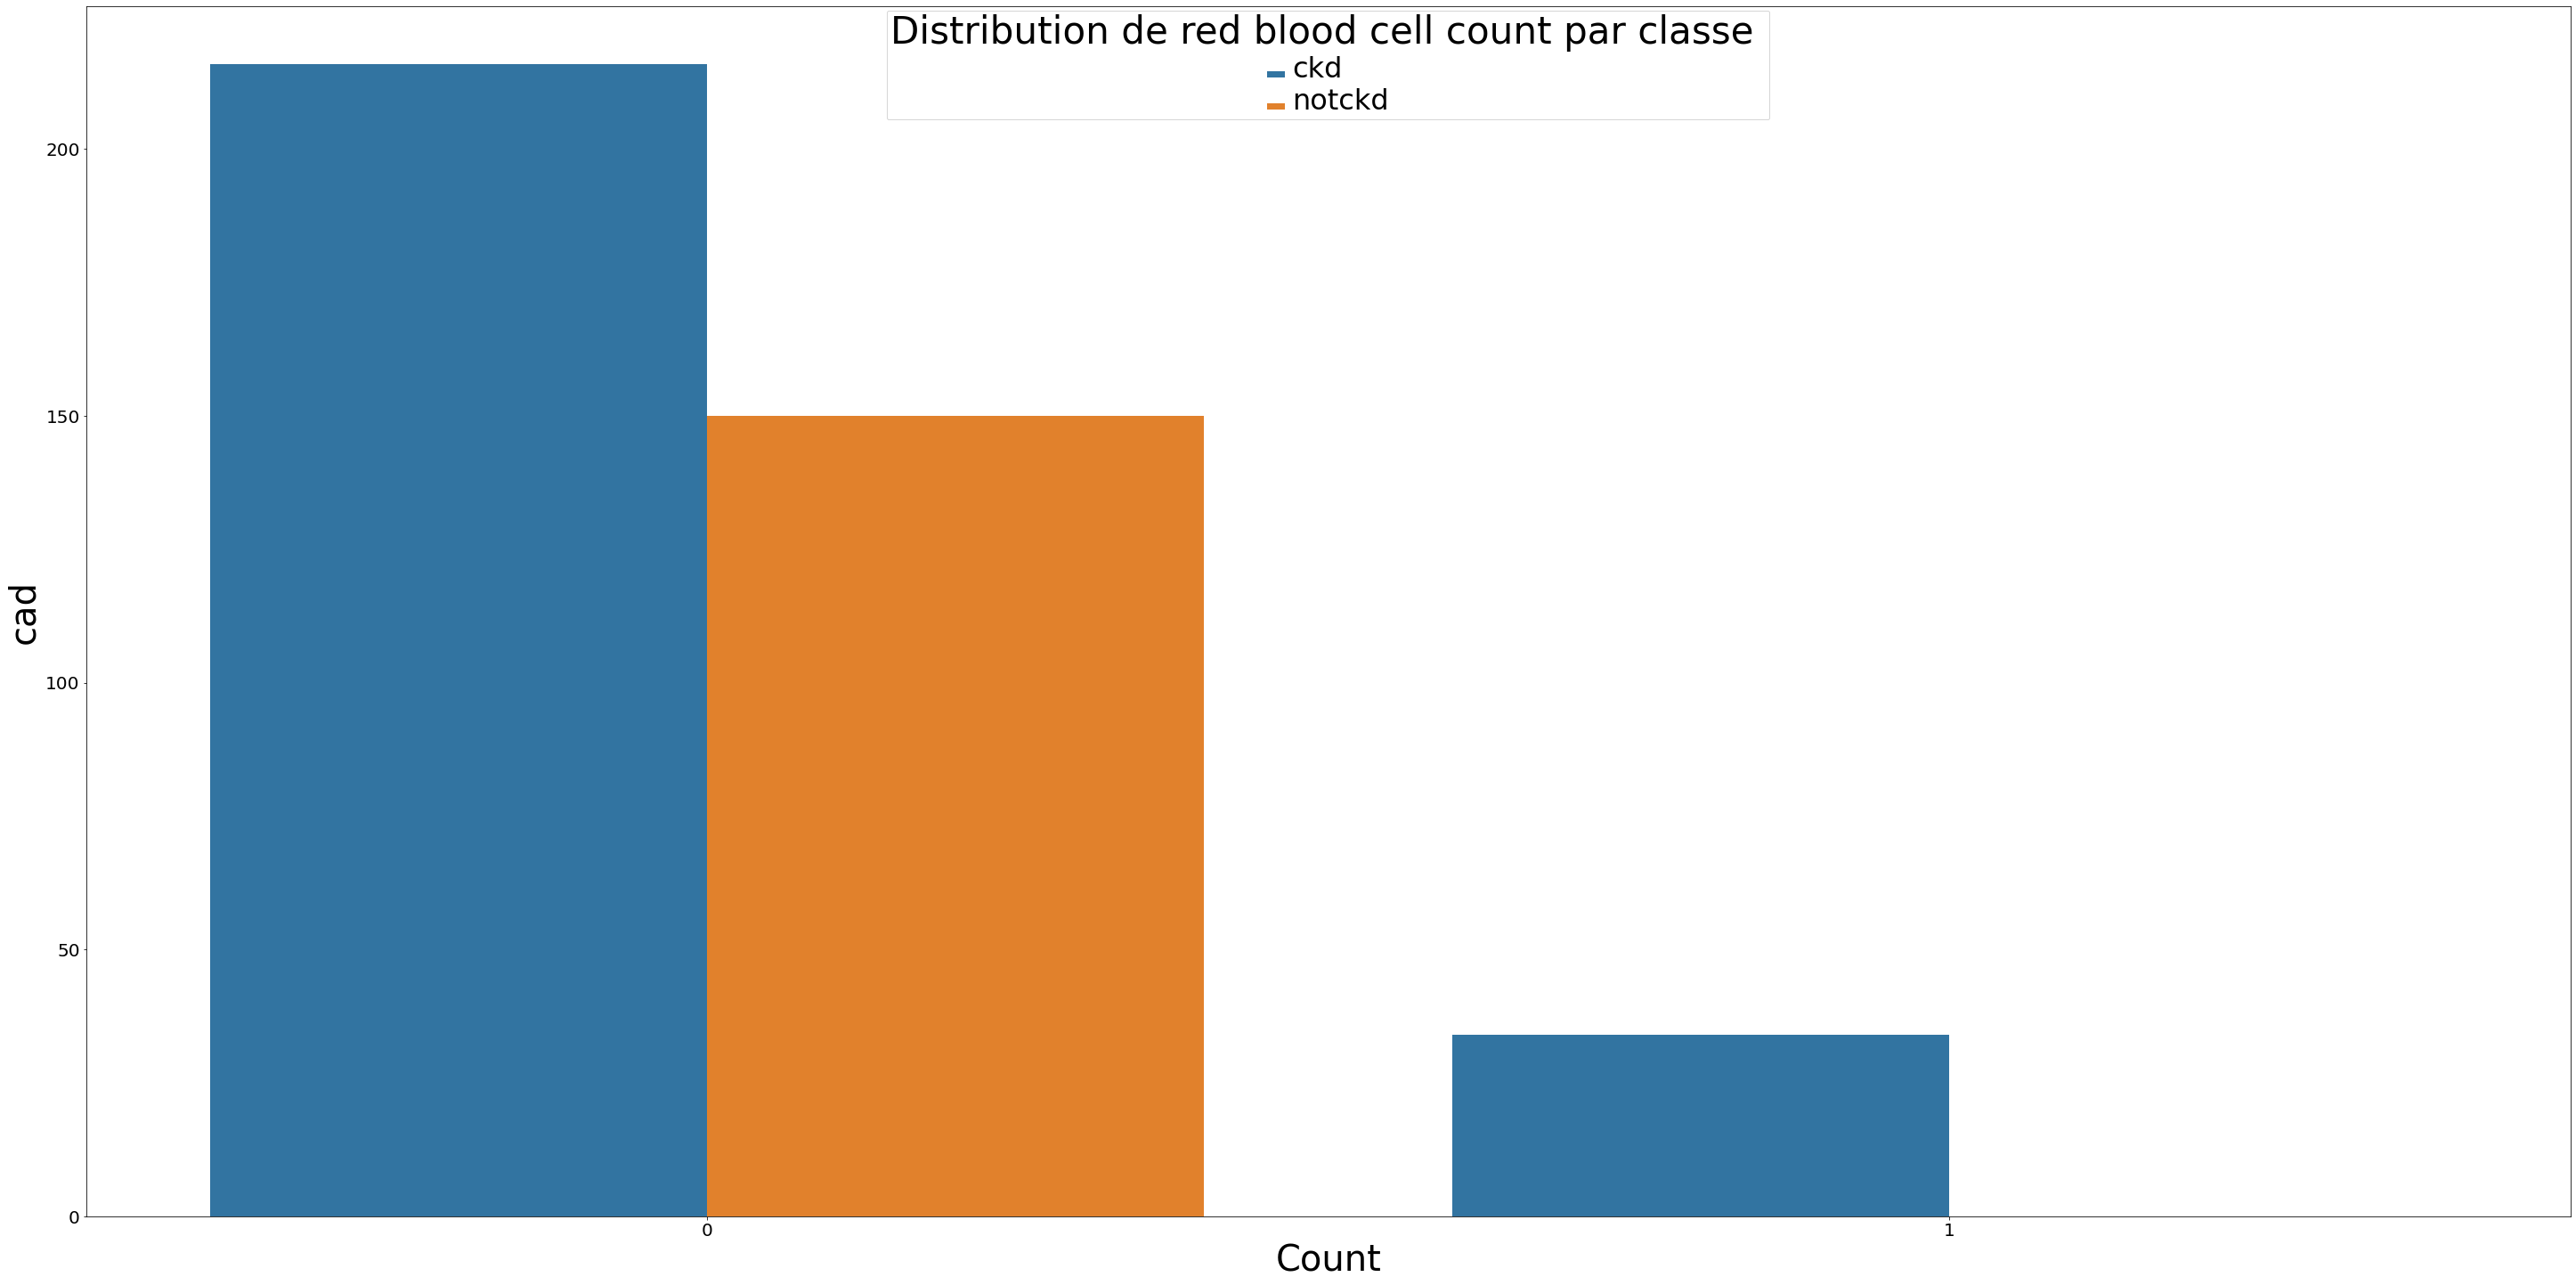

In [204]:
currentVariable='cad'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de red blood cell count par classe ",currentVariable)

In [205]:
cont = pd.crosstab(CKD_dataframe["cad"],CKD_dataframe["class"])
scipy.stats.barnard_exact(cont)

BarnardExactResult(statistic=-4.721766826857625, pvalue=2.2731533942915333e-06)

The p-value est moins que 0.05, de ce fait l'hypothèse de départ est réfutée. Ce qui montre qu'il existe une corrélation entre les patient atteint de CKD et la variable "cad". Toutefois, le fait de ne pas avoir autant de patient non CKD qui l'ont nous met dans une position délicate. Voyons le violin graphe :

In [206]:
PlottingFunctions.violin(CKD_dataframe,'cad')

Very few, too few CKD patients who have coronary artery disease are visible in this dataframe. I am leaning on the fact that the correlation between these two variables is very weak.

> Conclusion : No Correlation 🔻

### Correlation between appetite (appet) and CKD patients (-)



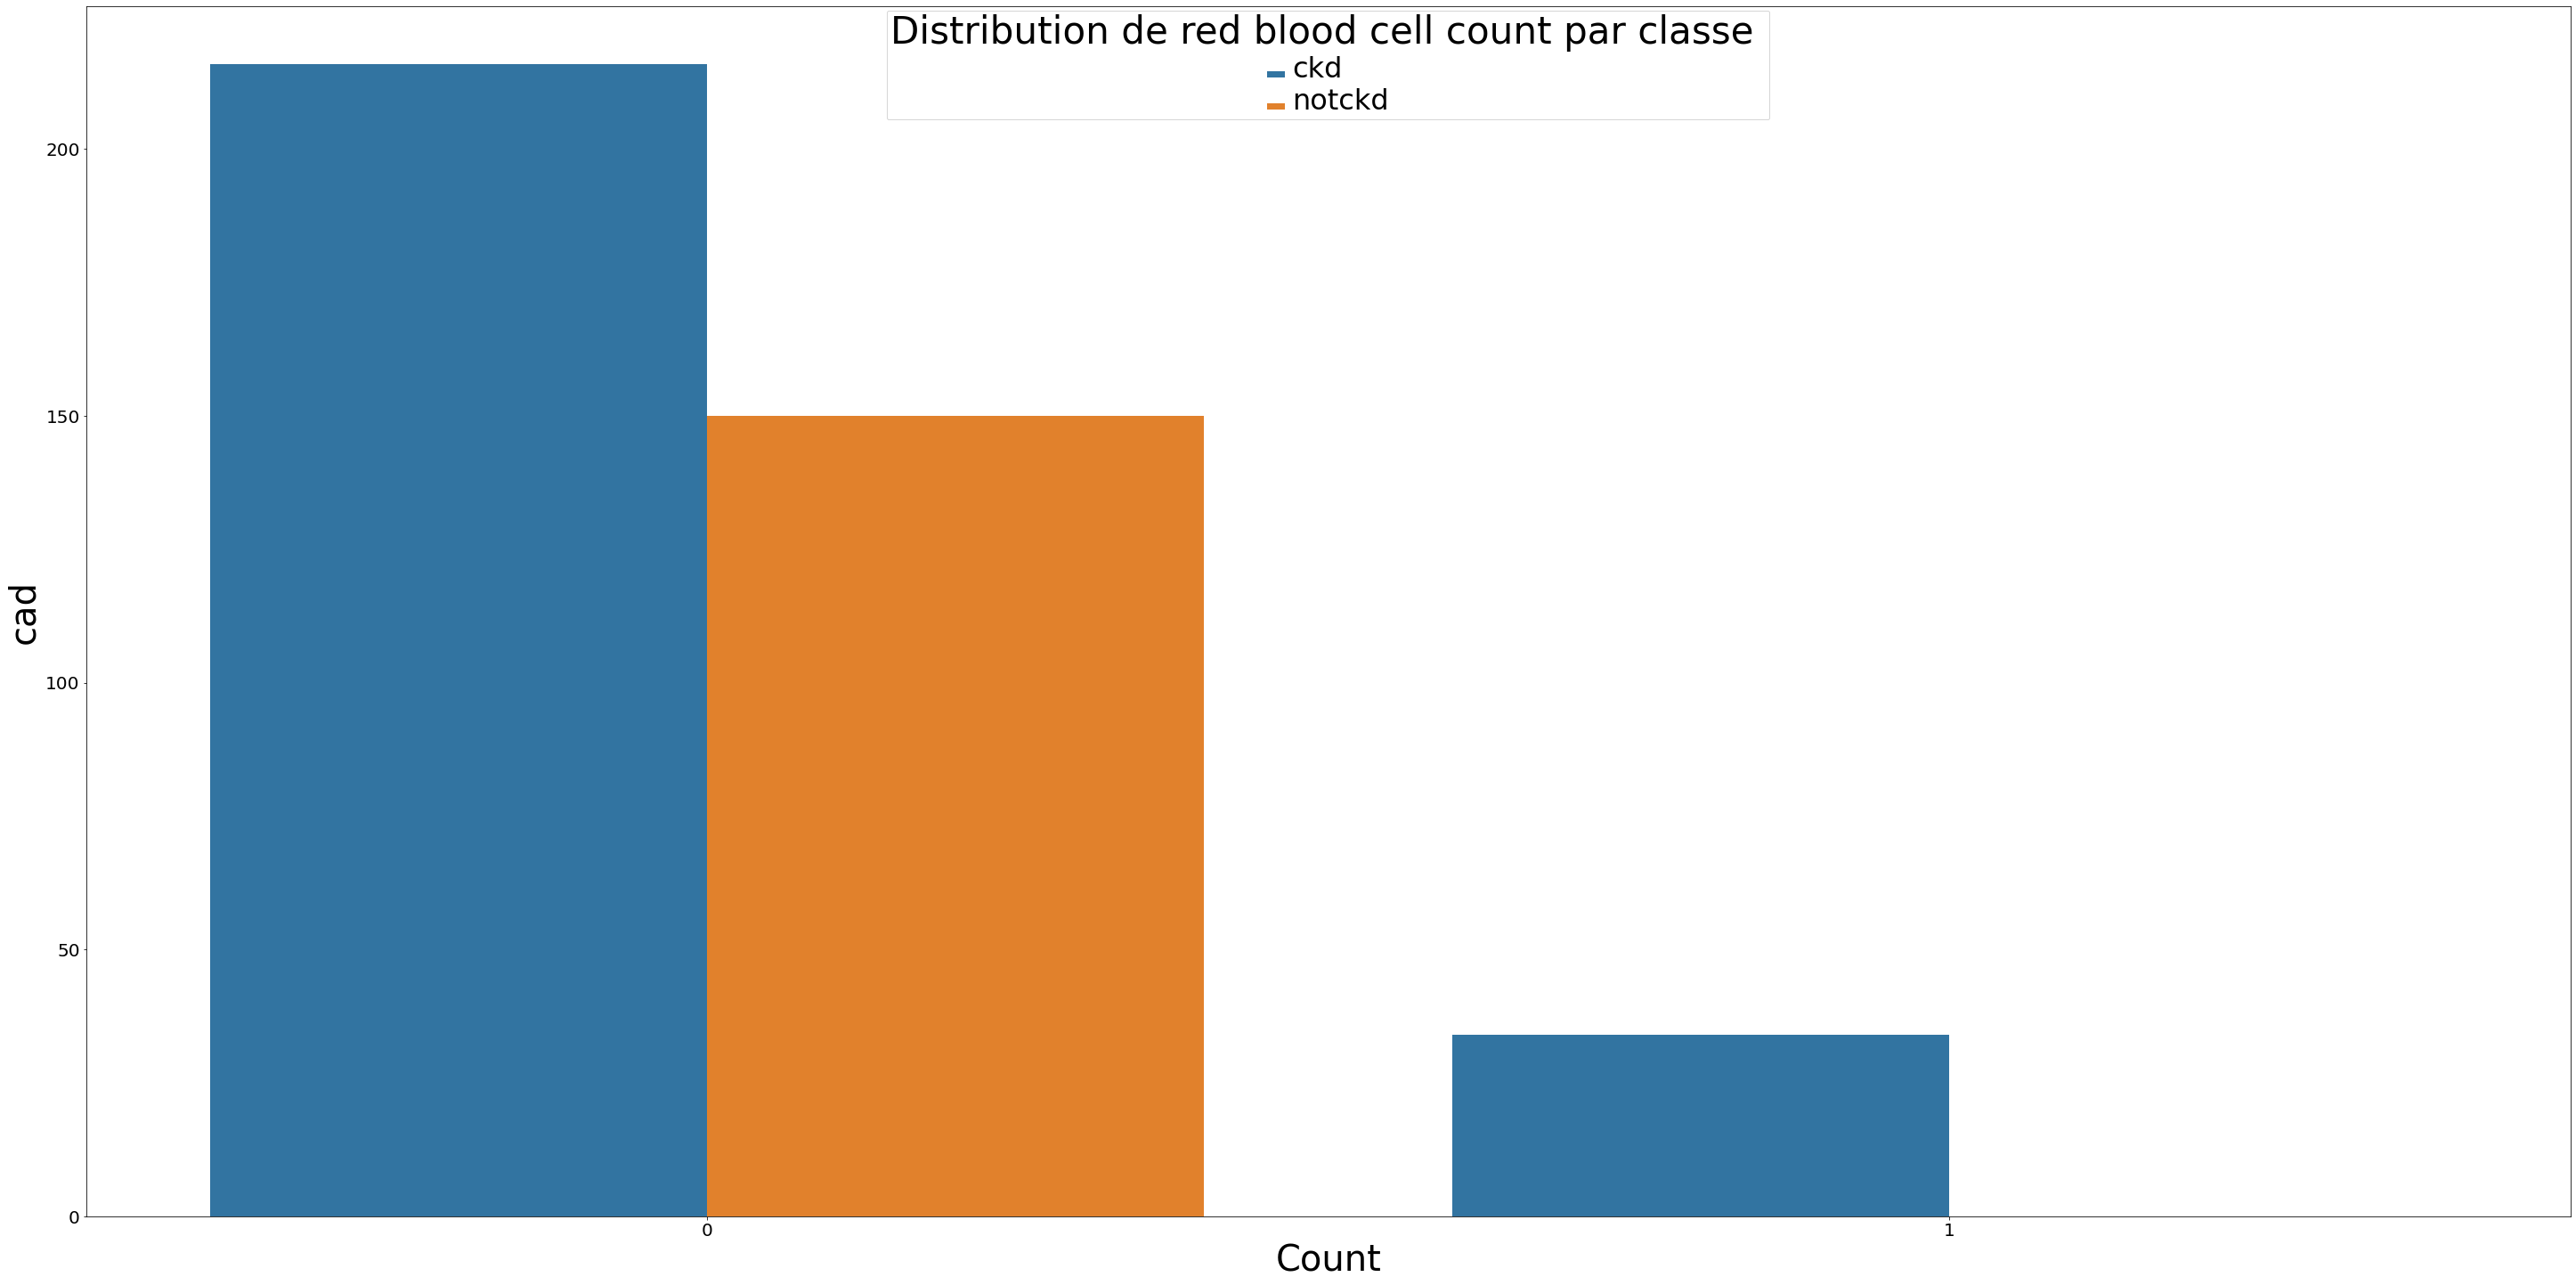

In [207]:
currentVariablecurrentVariable='appet'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de red blood cell count par classe ",currentVariable)

In [208]:
cont = pd.crosstab(CKD_dataframe[currentVariable],CKD_dataframe["class"])
scipy.stats.barnard_exact(cont)

BarnardExactResult(statistic=-4.721766826857625, pvalue=2.2731533942915333e-06)

The p-value est moins que 0.05, de ce fait l'hypothèse qu'il n y a pas de relation entre ces deux variable est réfutée. Nous pouvons avancer dnas un premier temps qu'il existe une relation entre ces deux variables. Toutefois, pour en avoir le coeur net, voyons le graphique en violon. 

In [209]:
PlottingFunctions.violin(CKD_dataframe,'appet')

There are a few CKD patients who report a loss of appetite, however, the majority of them, like non-ckd patients, do not express a loss of appetite.

A weak correlation between these two variables that I prefer not to tell about it.

> Conclusion : No Correlation 🔻

### Correlation between pedal edema  (pe) and CKD patients (-)

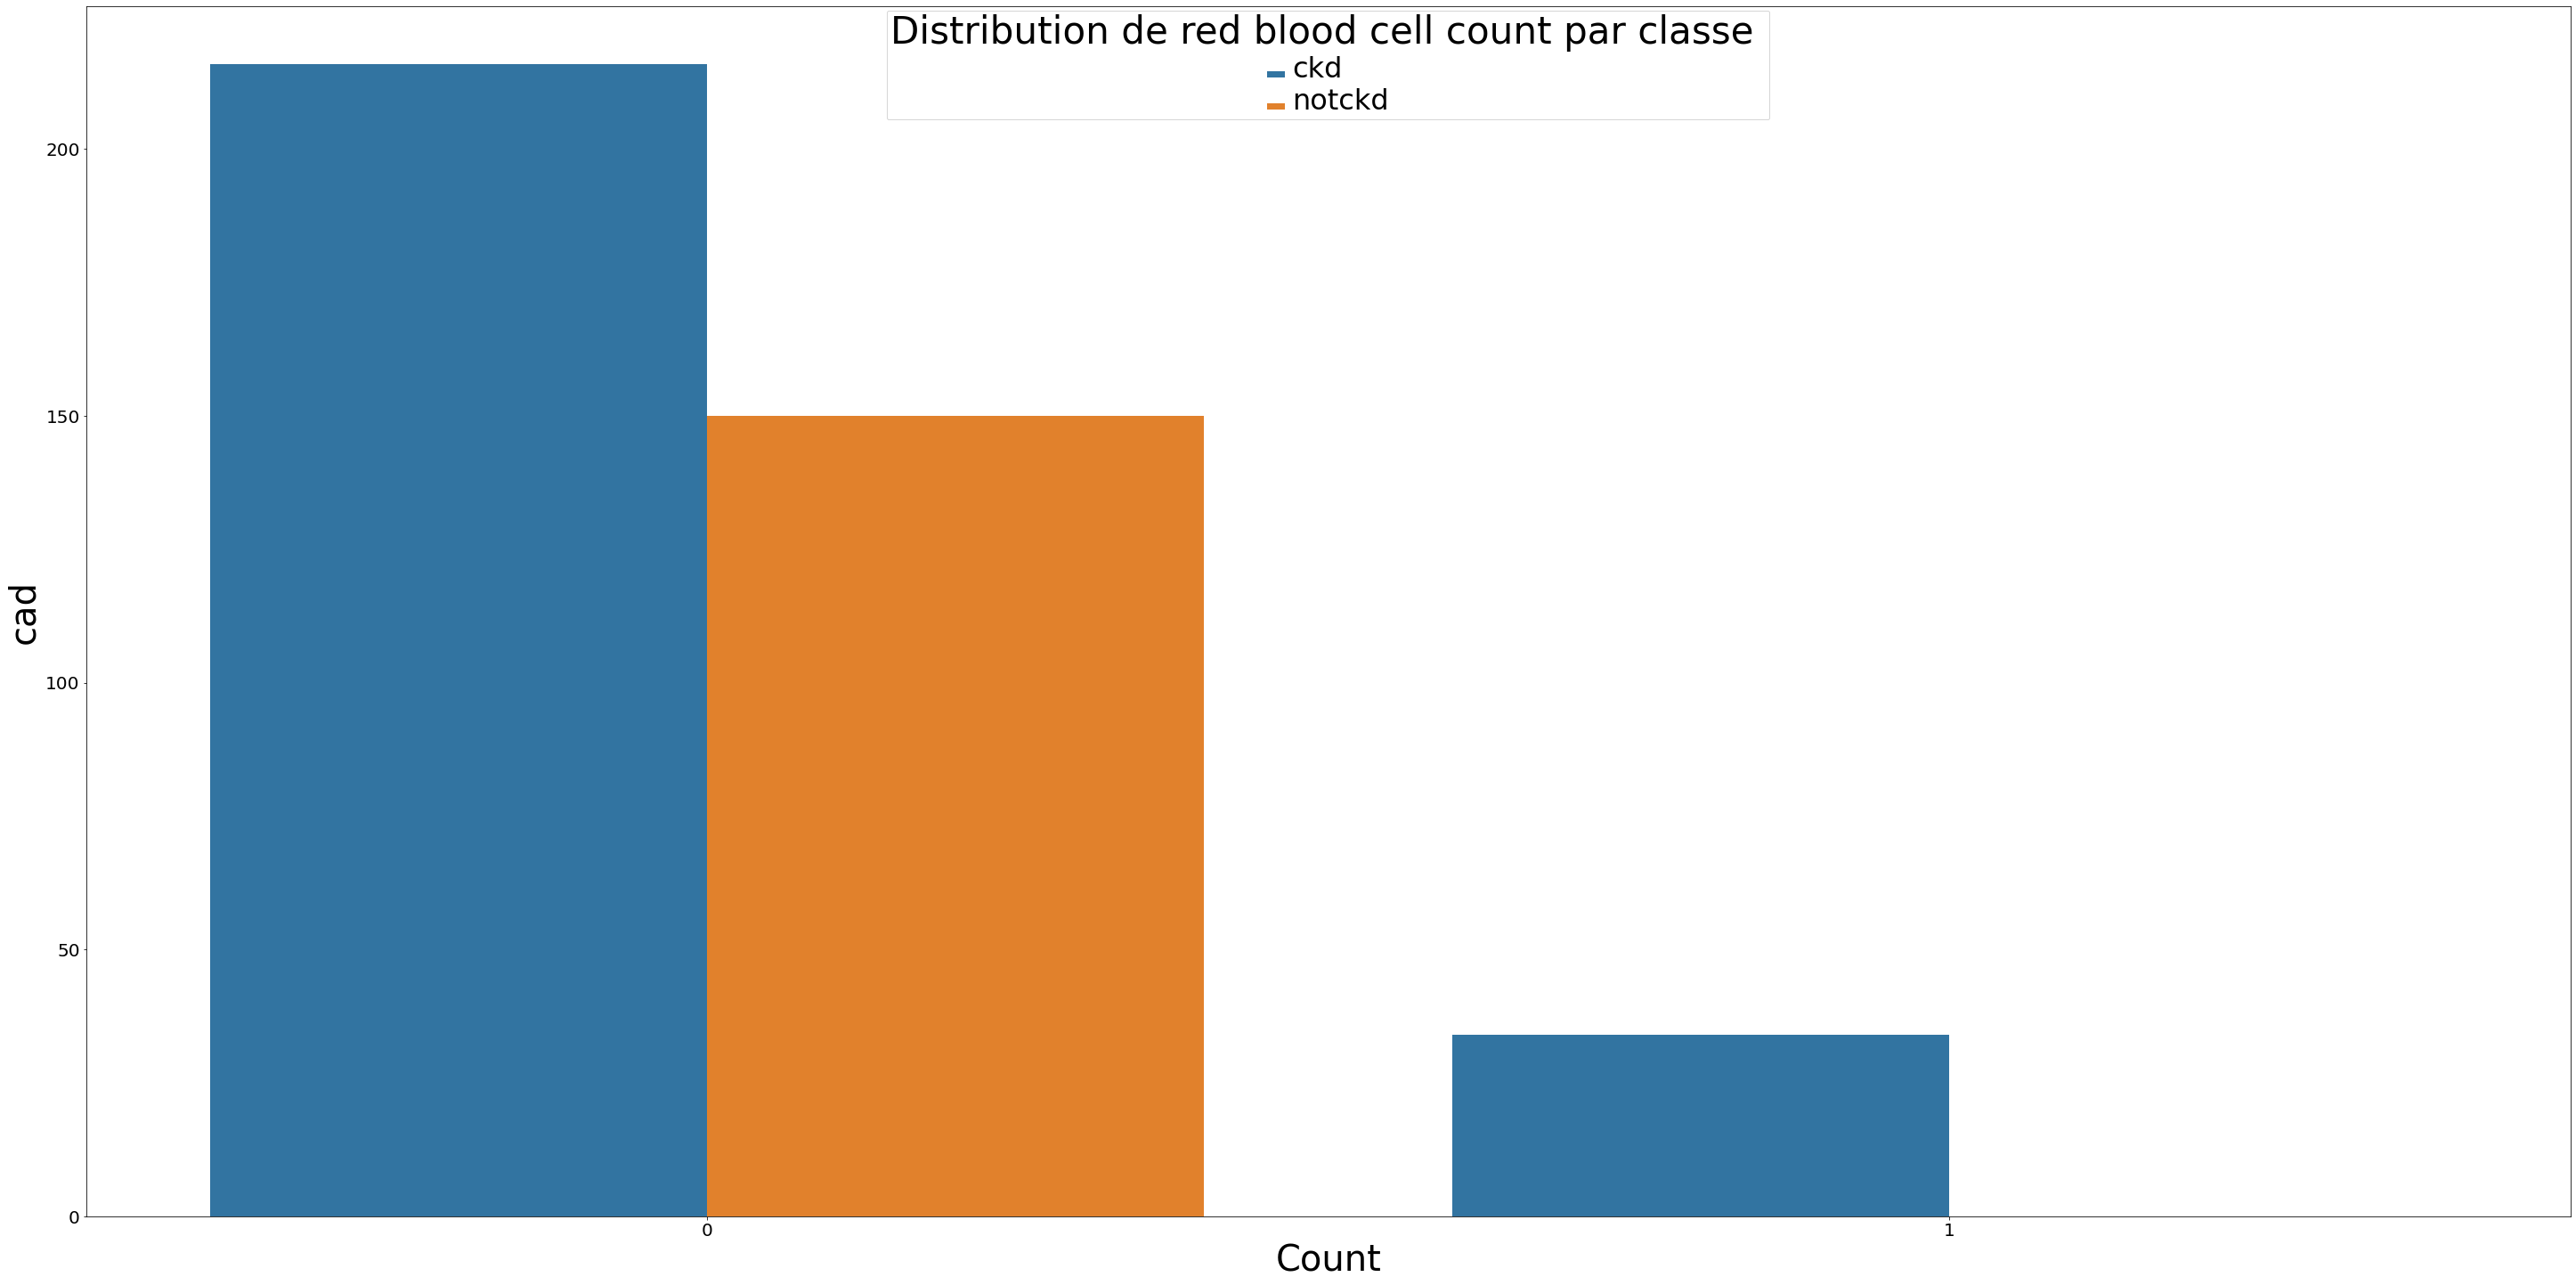

In [210]:
currentVariablecurrentVariable='pe'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Distribution de red blood cell count par classe ",currentVariable)

In [211]:
cont = pd.crosstab(CKD_dataframe[currentVariable],CKD_dataframe["class"])
scipy.stats.barnard_exact(cont)

BarnardExactResult(statistic=-4.721766826857625, pvalue=2.2731533942915333e-06)

The p-value est moins que 0.05, de ce fait l'hypothèse de départ est réfutée. Ce qui montre qu'il existe une corrélation entre les patient atteint de CKD et la variable le pedal edema. Toutefois, comme lors de l'analyse de la variable précédente, nous allons afficher le graphique violon.

In [212]:
PlottingFunctions.violin(CKD_dataframe,'pe')

I recommend a similar analysis as the previous variable, the correlation exists but very weak to count on it.

> Conclusion : No Correlation 🔻

### Correlation between pedal edema (pe) and CKD patients (-)






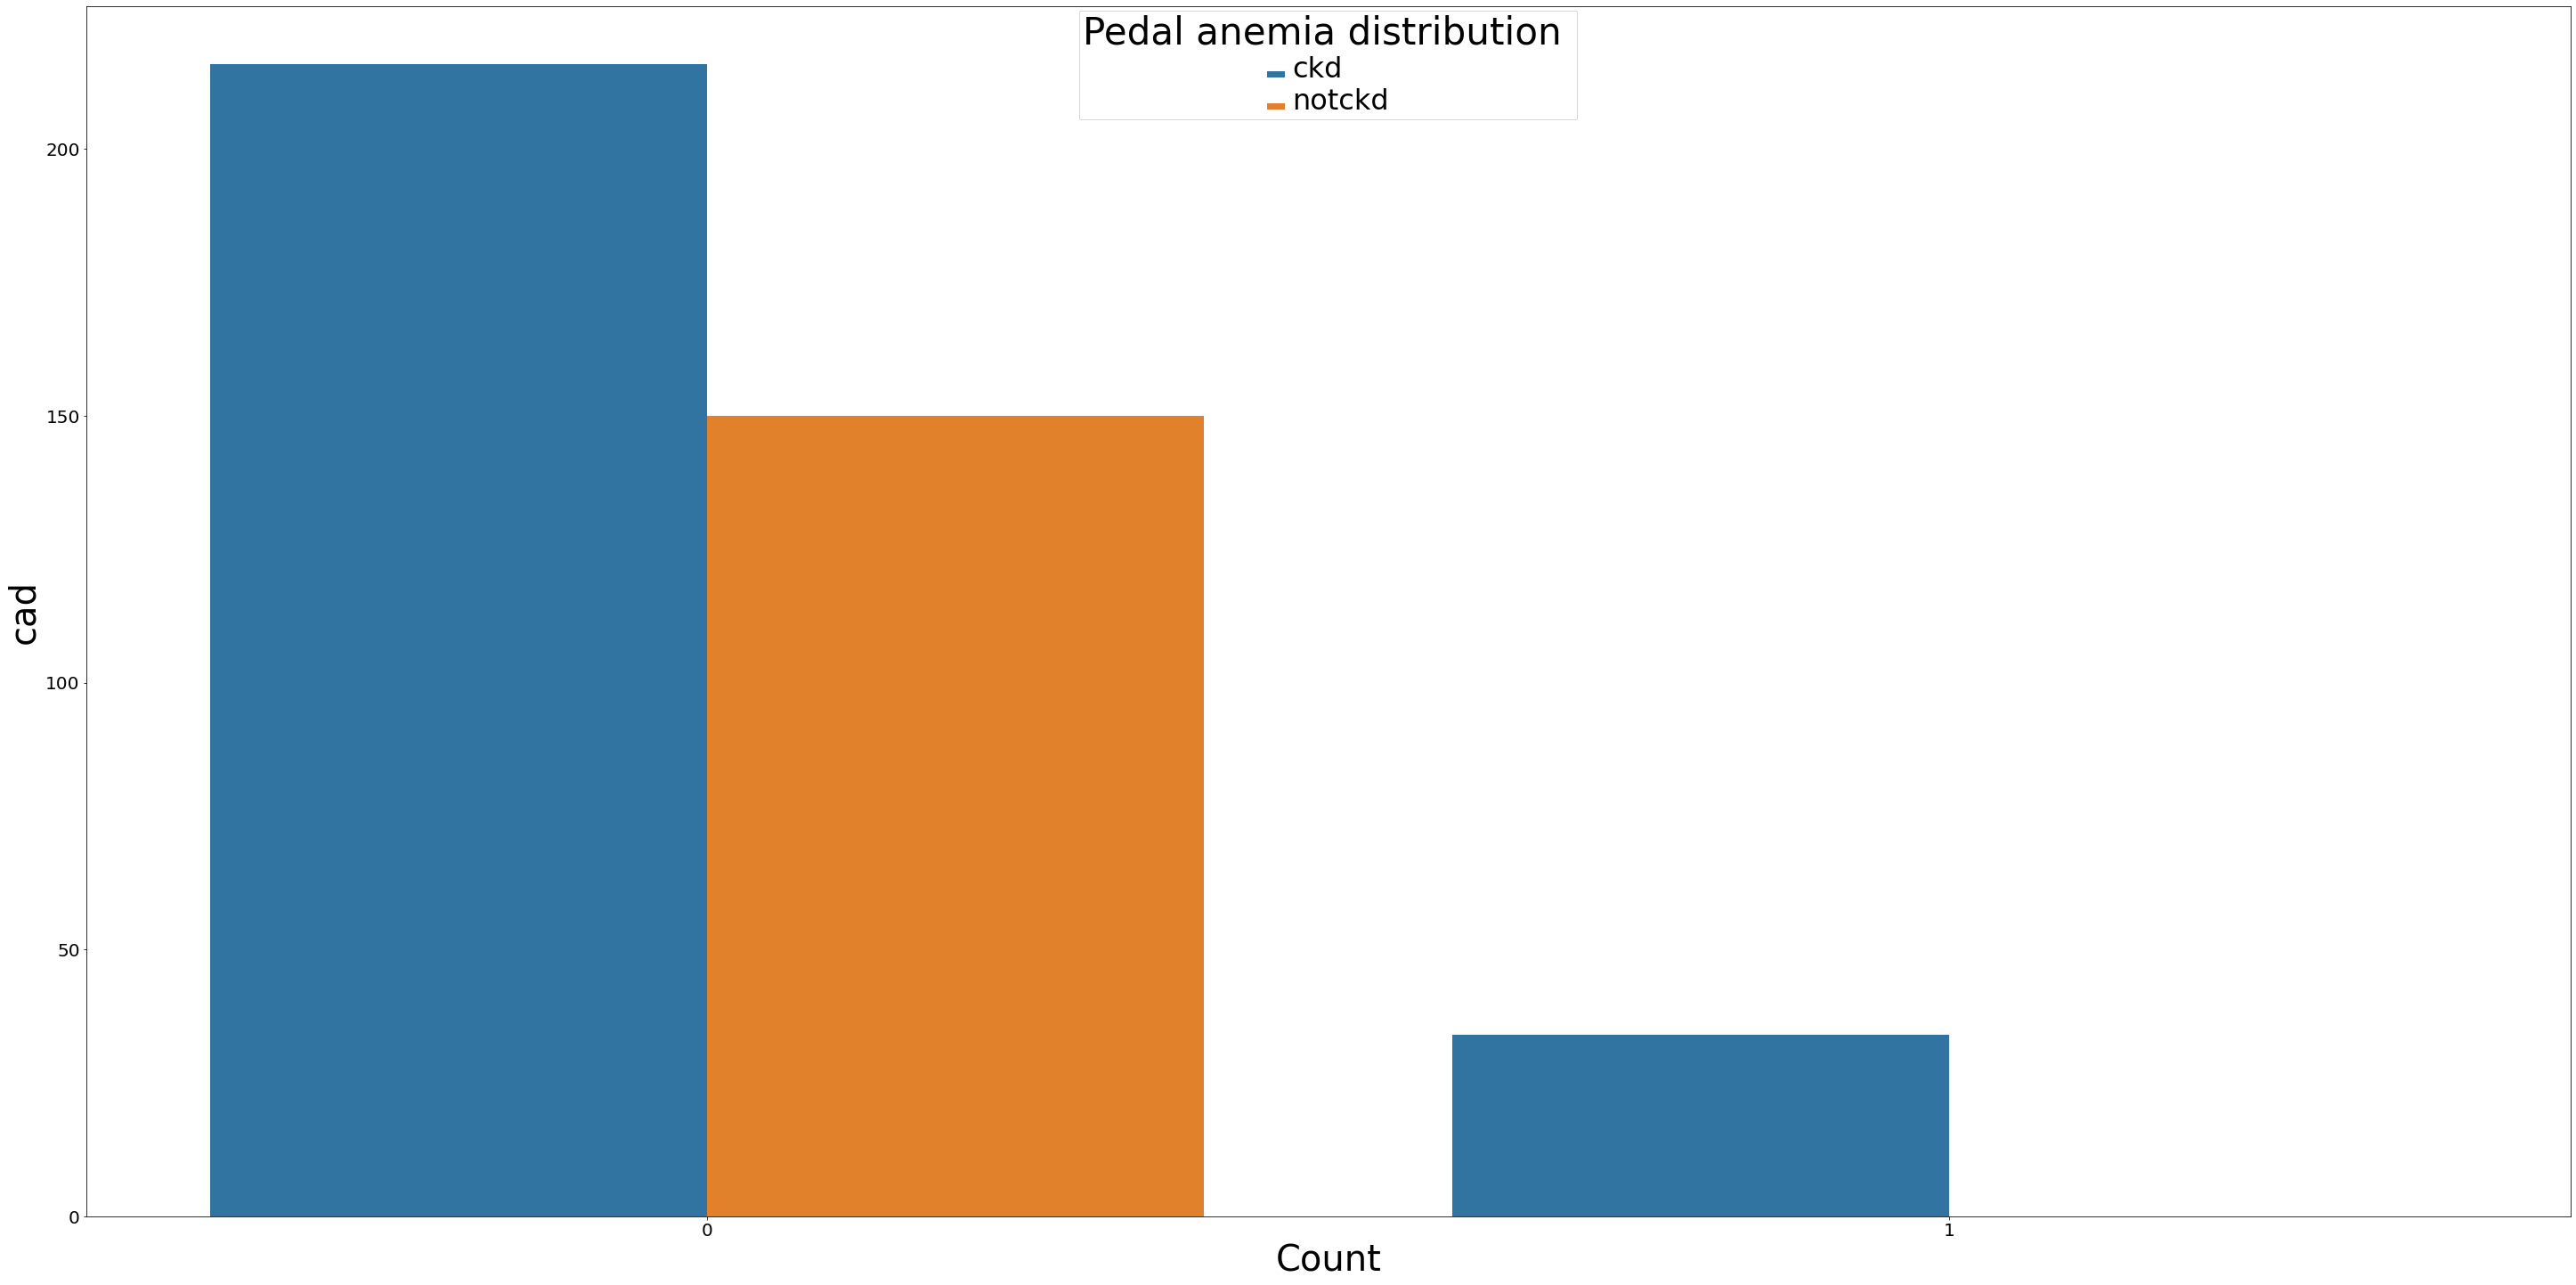

In [214]:
currentVariablecurrentVariable='ane'
PlottingFunctions.PlotDistribution(CKD_dataframe,currentVariable,"Pedal anemia distribution ",currentVariable)

In [215]:
cont = pd.crosstab(CKD_dataframe[currentVariable],CKD_dataframe["class"])
scipy.stats.barnard_exact(cont)

BarnardExactResult(statistic=-4.721766826857625, pvalue=2.2731533942915333e-06)

The p-value is less than 0.05, so the original hypothesis is refuted. This shows that there is a correlation between patients with CKD and the anemia variable. However, too little value for CKD patients who suffer from pedal anemia to draw a reliable conclusion. A more in depth investigation can be shown by the violin graphic

In [216]:
PlottingFunctions.violin(CKD_dataframe,'ane')

There are too few values that have pedal anemia to rely on a correlation between this attribute and the CKD patients.

> Conclusion : No Correlation 🔻

### Conclusion of this analysis

After analysing the correlation between each variable with the CKD patients, we can present the following attributes as correlated CKD.


1. Albumine
2. Sugar
3. red blood cells ( cellules sanguines rouges )
4. pus cells
5. pus cell clumps
6. Hemoglobin
7. Packec cell volume (PCV)
8. hypertension
9. Blood Glucose Random (bgr)
10. Blood Pressure
11. Specific Gravity
12. Diabetes mellitus



# Last analysis logistic regression

I felt like I had to construct a model to address the risk factor extraction problem. I chose a very simple model "Logistic regression". It can defently adress the problem.

Let's first construct the model, split the data and train the model  : 

In [217]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X = CKD_dataframe.iloc[:,:-1]
y = CKD_dataframe['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Verification of the results obtained by the training:

In [218]:
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9233333333333333
0.93


Coefficient extraction :

In [219]:
Coefs=pd.DataFrame(logreg.coef_, columns=X.columns)

Analyze the coefficients:

the coefficients are read as follows:
If the attribute were to increase by 1 unit, the probability of impacting the class would be exponential to the coef (e^coef)

In the case of age for example

In [220]:
Coefs['age']

0    0.030937
Name: age, dtype: float64

In [221]:
math.exp(Coefs['age'])

1.0314202636906942

When the age increases by one value, the probability of impacting the final class is 1%


We will now rank the coefficients

In [222]:
Coefs=Coefs.apply(math.exp)

The top 6 of this last analysis are:

In [223]:
Coefs.transpose().sort_values(0,ascending=False)[0:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of Series.sort_values will be keyword-only



pcv     1.591561
hemo    1.213453
rbcc    1.073909
rbc     1.044298
age     1.031420
pc      1.019843
dtype: float64

Ceci nous retourne le classement des facteurs risque du CKD.

The results may vary, in my previous iteration, the age was not visible in the top 6 values. Could be because of the random way of dealing with missing data.

# Relationships between Risk Factors to extract CKD subtypes

In order to extract relationships between variables, we will first consider variables that have relationship with CKD.
This list will be taken under consideration :
- Albumine
- Sugar
- red blood cells ( cellules sanguines rouges )
- pus cells
- pus cell clumps
- Hemoglobin
- Packec cell volume (PCV)
- hypertension
- Blood Glucose Random (bgr)
- Blood Pressure
- Specific Gravity
- Diabetes mellitus


In order to verify this, let's check the correlation between the variables in the dataframe by generating the correlation matrix.

But first, in order to display all variables (numeric and non numeric) I would need the label encoder and apply it to my dataset as follow :

In [245]:
labelencoder=LabelEncoder()
for column in CKD_dataframe.columns:
    CKD_dataframe[column] = labelencoder.fit_transform(CKD_dataframe[column])

In [247]:
corr = CKD_dataframe[['al','su','rbc','pc','pcc','hemo','pcv','htn','bgr','bp','sg','dm']].corr()
corr.style.background_gradient(cmap='RdBu_r')

After analyzing the matrix of coefficients, and taking into consideration only the variables that are risk factors for CKB. It is clear that the following variables are correlated:


Risk Factor Groupe 1 : 
- Specific gravity
- Hemoglobin 
- Packed Cell Volume 
- Albumin
- Red blood cells

Risk Factor Groupe 2 : 
- Sugar
- Blood Glucose Random 
- Diabetes mellitus

Risk Factor Groupe 3 : 
- red blood cell
- Hemoglobin
- Packec cell volume (PCV)

Risk Factor Group 4 : 
- Pus cell clumps 
- Pus cells
- Albumin


Theses groups of symptoms that are related between them highlight a sub-risk factor group that could enhance a CKD in patients.

We can see that some attributes are present in several Risk Factor Groups, this could be because they impact the CKD too much (ex Albumine).  

# Conclusion

After implementing several approaches to verify the correlation between the different variables that can be considered as risk factor to lead to a patient having chronic renal failure (CKD), we conclude with the following values:

Attributes with most positive correlations on CKD patients are :

- L'hémoglobin
- L'albumine
- Red blood cell 

Attributes with most negative correlations on CKD patients are :
- packed cell volume
- specific gravity


Regarding the relationship between the attributes, we have extracted, when analysing the correlation matrix, the following relationships:

Risk Factor Groupe 1 : 
- Specific gravity
- Hemoglobin 
- Packed Cell Volume 
- Albumin
- Red blood cells

Risk Factor Groupe 2 : 
- Sugar
- Blood Glucose Random 
- Diabetes mellitus

Risk Factor Groupe 3 : 
- red blood cell
- Hemoglobin
- Packec cell volume (PCV)

Risk Factor Group 4 : 
- Pus cell clumps 
- Pus cells
- Albumin


This concludes the analysis.
Thank You 😀